In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px
from IPython.core.display import display, HTML
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")
from sklearn import preprocessing
from scipy.stats import chi2_contingency
# Tablas
# ==============================================================================
from itables import init_notebook_mode,show
init_notebook_mode(all_interactive=True)
import ipywidgets as widgets
from IPython.display import display
from matplotlib import rcParams
#Imputación
#================================================================================
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import CategoricalNB

#Preprocesamiento
#================================================================================
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler

#Modelado
#================================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
#==================
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import learning_curve
#=================================================================================
from catboost import CatBoostClassifier, Pool
import catboost


No Warning Shown


<IPython.core.display.Javascript object>

<h2>Índice</font></h2>
<a id="indice"></a>

* [1. Entrenamiento Modelo](#section1)


* [2. Prediccion sobre base de vigentes actual](#section2)


* [3.Descriptivo Renovacion en Base de Entrenamiento vs Primer Resultado](#section3)


* [4. Ajuste Base Entrenamiento](#section4)


* [5. Reentrenamiento](#section5)


* [6. Prediccion sobre base de vigentes actual](#section6)


* [7.Elección de variables para herramienta](#section7)


* [8.Descriptivo Resultados Finales](#section8)





<a id="section1"></a>
## <font color="#004D7F"><h3>**1. Entrenamiento Modelo**</font></h3>
***

In [7]:
X=pd.read_excel("X.xlsx")
y=pd.read_excel("y.xlsx")

In [8]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 123
                                    )

In [9]:
# Lista de características categóricas
cat_features = ['NOMBRE_PRODUCTO', 'COMISION', 'DESCRIPCION_FORMA_PAGO', 'MARCA_SINIESTROS',
                'GENERO FINAL', 'DEDUCIBLE FINAL', 'BONUS MALUS FINAL', 'TIPO_SUCURSAL',
                'MARCA_FINAL', 'DEPARTAMENTO_FINAL']

# Crear un objeto Pool para los datos de entrenamiento y prueba
train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_data = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [5]:
# Lista de combinaciones de hiperparámetros
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'loss_function': ['Logloss', 'CrossEntropy'],
}

best_score = 0
best_params = {}

# Realizar la búsqueda de hiperparámetros
for iterations in param_grid['iterations']:
    for learning_rate in param_grid['learning_rate']:
        for depth in param_grid['depth']:
            for loss_function in param_grid['loss_function']:
                params = {
                    'iterations': iterations,
                    'learning_rate': learning_rate,
                    'depth': depth,
                    'loss_function': loss_function,
                }

                model = CatBoostClassifier(**params, cat_features=cat_features)
                model.fit(X_train, y_train)
                score = model.score(X_test, y_test)

                if score > best_score:
                    best_score = score
                    best_params = params

print("Mejores hiperparámetros encontrados:", best_params)

0:	learn: 0.6744684	total: 191ms	remaining: 18.9s
1:	learn: 0.6584463	total: 209ms	remaining: 10.3s
2:	learn: 0.6418695	total: 227ms	remaining: 7.32s
3:	learn: 0.6275652	total: 244ms	remaining: 5.85s
4:	learn: 0.6160393	total: 260ms	remaining: 4.95s
5:	learn: 0.6017653	total: 278ms	remaining: 4.36s
6:	learn: 0.5901733	total: 295ms	remaining: 3.92s
7:	learn: 0.5800783	total: 313ms	remaining: 3.6s
8:	learn: 0.5706239	total: 331ms	remaining: 3.35s
9:	learn: 0.5632077	total: 348ms	remaining: 3.13s
10:	learn: 0.5562458	total: 381ms	remaining: 3.08s
11:	learn: 0.5507263	total: 401ms	remaining: 2.94s
12:	learn: 0.5456481	total: 420ms	remaining: 2.81s
13:	learn: 0.5339518	total: 440ms	remaining: 2.7s
14:	learn: 0.5242423	total: 458ms	remaining: 2.6s
15:	learn: 0.5166669	total: 475ms	remaining: 2.5s
16:	learn: 0.5115921	total: 492ms	remaining: 2.4s
17:	learn: 0.5065828	total: 509ms	remaining: 2.32s
18:	learn: 0.5022460	total: 528ms	remaining: 2.25s
19:	learn: 0.4993620	total: 545ms	remaining: 2

66:	learn: 0.3759545	total: 1.75s	remaining: 860ms
67:	learn: 0.3746824	total: 1.78s	remaining: 837ms
68:	learn: 0.3730640	total: 1.8s	remaining: 811ms
69:	learn: 0.3713606	total: 1.83s	remaining: 785ms
70:	learn: 0.3696184	total: 1.86s	remaining: 759ms
71:	learn: 0.3676125	total: 1.89s	remaining: 734ms
72:	learn: 0.3657538	total: 1.91s	remaining: 708ms
73:	learn: 0.3651416	total: 1.94s	remaining: 683ms
74:	learn: 0.3641293	total: 1.97s	remaining: 657ms
75:	learn: 0.3610869	total: 2s	remaining: 631ms
76:	learn: 0.3596917	total: 2.03s	remaining: 606ms
77:	learn: 0.3566722	total: 2.06s	remaining: 580ms
78:	learn: 0.3554757	total: 2.08s	remaining: 554ms
79:	learn: 0.3544142	total: 2.12s	remaining: 529ms
80:	learn: 0.3532834	total: 2.15s	remaining: 503ms
81:	learn: 0.3512699	total: 2.17s	remaining: 478ms
82:	learn: 0.3478190	total: 2.21s	remaining: 452ms
83:	learn: 0.3457257	total: 2.24s	remaining: 426ms
84:	learn: 0.3447441	total: 2.27s	remaining: 401ms
85:	learn: 0.3438097	total: 2.31s	r

KeyboardInterrupt: 

In [10]:
# Definir los parámetros del modelo
params = {
    'iterations': 300,
    'learning_rate': 0.1,
    'depth': 8,
    'loss_function': 'Logloss'
}

# Inicializar el modelo CatBoost
model_CatBoost = CatBoostClassifier(**params)

# Listas para almacenar métricas de entrenamiento y validación
train_metrics = []
val_metrics = []
# Entrena el modelo
model_CatBoost.fit(train_data, eval_set=test_data)

0:	learn: 0.6275735	test: 0.6278858	best: 0.6278858 (0)	total: 98.1ms	remaining: 29.3s
1:	learn: 0.5912725	test: 0.5919330	best: 0.5919330 (1)	total: 171ms	remaining: 25.5s
2:	learn: 0.5545596	test: 0.5546944	best: 0.5546944 (2)	total: 249ms	remaining: 24.6s
3:	learn: 0.5302777	test: 0.5304769	best: 0.5304769 (3)	total: 323ms	remaining: 23.9s
4:	learn: 0.5039583	test: 0.5041550	best: 0.5041550 (4)	total: 399ms	remaining: 23.5s
5:	learn: 0.4825804	test: 0.4815703	best: 0.4815703 (5)	total: 477ms	remaining: 23.4s
6:	learn: 0.4657266	test: 0.4642803	best: 0.4642803 (6)	total: 558ms	remaining: 23.4s
7:	learn: 0.4409494	test: 0.4388715	best: 0.4388715 (7)	total: 641ms	remaining: 23.4s
8:	learn: 0.4250409	test: 0.4233456	best: 0.4233456 (8)	total: 719ms	remaining: 23.2s
9:	learn: 0.4129353	test: 0.4109739	best: 0.4109739 (9)	total: 793ms	remaining: 23s
10:	learn: 0.3898375	test: 0.3882919	best: 0.3882919 (10)	total: 876ms	remaining: 23s
11:	learn: 0.3792481	test: 0.3786014	best: 0.3786014 (1

95:	learn: 0.1510098	test: 0.1531473	best: 0.1531473 (95)	total: 11.6s	remaining: 24.6s
96:	learn: 0.1500878	test: 0.1520949	best: 0.1520949 (96)	total: 11.7s	remaining: 24.5s
97:	learn: 0.1492935	test: 0.1513315	best: 0.1513315 (97)	total: 11.9s	remaining: 24.5s
98:	learn: 0.1487562	test: 0.1509849	best: 0.1509849 (98)	total: 12s	remaining: 24.4s
99:	learn: 0.1468696	test: 0.1490415	best: 0.1490415 (99)	total: 12.2s	remaining: 24.4s
100:	learn: 0.1465044	test: 0.1486937	best: 0.1486937 (100)	total: 12.3s	remaining: 24.3s
101:	learn: 0.1453065	test: 0.1474214	best: 0.1474214 (101)	total: 12.4s	remaining: 24.2s
102:	learn: 0.1450846	test: 0.1472714	best: 0.1472714 (102)	total: 12.6s	remaining: 24.1s
103:	learn: 0.1428902	test: 0.1449223	best: 0.1449223 (103)	total: 12.7s	remaining: 24s
104:	learn: 0.1419656	test: 0.1438471	best: 0.1438471 (104)	total: 12.8s	remaining: 23.8s
105:	learn: 0.1417774	test: 0.1438042	best: 0.1438042 (105)	total: 13s	remaining: 23.8s
106:	learn: 0.1397662	test

187:	learn: 0.1044972	test: 0.1125050	best: 0.1125050 (187)	total: 24.4s	remaining: 14.5s
188:	learn: 0.1044333	test: 0.1125153	best: 0.1125050 (187)	total: 24.5s	remaining: 14.4s
189:	learn: 0.1040539	test: 0.1121958	best: 0.1121958 (189)	total: 24.6s	remaining: 14.3s
190:	learn: 0.1036716	test: 0.1119491	best: 0.1119491 (190)	total: 24.8s	remaining: 14.1s
191:	learn: 0.1036665	test: 0.1119532	best: 0.1119491 (190)	total: 24.9s	remaining: 14s
192:	learn: 0.1033737	test: 0.1119634	best: 0.1119491 (190)	total: 25s	remaining: 13.9s
193:	learn: 0.1028486	test: 0.1114694	best: 0.1114694 (193)	total: 25.1s	remaining: 13.7s
194:	learn: 0.1026146	test: 0.1113298	best: 0.1113298 (194)	total: 25.2s	remaining: 13.6s
195:	learn: 0.1018276	test: 0.1105453	best: 0.1105453 (195)	total: 25.3s	remaining: 13.4s
196:	learn: 0.1016651	test: 0.1105052	best: 0.1105052 (196)	total: 25.4s	remaining: 13.3s
197:	learn: 0.1015405	test: 0.1104886	best: 0.1104886 (197)	total: 25.6s	remaining: 13.2s
198:	learn: 0.

279:	learn: 0.0863410	test: 0.1005565	best: 0.1005542 (278)	total: 37.2s	remaining: 2.65s
280:	learn: 0.0863314	test: 0.1005510	best: 0.1005510 (280)	total: 37.3s	remaining: 2.52s
281:	learn: 0.0863217	test: 0.1005554	best: 0.1005510 (280)	total: 37.5s	remaining: 2.4s
282:	learn: 0.0862549	test: 0.1005099	best: 0.1005099 (282)	total: 37.7s	remaining: 2.26s
283:	learn: 0.0857240	test: 0.1000043	best: 0.1000043 (283)	total: 37.8s	remaining: 2.13s
284:	learn: 0.0854664	test: 0.0997851	best: 0.0997851 (284)	total: 38s	remaining: 2s
285:	learn: 0.0851668	test: 0.0994899	best: 0.0994899 (285)	total: 38.2s	remaining: 1.87s
286:	learn: 0.0847689	test: 0.0990607	best: 0.0990607 (286)	total: 38.4s	remaining: 1.74s
287:	learn: 0.0846157	test: 0.0989867	best: 0.0989867 (287)	total: 38.6s	remaining: 1.61s
288:	learn: 0.0844515	test: 0.0989280	best: 0.0989280 (288)	total: 38.8s	remaining: 1.48s
289:	learn: 0.0844319	test: 0.0989226	best: 0.0989226 (289)	total: 39s	remaining: 1.34s
290:	learn: 0.0842

In [18]:
# Obtener las métricas en cada iteración
for i in range(1, params['iterations'] + 1):
    y_train_pred = model_CatBoost.predict(train_data, ntree_end=i, thread_count=-1)
    y_val_pred = model_CatBoost.predict(test_data, ntree_end=i, thread_count=-1)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_val_pred)
    train_metrics.append(train_accuracy)
    val_metrics.append(val_accuracy)

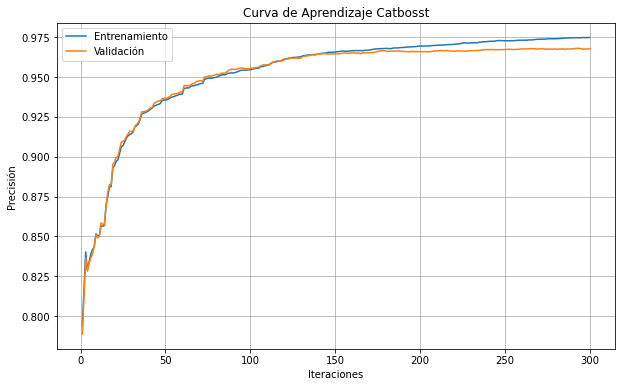

In [19]:
# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(range(1, params['iterations'] + 1), train_metrics, label='Entrenamiento')
plt.plot(range(1, params['iterations'] + 1), val_metrics, label='Validación')
plt.xlabel('Iteraciones')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje Catbosst')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Realizar predicciones y evaluar el modelo
y_pred = model_CatBoost.predict(test_data)

In [12]:
model_CatBoost

In [13]:
import pickle

# Guardar el modelo en un archivo .pickle
with open('modelo_catboost.pickle', 'wb') as file:
    pickle.dump(model_CatBoost, file)

In [21]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4291
           1       0.97      0.98      0.97      6340

    accuracy                           0.97     10631
   macro avg       0.97      0.97      0.97     10631
weighted avg       0.97      0.97      0.97     10631

[[4102  189]
 [ 154 6186]]


In [22]:
a_CatBoost = accuracy_score(y_test, y_pred)
print('Accuracy del modelo:')
print(a_CatBoost)

Accuracy del modelo:
0.967735866804628


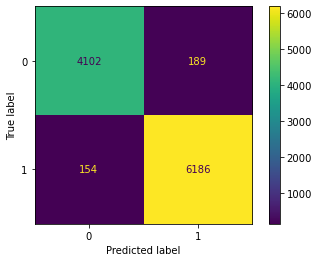

In [23]:
predictions_CatBoost = model_CatBoost.predict(X_test)
cm_CatBoost = confusion_matrix(y_test, predictions_CatBoost, labels=model_CatBoost.classes_)
disp_CatBoost = ConfusionMatrixDisplay(confusion_matrix=cm_CatBoost,display_labels=model_CatBoost.classes_)
disp_CatBoost.plot()

plt.show()

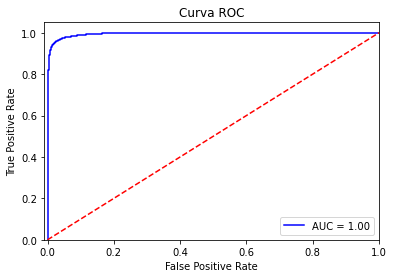

In [24]:
Y_predic_prob=model_CatBoost.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = roc_curve(y_test, Y_predic_prob, pos_label=0)
AUC_CatBoost=auc(fpr, tpr)
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_CatBoost)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
from sklearn.metrics import f1_score

# Calcula el F1 score
f1_CatBoost = f1_score(y_test, y_pred)

# Imprime el F1 score
print('F1 Score del modelo:')
print(f1_CatBoost)

F1 Score del modelo:
0.9730239874164374


<a id="section2"></a>
## <font color="#004D7F"><h3>**2. Prediccion sobre base de vigentes actual**</font></h3>
***


## Base prueba

In [51]:
X_prueba=pd.read_excel("X_prueba.xlsx")
rentabilidad=pd.read_excel("rentabilidad_pru.xlsx")

In [44]:
pool_prueba = catboost.Pool(data=X_prueba, cat_features=cat_features)

In [134]:
# Realizar predicciones
predicciones = model_CatBoost.predict(pool_prueba)

In [135]:
predicciones_df=pd.DataFrame(predicciones)

In [136]:
# Tomar la columna '1' de predicciones
columna_prediccion = predicciones_df  # Ajusta el nombre de la columna si es diferente
# Concatenar con el DataFrame X_prueba
resultado_final = pd.concat([X_prueba, columna_prediccion], axis=1)

# Renombrar la columna '1' a 'Probabilidad Renovacion'
resultado_final = resultado_final.rename(columns={0: 'Estado_Renovacion'})
resultado_final

<a id="section3"></a>
## <font color="#004D7F"><h3>**3. Descriptivo Renovacion en Base de Entrenamiento vs Primer Resultado**</font></h3>
***

Primero cargaremos la base de entrenamiento total para comparar la proporción de renovados en la base de entrenamiento sobre la base de vigentes.

In [324]:
base_entrenamiento=pd.concat([X, y], axis=1)
base_entrenamiento.columns

Index(['NOMBRE_PRODUCTO', 'COMISION', 'DESCRIPCION_FORMA_PAGO',
       'VALOR_ASEGURADO', 'MODELO', 'CANTIDAD_RENOVACION', 'MARCA_SINIESTROS',
       'GENERO FINAL', 'EDAD FINAL', 'DEDUCIBLE FINAL', 'BONUS MALUS FINAL',
       'SCORE', 'Prima', 'Incremento', 'TIPO_SUCURSAL', 'MARCA_FINAL',
       'DEPARTAMENTO_FINAL', 'Estado_Renovacion'],
      dtype='object')

In [146]:
print('El porcentaje de renovación de la base de entrenamiento es',base_entrenamiento['Estado_Renovacion'].mean())
print('El porcentaje de renovación de la base de vigentes es',resultado_final['Estado_Renovacion'].mean())

El porcentaje de renovación de la base de entrenamiento es 0.592987159587978
El porcentaje de renovación de la base de vigentes es 0.8519076139108567


#### NOMBRE_PRODUCTO

In [141]:
# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('NOMBRE_PRODUCTO')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('NOMBRE_PRODUCTO')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['NOMBRE_PRODUCTO'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['NOMBRE_PRODUCTO'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]

col_0            Porcentaje_Base  Proporcion_Renovacion_Base  \
NOMBRE_PRODUCTO                                                
F1                     41.338601                    0.659631   
I1                     46.023235                    0.535565   
I2                      5.815813                    0.511120   
I3                      1.601524                    0.513950   
I4                      0.867786                    0.463415   
NF1                     0.256338                    1.000000   
NI1                     3.546400                    0.825597   
NI2                     0.550303                    0.000000   

col_0            Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
NOMBRE_PRODUCTO                                                         
F1                          25.275471                         0.492701  
I1                          26.433606                         0.987482  
I2                           2.671983                         0.985139  
I3                           0.903345                         0.996337  
I4                           0.370603                         1.000000  
NF1                         14.355911                         0.979947  
NI1                         29.989080                         0.955809  
NI2                               NaN                              NaN

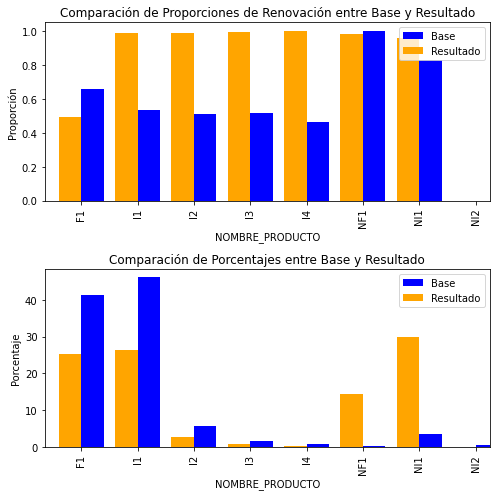

In [147]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('NOMBRE_PRODUCTO')
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('NOMBRE_PRODUCTO')
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()

#### COMISION

In [148]:
# Calcular la proporción de '1' por cada categoría de 'COMISION' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('COMISION')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'COMISION' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('COMISION')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['COMISION'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['COMISION'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0     Porcentaje_Base  Proporcion_Renovacion_Base  Porcentaje_Resultado  \
COMISION                                                                      
0                3.845068                    0.587768              3.151782   
10               0.423310                    0.750000              0.311042   
13               0.002352                    0.000000                   NaN   
14               4.517661                    0.527850              2.443665   
15              37.533512                    0.533333             32.525396   
16               0.244579                    0.375000              0.167102   
17               5.202013                    0.521700              3.704378   
18               9.505668                    0.693716             15.982264   
19               0.068200                    0.000000                   NaN   
20               5.364282                    0.539676              7.173820   
22              33.293354                    0.661510             34.540551   

col_0     Proporcion_Renovacion_Resultado  
COMISION                                   
0                                0.961155  
10                               0.994681  
13                                    NaN  
14                               0.987813  
15                               0.912661  
16                               0.930693  
17                               0.872264  
18                               0.989855  
19                                    NaN  
20                               0.985932  
22                               0.679600

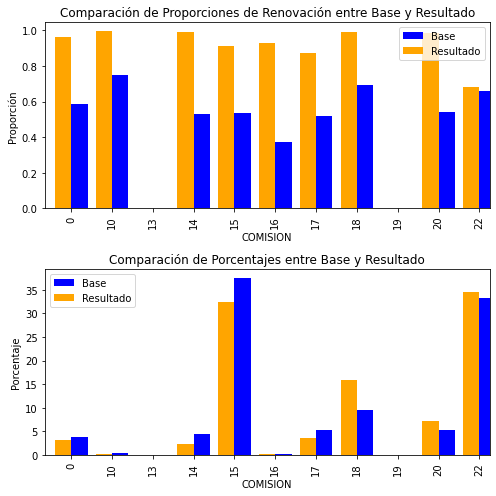

In [149]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('COMISION')  # Cambiado de 'NOMBRE_PRODUCTO' a 'COMISION'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('COMISION')  # Cambiado de 'NOMBRE_PRODUCTO' a 'COMISION'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()


#### DESCRIPCION_FORMA_PAGO

In [150]:
# Calcular la proporción de '1' por cada categoría de 'DESCRIPCION_FORMA_PAGO' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('DESCRIPCION_FORMA_PAGO')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'DESCRIPCION_FORMA_PAGO' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('DESCRIPCION_FORMA_PAGO')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['DESCRIPCION_FORMA_PAGO'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['DESCRIPCION_FORMA_PAGO'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0                   Porcentaje_Base  Proporcion_Renovacion_Base  \
DESCRIPCION_FORMA_PAGO                                                
Contado                       45.084897                    0.482187   
Financiación                  14.312591                    0.701117   
Mensual Anticipado            40.602512                    0.677903   

col_0                   Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
DESCRIPCION_FORMA_PAGO                                                         
Contado                            41.757387                         0.975554  
Financiación                       18.611231                         0.963552  
Mensual Anticipado                 39.631382                         0.669199

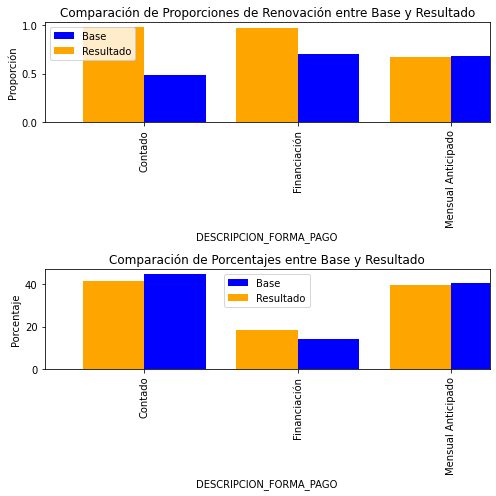

In [153]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('DESCRIPCION_FORMA_PAGO')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('DESCRIPCION_FORMA_PAGO')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()


#### MARCA_SINIESTROS

In [154]:
# Calcular la proporción de '1' por cada categoría de 'MARCA_SINIESTROS' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('MARCA_SINIESTROS')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'MARCA_SINIESTROS' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('MARCA_SINIESTROS')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['MARCA_SINIESTROS'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['MARCA_SINIESTROS'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0             Porcentaje_Base  Proporcion_Renovacion_Base  \
MARCA_SINIESTROS                                                
0                       83.537933                    0.597123   
1                       16.462067                    0.572000   

col_0             Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
MARCA_SINIESTROS                                                         
0                            89.212799                         0.862060  
1                            10.787201                         0.767945

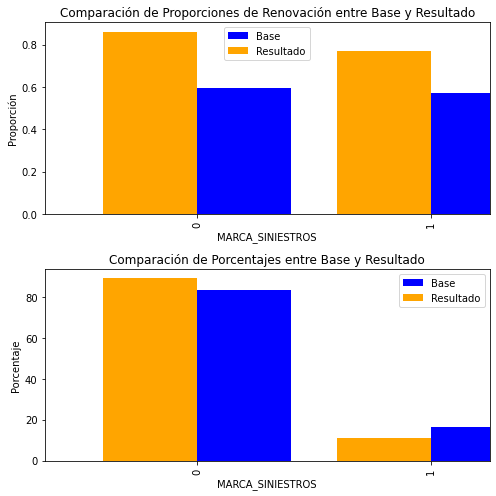

In [155]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('MARCA_SINIESTROS')  # Cambiado de 'DESCRIPCION_FORMA_PAGO' a 'MARCA_SINIESTROS'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('MARCA_SINIESTROS')  # Cambiado de 'DESCRIPCION_FORMA_PAGO' a 'MARCA_SINIESTROS'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()


#### GENERO FINAL

In [163]:
# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('GENERO FINAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('GENERO FINAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['GENERO FINAL'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['GENERO FINAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0         Porcentaje_Base  Proporcion_Renovacion_Base  \
GENERO FINAL                                                
Femenino            51.460420                    0.619459   
Masculino           46.510042                    0.589574   
SIN GENERO           2.029538                    0.000000   

col_0         Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
GENERO FINAL                                                         
Femenino                 49.612852                         0.842065  
Masculino                50.387148                         0.861599  
SIN GENERO                     NaN                              NaN

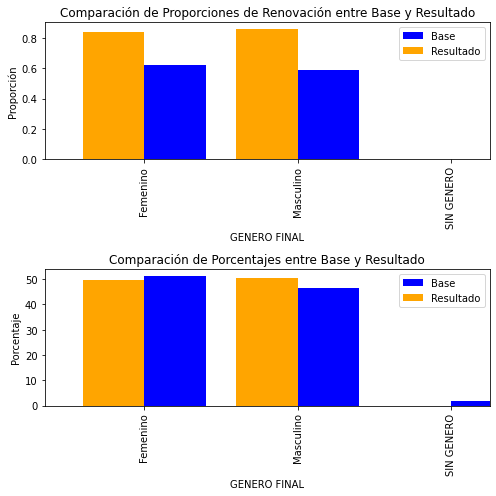

In [164]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('GENERO FINAL')  # Cambiado de 'DESCRIPCION_FORMA_PAGO' a 'GENERO FINAL'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('GENERO FINAL')  # Cambiado de 'DESCRIPCION_FORMA_PAGO' a 'GENERO FINAL'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()


#### DEDUCIBLE FINAL

In [161]:
# Calcular la proporción de '1' por cada categoría de 'DEDUCIBLE FINAL' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('DEDUCIBLE FINAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'DEDUCIBLE FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('DEDUCIBLE FINAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['DEDUCIBLE FINAL'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['DEDUCIBLE FINAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0               Porcentaje_Base  Proporcion_Renovacion_Base  \
DEDUCIBLE FINAL                                                   
1 SMMLV                   37.345374                    0.654471   
10% Minimo 1 SMMLV        24.425004                    0.566147   
10% Minimo 2 SMMLV         0.009407                    1.000000   
10% Minimo 3 SMMLV         0.002352                    0.000000   
1300000                    0.002352                    1.000000   
20% Minimo 1 SMMLV         0.002352                    1.000000   
20% Minimo 2 SMMLV         0.002352                    1.000000   
20% Minimo 4 SMMLV         0.021166                    0.666667   
950000                    37.813367                    0.550594   
Franquicia                 0.376276                    0.475000   

col_0               Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
DEDUCIBLE FINAL                                                            
1 SMMLV                        22.586943                         0.482713  
10% Minimo 1 SMMLV             12.779193                         0.922450  
10% Minimo 2 SMMLV              0.011581                         1.000000  
10% Minimo 3 SMMLV                   NaN                              NaN  
1300000                         1.110155                         0.862891  
20% Minimo 1 SMMLV              0.003309                         1.000000  
20% Minimo 2 SMMLV              0.001654                         1.000000  
20% Minimo 4 SMMLV              0.018199                         1.000000  
950000                         63.295391                         0.968685  
Franquicia                      0.193574                         1.000000

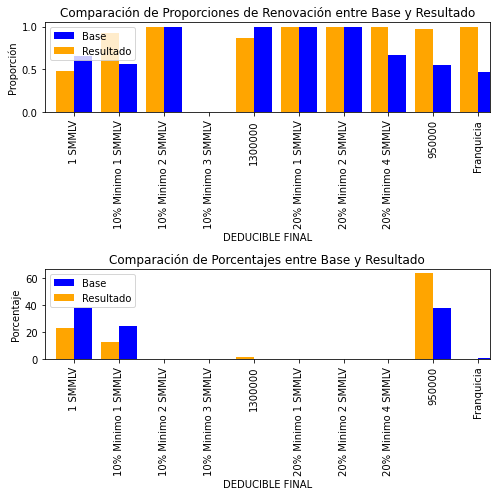

In [166]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('DEDUCIBLE FINAL')  # Cambiado de 'GENERO FINAL' a 'DEDUCIBLE FINAL'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('DEDUCIBLE FINAL')  # Cambiado de 'GENERO FINAL' a 'DEDUCIBLE FINAL'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()


#### BONUS MALUS FINAL

In [170]:
# Calcular la proporción de '1' por cada categoría de 'BONUS MALUS FINAL' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('BONUS MALUS FINAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'BONUS MALUS FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('BONUS MALUS FINAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['BONUS MALUS FINAL'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['BONUS MALUS FINAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]



col_0                   Porcentaje_Base  Proporcion_Renovacion_Base  \
BONUS MALUS FINAL                                                     
-1- CON SINIESTRO             44.367621                    0.631877   
0- SIN EXPERIENCIA            10.260571                    0.368095   
1- UN AÑO CONTINUO            12.370067                    0.579468   
2- DOS AÑOS CONTINUOS          9.677343                    0.557716   
3- TRES AÑOS CONTINUOS         7.424392                    0.615774   
4- CUATRO AÑOS O MÁS          15.900005                    0.650939   

col_0                   Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
BONUS MALUS FINAL                                                              
-1- CON SINIESTRO                  28.179081                         0.721994  
0- SIN EXPERIENCIA                 11.250455                         0.654412  
1- UN AÑO CONTINUO                 11.177658                         0.905269  
2- DOS AÑOS CONTINUOS               9.739916                         0.923221  
3- TRES AÑOS CONTINUOS              8.853115                         0.957765  
4- CUATRO AÑOS O MÁS               30.799775                         0.970563

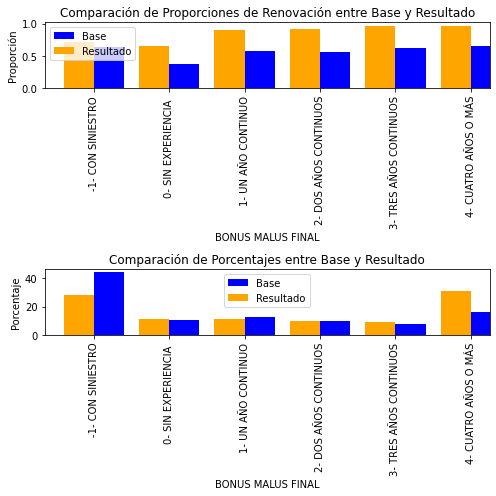

In [171]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('BONUS MALUS FINAL')  # Cambiado de 'DEDUCIBLE FINAL' a 'BONUS MALUS FINAL'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('BONUS MALUS FINAL')  # Cambiado de 'DEDUCIBLE FINAL' a 'BONUS MALUS FINAL'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()


#### TIPO_SUCURSAL

In [172]:
# Calcular la proporción de '1' por cada categoría de 'TIPO_SUCURSAL' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('TIPO_SUCURSAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'TIPO_SUCURSAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('TIPO_SUCURSAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['TIPO_SUCURSAL'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['TIPO_SUCURSAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0          Porcentaje_Base  Proporcion_Renovacion_Base  \
TIPO_SUCURSAL                                                
Agencia              79.062603                    0.609120   
Delegadas             2.998448                    0.545882   
Franquicias          15.798881                    0.560881   
Otras                 2.140069                    0.300000   

col_0          Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
TIPO_SUCURSAL                                                         
Agencia                   79.752490                         0.820741  
Delegadas                  3.485987                         0.979592  
Franquicias               15.720856                         0.973479  
Otras                      1.040667                         0.976153

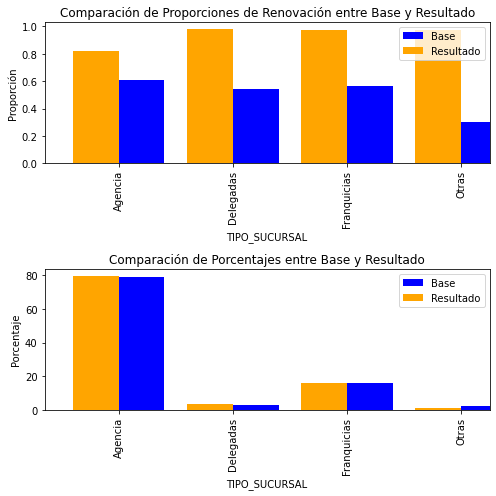

In [173]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('TIPO_SUCURSAL')  # Cambiado de 'BONUS MALUS FINAL' a 'TIPO_SUCURSAL'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('TIPO_SUCURSAL')  # Cambiado de 'BONUS MALUS FINAL' a 'TIPO_SUCURSAL'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()


#### MARCA_FINAL

In [174]:
# Calcular la proporción de '1' por cada categoría de 'MARCA_FINAL' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('MARCA_FINAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'MARCA_FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('MARCA_FINAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['MARCA_FINAL'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['MARCA_FINAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0        Porcentaje_Base  Proporcion_Renovacion_Base  \
MARCA_FINAL                                                
A                   4.966841                    0.582386   
B                   2.843234                    0.582299   
C                   1.930765                    0.640682   
CHEVROLET          23.634824                    0.586965   
FORD                4.258972                    0.588073   
HYUNDAI             5.291379                    0.617333   
KIA                 7.530220                    0.608370   
MAZDA               4.529420                    0.570093   
NISSAN              8.421523                    0.610723   
RENAULT            25.868962                    0.592545   
SUZUKI              4.825737                    0.577485   
TOYOTA              1.810827                    0.616883   
VOLKSWAGEN          4.087296                    0.570196   

col_0        Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
MARCA_FINAL                                                         
A                        4.844314                         0.798839  
B                        2.991297                         0.846792  
C                        1.828199                         0.897738  
CHEVROLET               20.682638                         0.810735  
FORD                     6.118262                         0.915360  
HYUNDAI                  5.168591                         0.831946  
KIA                      8.331955                         0.823272  
MAZDA                    6.300255                         0.896271  
NISSAN                   9.182357                         0.862883  
RENAULT                 21.701797                         0.867271  
SUZUKI                   5.046160                         0.871475  
TOYOTA                   3.092221                         0.909577  
VOLKSWAGEN               4.711955                         0.852528

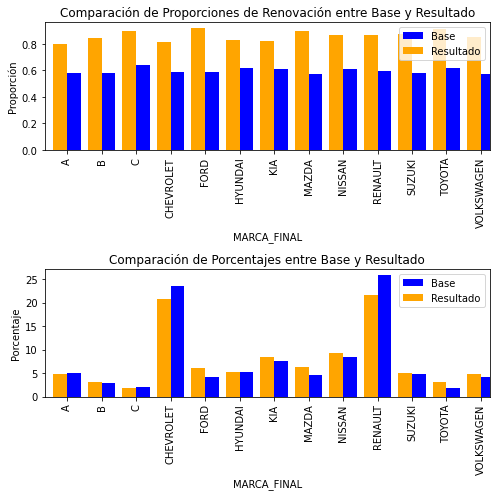

In [175]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('MARCA_FINAL')  # Cambiado de 'TIPO_SUCURSAL' a 'MARCA_FINAL'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('MARCA_FINAL')  # Cambiado de 'TIPO_SUCURSAL' a 'MARCA_FINAL'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()



#### DEPARTAMENTO_FINAL

In [176]:
# Calcular la proporción de '1' por cada categoría de 'DEPARTAMENTO_FINAL' en el dataframe base_entrenamiento
proporcion_renovacion_base = base_entrenamiento.groupby('DEPARTAMENTO_FINAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'DEPARTAMENTO_FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('DEPARTAMENTO_FINAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento['DEPARTAMENTO_FINAL'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['DEPARTAMENTO_FINAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0               Porcentaje_Base  Proporcion_Renovacion_Base  \
DEPARTAMENTO_FINAL                                                
ANTIOQUIA                 16.309205                    0.605624   
ATLANTICO                  5.517144                    0.647485   
BOGOTA D.C.               24.081652                    0.749219   
BOYACA                     1.451014                    0.560778   
COSTA                      4.228399                    0.649611   
CUNDINAMARCA               9.961902                    0.148253   
EJE                        6.563661                    0.533501   
GRAN_TOLIMA                3.515827                    0.573913   
META                       2.457551                    0.602871   
NORTE SANTANDER            1.768496                    0.591755   
OTROS                      1.093552                    0.533333   
SANTANDER                  5.686468                    0.555004   
SUROCCIDENTE               1.568600                    0.581709   
VALLE                     15.796529                    0.637487   

col_0               Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
DEPARTAMENTO_FINAL                                                         
ANTIOQUIA                      11.675656                         0.630721  
ATLANTICO                       4.841005                         0.897813  
BOGOTA D.C.                    33.632242                         0.896448  
BOYACA                          3.795374                         0.938535  
COSTA                           3.457860                         0.773206  
CUNDINAMARCA                    3.499222                         0.812766  
EJE                             5.832037                         0.850496  
GRAN_TOLIMA                     4.986599                         0.915063  
META                            4.824460                         0.916324  
NORTE SANTANDER                 2.082989                         0.943606  
OTROS                           1.490685                         0.942286  
SANTANDER                       5.580557                         0.882004  
SUROCCIDENTE                    1.350055                         0.914216  
VALLE                          12.951259                         0.832397

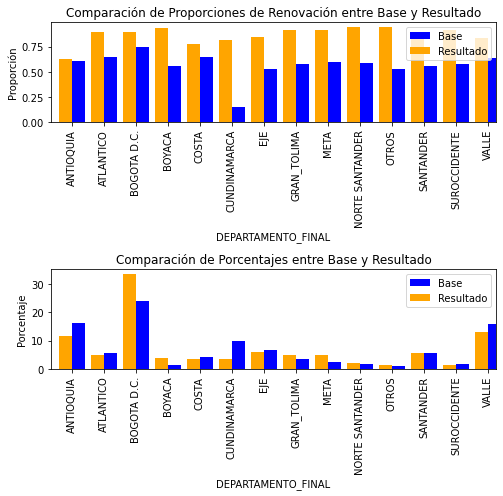

In [177]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('DEPARTAMENTO_FINAL')  # Cambiado de 'MARCA_FINAL' a 'DEPARTAMENTO_FINAL'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('DEPARTAMENTO_FINAL')  # Cambiado de 'MARCA_FINAL' a 'DEPARTAMENTO_FINAL'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()


#### VALOR_ASEGURADO

In [198]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'VALOR_ASEGURADO' y 'Estado_Renovacion'
correlation_pearson = base_entrenamiento['VALOR_ASEGURADO'].corr(base_entrenamiento['Estado_Renovacion'], method='pearson')
correlation_spearman = base_entrenamiento['VALOR_ASEGURADO'].corr(base_entrenamiento['Estado_Renovacion'], method='spearman')
correlation_kendall = base_entrenamiento['VALOR_ASEGURADO'].corr(base_entrenamiento['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para la base de entrenamiento: {correlation_pearson}')
print(f'Correlación de Spearman para la base de entrenamiento: {correlation_spearman}')
print(f'Correlación de Kendall para la base de entrenamiento: {correlation_kendall}')

# Suponiendo que tienes un DataFrame llamado df con las columnas 'VALOR_ASEGURADO' y 'Estado_Renovacion'
correlation_pearson = resultado_final['VALOR_ASEGURADO'].corr(resultado_final['Estado_Renovacion'], method='pearson')
correlation_spearman = resultado_final['VALOR_ASEGURADO'].corr(resultado_final['Estado_Renovacion'], method='spearman')
correlation_kendall = resultado_final['VALOR_ASEGURADO'].corr(resultado_final['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')



Correlación de Pearson para la base de entrenamiento: -0.005332659623551695
Correlación de Spearman para la base de entrenamiento: 0.0014999745144166276
Correlación de Kendall para la base de entrenamiento: 0.00122638408860476
Correlación de Pearson para el modelo: 0.1385516524335724
Correlación de Spearman para el modelo: 0.16258306368175351
Correlación de Kendall para el modelo: 0.132877831565101


#### MODELO

In [199]:
# Suponiendo que 'MODELO' es la columna que quieres usar en lugar de 'VALOR_ASEGURADO'
correlation_pearson = base_entrenamiento['MODELO'].corr(base_entrenamiento['Estado_Renovacion'], method='pearson')
correlation_spearman = base_entrenamiento['MODELO'].corr(base_entrenamiento['Estado_Renovacion'], method='spearman')
correlation_kendall = base_entrenamiento['MODELO'].corr(base_entrenamiento['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para la base de entrenamiento: {correlation_pearson}')
print(f'Correlación de Spearman para la base de entrenamiento: {correlation_spearman}')
print(f'Correlación de Kendall para la base de entrenamiento: {correlation_kendall}')

# Suponiendo que 'MODELO' es la columna que quieres usar en lugar de 'VALOR_ASEGURADO'
correlation_pearson = resultado_final['MODELO'].corr(resultado_final['Estado_Renovacion'], method='pearson')
correlation_spearman = resultado_final['MODELO'].corr(resultado_final['Estado_Renovacion'], method='spearman')
correlation_kendall = resultado_final['MODELO'].corr(resultado_final['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')


Correlación de Pearson para la base de entrenamiento: -0.030730212308357468
Correlación de Spearman para la base de entrenamiento: -0.026526596697453386
Correlación de Kendall para la base de entrenamiento: -0.022432469408039217
Correlación de Pearson para el modelo: 0.15617421766751816
Correlación de Spearman para el modelo: 0.16195722530922663
Correlación de Kendall para el modelo: 0.13676906225058236


#### CANTIDAD_RENOVACION

In [200]:
# Suponiendo que 'CANTIDAD_RENOVACION' es la columna que quieres usar en lugar de 'VALOR_ASEGURADO'
correlation_pearson = base_entrenamiento['CANTIDAD_RENOVACION'].corr(base_entrenamiento['Estado_Renovacion'], method='pearson')
correlation_spearman = base_entrenamiento['CANTIDAD_RENOVACION'].corr(base_entrenamiento['Estado_Renovacion'], method='spearman')
correlation_kendall = base_entrenamiento['CANTIDAD_RENOVACION'].corr(base_entrenamiento['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para la base de entrenamiento: {correlation_pearson}')
print(f'Correlación de Spearman para la base de entrenamiento: {correlation_spearman}')
print(f'Correlación de Kendall para la base de entrenamiento: {correlation_kendall}')

# Suponiendo que 'CANTIDAD_RENOVACION' es la columna que quieres usar en lugar de 'VALOR_ASEGURADO'
correlation_pearson = resultado_final['CANTIDAD_RENOVACION'].corr(resultado_final['Estado_Renovacion'], method='pearson')
correlation_spearman = resultado_final['CANTIDAD_RENOVACION'].corr(resultado_final['Estado_Renovacion'], method='spearman')
correlation_kendall = resultado_final['CANTIDAD_RENOVACION'].corr(resultado_final['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')


Correlación de Pearson para la base de entrenamiento: 0.2617655348741117
Correlación de Spearman para la base de entrenamiento: 0.2880650729722657
Correlación de Kendall para la base de entrenamiento: 0.25726366652892013
Correlación de Pearson para el modelo: -0.16357108119461236
Correlación de Spearman para el modelo: -0.22836245308199074
Correlación de Kendall para el modelo: -0.20980491357180733


#### EDAD FINAL

In [202]:
# Cambiar 'VALOR_ASEGURADO' por 'EDAD FINAL'
correlation_pearson = base_entrenamiento['EDAD FINAL'].corr(base_entrenamiento['Estado_Renovacion'], method='pearson')
correlation_spearman = base_entrenamiento['EDAD FINAL'].corr(base_entrenamiento['Estado_Renovacion'], method='spearman')
correlation_kendall = base_entrenamiento['EDAD FINAL'].corr(base_entrenamiento['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para la base de entrenamiento: {correlation_pearson}')
print(f'Correlación de Spearman para la base de entrenamiento: {correlation_spearman}')
print(f'Correlación de Kendall para la base de entrenamiento: {correlation_kendall}')

# Cambiar 'VALOR_ASEGURADO' por 'EDAD FINAL'
correlation_pearson = resultado_final['EDAD FINAL'].corr(resultado_final['Estado_Renovacion'], method='pearson')
correlation_spearman = resultado_final['EDAD FINAL'].corr(resultado_final['Estado_Renovacion'], method='spearman')
correlation_kendall = resultado_final['EDAD FINAL'].corr(resultado_final['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')


Correlación de Pearson para la base de entrenamiento: 0.10957937684509761
Correlación de Spearman para la base de entrenamiento: 0.1128377785048025
Correlación de Kendall para la base de entrenamiento: 0.09309150981573444
Correlación de Pearson para el modelo: 0.046166639318059866
Correlación de Spearman para el modelo: 0.048174870106508505
Correlación de Kendall para el modelo: 0.03975171463938278


#### SCORE

In [203]:
# Cambiar 'VALOR_ASEGURADO' por 'SCORE'
correlation_pearson = base_entrenamiento['SCORE'].corr(base_entrenamiento['Estado_Renovacion'], method='pearson')
correlation_spearman = base_entrenamiento['SCORE'].corr(base_entrenamiento['Estado_Renovacion'], method='spearman')
correlation_kendall = base_entrenamiento['SCORE'].corr(base_entrenamiento['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para la base de entrenamiento: {correlation_pearson}')
print(f'Correlación de Spearman para la base de entrenamiento: {correlation_spearman}')
print(f'Correlación de Kendall para la base de entrenamiento: {correlation_kendall}')

# Cambiar 'VALOR_ASEGURADO' por 'SCORE'
correlation_pearson = resultado_final['SCORE'].corr(resultado_final['Estado_Renovacion'], method='pearson')
correlation_spearman = resultado_final['SCORE'].corr(resultado_final['Estado_Renovacion'], method='spearman')
correlation_kendall = resultado_final['SCORE'].corr(resultado_final['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')


Correlación de Pearson para la base de entrenamiento: 0.03513072103394418
Correlación de Spearman para la base de entrenamiento: 0.036559636809051915
Correlación de Kendall para la base de entrenamiento: 0.030147832125762546
Correlación de Pearson para el modelo: 0.14536346366525124
Correlación de Spearman para el modelo: 0.1536605678172174
Correlación de Kendall para el modelo: 0.12678175957638718


#### Prima

In [204]:
# Cambiar 'VALOR_ASEGURADO' por 'Prima'
correlation_pearson = base_entrenamiento['Prima'].corr(base_entrenamiento['Estado_Renovacion'], method='pearson')
correlation_spearman = base_entrenamiento['Prima'].corr(base_entrenamiento['Estado_Renovacion'], method='spearman')
correlation_kendall = base_entrenamiento['Prima'].corr(base_entrenamiento['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para la base de entrenamiento: {correlation_pearson}')
print(f'Correlación de Spearman para la base de entrenamiento: {correlation_spearman}')
print(f'Correlación de Kendall para la base de entrenamiento: {correlation_kendall}')

# Cambiar 'VALOR_ASEGURADO' por 'Prima'
correlation_pearson = resultado_final['Prima'].corr(resultado_final['Estado_Renovacion'], method='pearson')
correlation_spearman = resultado_final['Prima'].corr(resultado_final['Estado_Renovacion'], method='spearman')
correlation_kendall = resultado_final['Prima'].corr(resultado_final['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')


Correlación de Pearson para la base de entrenamiento: -0.0311593424088674
Correlación de Spearman para la base de entrenamiento: -0.025483607254613676
Correlación de Kendall para la base de entrenamiento: -0.020808944323201132
Correlación de Pearson para el modelo: -0.1413659996159231
Correlación de Spearman para el modelo: -0.20694446200767652
Correlación de Kendall para el modelo: -0.1689724108655882


#### Incremento

In [205]:
# Cambiar 'VALOR_ASEGURADO' por 'Incremento'
correlation_pearson = base_entrenamiento['Incremento'].corr(base_entrenamiento['Estado_Renovacion'], method='pearson')
correlation_spearman = base_entrenamiento['Incremento'].corr(base_entrenamiento['Estado_Renovacion'], method='spearman')
correlation_kendall = base_entrenamiento['Incremento'].corr(base_entrenamiento['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para la base de entrenamiento: {correlation_pearson}')
print(f'Correlación de Spearman para la base de entrenamiento: {correlation_spearman}')
print(f'Correlación de Kendall para la base de entrenamiento: {correlation_kendall}')

# Cambiar 'VALOR_ASEGURADO' por 'Incremento'
correlation_pearson = resultado_final['Incremento'].corr(resultado_final['Estado_Renovacion'], method='pearson')
correlation_spearman = resultado_final['Incremento'].corr(resultado_final['Estado_Renovacion'], method='spearman')
correlation_kendall = resultado_final['Incremento'].corr(resultado_final['Estado_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')


Correlación de Pearson para la base de entrenamiento: -0.19454833178016934
Correlación de Spearman para la base de entrenamiento: -0.16205053683235288
Correlación de Kendall para la base de entrenamiento: -0.13425886456096608
Correlación de Pearson para el modelo: -0.19914221566809798
Correlación de Spearman para el modelo: -0.27525461552022895
Correlación de Kendall para el modelo: -0.22474699465067763


<a id="section4"></a>
## <font color="#004D7F"><h3>**4. Ajuste Base Entrenamiento**</font></h3>
***

In [210]:
base_entrenamiento=pd.concat([X, y], axis=1)
base_entrenamiento.columns

Index(['NOMBRE_PRODUCTO', 'COMISION', 'DESCRIPCION_FORMA_PAGO',
       'VALOR_ASEGURADO', 'MODELO', 'CANTIDAD_RENOVACION', 'MARCA_SINIESTROS',
       'GENERO FINAL', 'EDAD FINAL', 'DEDUCIBLE FINAL', 'BONUS MALUS FINAL',
       'SCORE', 'Prima', 'Incremento', 'TIPO_SUCURSAL', 'MARCA_FINAL',
       'DEPARTAMENTO_FINAL', 'Estado_Renovacion'],
      dtype='object')

### Agrupar 'NOMBRE_PRODUCTO' 

In [211]:
base_entrenamiento['NOMBRE_PRODUCTO'].unique()

array(['F1', 'NI1', 'I1', 'I2', 'I4', 'NI2', 'NF1', 'I3'], dtype=object)

In [212]:
# Definir una función para modificar las categorías
def modificar_categorias(categoria):
    if categoria in ['F1', 'NF1']:
        return 'F'
    else:
        return 'I'

# Aplicar la función a la columna 'NOMBRE_PRODUCTO'
base_entrenamiento['NOMBRE_PRODUCTO'] = base_entrenamiento['NOMBRE_PRODUCTO'].apply(lambda x: modificar_categorias(x))

# Verificar los cambios
print("Categorías modificadas de NOMBRE_PRODUCTO:")
print(base_entrenamiento['NOMBRE_PRODUCTO'].unique())

Categorías modificadas de NOMBRE_PRODUCTO:
['F' 'I']


### Eliminar 'COMISION' 

In [213]:
# Eliminar la variable 'COMISION'
base_entrenamiento = base_entrenamiento.drop('COMISION', axis=1)

### Eliminar 'MARCA_SINIESTROS' 

In [214]:
# Eliminar la variable 'MARCA_SINIESTROS'
base_entrenamiento = base_entrenamiento.drop('MARCA_SINIESTROS', axis=1)

### Agrupar 'DEDUCIBLE FINAL' 

In [215]:
base_entrenamiento['DEDUCIBLE FINAL'].unique()

array(['10% Minimo 1 SMMLV', '950000', '1 SMMLV', '20% Minimo 4 SMMLV',
       'Franquicia', '10% Minimo 2 SMMLV', '20% Minimo 2 SMMLV',
       '10% Minimo 3 SMMLV', '1300000', '20% Minimo 1 SMMLV'],
      dtype=object)

In [217]:
# Definir las categorías que se mantendrán y las que se cambiarán
categorias_mantener = ['10% Minimo 1 SMMLV', '950000', '1 SMMLV']
categorias_cambiar = set(base_entrenamiento['DEDUCIBLE FINAL']) - set(categorias_mantener)

# Modificar la columna 'DEDUCIBLE FINAL'
base_entrenamiento['DEDUCIBLE FINAL'] = base_entrenamiento['DEDUCIBLE FINAL'].map(
    lambda x: x if x in categorias_mantener else 'OTRAS'
)

# Verificar los cambios
print("Categorías después de la modificación:")
print(base_entrenamiento['DEDUCIBLE FINAL'].unique())

Categorías después de la modificación:
['10% Minimo 1 SMMLV' '950000' '1 SMMLV' 'OTRAS']


### Agrupar 'TIPO_SUCURSAL' 

In [218]:
base_entrenamiento['TIPO_SUCURSAL'].unique()

array(['Agencia', 'Franquicias', 'Delegadas', 'Otras'], dtype=object)

In [219]:
# Definir las categorías que se mantendrán y las que se cambiarán
categorias_mantener = ['Agencia', 'Franquicias']
categorias_cambiar = set(base_entrenamiento['TIPO_SUCURSAL']) - set(categorias_mantener)

# Modificar la columna 'TIPO_SUCURSALL'
base_entrenamiento['TIPO_SUCURSAL'] = base_entrenamiento['TIPO_SUCURSAL'].map(
    lambda x: x if x in categorias_mantener else 'OTRAS'
)

# Verificar los cambios
print("Categorías después de la modificación:")
print(base_entrenamiento['TIPO_SUCURSAL'].unique())

Categorías después de la modificación:
['Agencia' 'Franquicias' 'OTRAS']


### Eliminar 'MARCA_FINAL' 

In [220]:
# Eliminar la variable 'MARCA_FINAL'
base_entrenamiento = base_entrenamiento.drop('MARCA_FINAL', axis=1)

<a id="section5"></a>
## <font color="#004D7F"><h3>**5. Reentrenamiento**</font></h3>
***

In [246]:
X_mod=base_entrenamiento.drop(columns = 'Estado_Renovacion')
y_mod=base_entrenamiento['Estado_Renovacion']

In [247]:
# División de los datos en train y test
# ==============================================================================
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(
                                        X_mod,
                                        y_mod,
                                        random_state = 123
                                    )

In [248]:
# Lista de características categóricas
cat_features = ['NOMBRE_PRODUCTO', 'DESCRIPCION_FORMA_PAGO',
                'GENERO FINAL', 'DEDUCIBLE FINAL', 'BONUS MALUS FINAL', 'TIPO_SUCURSAL', 'DEPARTAMENTO_FINAL']

# Crear un objeto Pool para los datos de entrenamiento y prueba
train_data_mod = Pool(data=X_train_mod, label=y_train_mod, cat_features=cat_features)
test_data_mod = Pool(data=X_test_mod, label=y_test_mod, cat_features=cat_features)

In [249]:
# Lista de combinaciones de hiperparámetros
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'loss_function': ['Logloss', 'CrossEntropy'],
}

best_score = 0
best_params = {}

# Realizar la búsqueda de hiperparámetros
for iterations in param_grid['iterations']:
    for learning_rate in param_grid['learning_rate']:
        for depth in param_grid['depth']:
            for loss_function in param_grid['loss_function']:
                params = {
                    'iterations': iterations,
                    'learning_rate': learning_rate,
                    'depth': depth,
                    'loss_function': loss_function,
                }

                model = CatBoostClassifier(**params, cat_features=cat_features)
                model.fit(X_train_mod, y_train_mod)
                score = model.score(X_test_mod, y_test_mod)

                if score > best_score:
                    best_score = score
                    best_params = params

print("Mejores hiperparámetros encontrados:", best_params)

0:	learn: 0.6730574	total: 26ms	remaining: 2.58s
1:	learn: 0.6558832	total: 53.7ms	remaining: 2.63s
2:	learn: 0.6372258	total: 85.5ms	remaining: 2.76s
3:	learn: 0.6254612	total: 113ms	remaining: 2.71s
4:	learn: 0.6105189	total: 145ms	remaining: 2.75s
5:	learn: 0.5937582	total: 175ms	remaining: 2.74s
6:	learn: 0.5822909	total: 204ms	remaining: 2.71s
7:	learn: 0.5710244	total: 234ms	remaining: 2.69s
8:	learn: 0.5623275	total: 262ms	remaining: 2.64s
9:	learn: 0.5545605	total: 294ms	remaining: 2.64s
10:	learn: 0.5477652	total: 322ms	remaining: 2.6s
11:	learn: 0.5408130	total: 348ms	remaining: 2.55s
12:	learn: 0.5355629	total: 374ms	remaining: 2.5s
13:	learn: 0.5283198	total: 401ms	remaining: 2.46s
14:	learn: 0.5237840	total: 427ms	remaining: 2.42s
15:	learn: 0.5198855	total: 458ms	remaining: 2.41s
16:	learn: 0.5153613	total: 487ms	remaining: 2.38s
17:	learn: 0.5114437	total: 517ms	remaining: 2.35s
18:	learn: 0.5016406	total: 545ms	remaining: 2.32s
19:	learn: 0.4972735	total: 571ms	remainin

65:	learn: 0.3659800	total: 1.81s	remaining: 933ms
66:	learn: 0.3645550	total: 1.84s	remaining: 906ms
67:	learn: 0.3626438	total: 1.87s	remaining: 879ms
68:	learn: 0.3619296	total: 1.89s	remaining: 851ms
69:	learn: 0.3612937	total: 1.92s	remaining: 824ms
70:	learn: 0.3592041	total: 1.95s	remaining: 797ms
71:	learn: 0.3578991	total: 1.98s	remaining: 768ms
72:	learn: 0.3568165	total: 2s	remaining: 741ms
73:	learn: 0.3560892	total: 2.03s	remaining: 713ms
74:	learn: 0.3556367	total: 2.06s	remaining: 686ms
75:	learn: 0.3531039	total: 2.08s	remaining: 658ms
76:	learn: 0.3507197	total: 2.11s	remaining: 631ms
77:	learn: 0.3495864	total: 2.14s	remaining: 603ms
78:	learn: 0.3466337	total: 2.17s	remaining: 576ms
79:	learn: 0.3446288	total: 2.19s	remaining: 548ms
80:	learn: 0.3442744	total: 2.22s	remaining: 520ms
81:	learn: 0.3437007	total: 2.25s	remaining: 493ms
82:	learn: 0.3429212	total: 2.28s	remaining: 467ms
83:	learn: 0.3402536	total: 2.3s	remaining: 439ms
84:	learn: 0.3390340	total: 2.33s	r

32:	learn: 0.3863258	total: 1.34s	remaining: 2.72s
33:	learn: 0.3832103	total: 1.39s	remaining: 2.69s
34:	learn: 0.3785606	total: 1.42s	remaining: 2.64s
35:	learn: 0.3757928	total: 1.46s	remaining: 2.6s
36:	learn: 0.3736384	total: 1.5s	remaining: 2.56s
37:	learn: 0.3711609	total: 1.54s	remaining: 2.52s
38:	learn: 0.3667164	total: 1.58s	remaining: 2.48s
39:	learn: 0.3640374	total: 1.62s	remaining: 2.43s
40:	learn: 0.3619395	total: 1.66s	remaining: 2.39s
41:	learn: 0.3609350	total: 1.7s	remaining: 2.35s
42:	learn: 0.3578590	total: 1.74s	remaining: 2.31s
43:	learn: 0.3556157	total: 1.78s	remaining: 2.26s
44:	learn: 0.3507795	total: 1.82s	remaining: 2.23s
45:	learn: 0.3489489	total: 1.86s	remaining: 2.19s
46:	learn: 0.3449692	total: 1.9s	remaining: 2.15s
47:	learn: 0.3413880	total: 1.94s	remaining: 2.11s
48:	learn: 0.3397875	total: 1.98s	remaining: 2.06s
49:	learn: 0.3360955	total: 2.02s	remaining: 2.02s
50:	learn: 0.3329210	total: 2.06s	remaining: 1.98s
51:	learn: 0.3298646	total: 2.1s	re

96:	learn: 0.2226841	total: 5.66s	remaining: 175ms
97:	learn: 0.2220638	total: 5.72s	remaining: 117ms
98:	learn: 0.2210386	total: 5.78s	remaining: 58.3ms
99:	learn: 0.2197561	total: 5.83s	remaining: 0us
0:	learn: 0.6591869	total: 54.9ms	remaining: 5.44s
1:	learn: 0.6274381	total: 110ms	remaining: 5.38s
2:	learn: 0.6050043	total: 169ms	remaining: 5.45s
3:	learn: 0.5836207	total: 225ms	remaining: 5.39s
4:	learn: 0.5619445	total: 283ms	remaining: 5.38s
5:	learn: 0.5455609	total: 343ms	remaining: 5.37s
6:	learn: 0.5243910	total: 398ms	remaining: 5.28s
7:	learn: 0.5089869	total: 457ms	remaining: 5.25s
8:	learn: 0.4952740	total: 515ms	remaining: 5.21s
9:	learn: 0.4832581	total: 573ms	remaining: 5.16s
10:	learn: 0.4705421	total: 632ms	remaining: 5.11s
11:	learn: 0.4609246	total: 689ms	remaining: 5.05s
12:	learn: 0.4522017	total: 748ms	remaining: 5.01s
13:	learn: 0.4459538	total: 809ms	remaining: 4.97s
14:	learn: 0.4391446	total: 865ms	remaining: 4.9s
15:	learn: 0.4331418	total: 921ms	remainin

62:	learn: 0.5937491	total: 1.73s	remaining: 1.02s
63:	learn: 0.5926471	total: 1.76s	remaining: 992ms
64:	learn: 0.5914480	total: 1.79s	remaining: 965ms
65:	learn: 0.5902303	total: 1.82s	remaining: 937ms
66:	learn: 0.5890667	total: 1.85s	remaining: 909ms
67:	learn: 0.5879219	total: 1.87s	remaining: 881ms
68:	learn: 0.5868810	total: 1.9s	remaining: 853ms
69:	learn: 0.5858139	total: 1.93s	remaining: 826ms
70:	learn: 0.5847641	total: 1.96s	remaining: 799ms
71:	learn: 0.5836408	total: 1.99s	remaining: 773ms
72:	learn: 0.5825777	total: 2.02s	remaining: 745ms
73:	learn: 0.5815604	total: 2.04s	remaining: 717ms
74:	learn: 0.5803540	total: 2.07s	remaining: 689ms
75:	learn: 0.5793397	total: 2.09s	remaining: 661ms
76:	learn: 0.5783315	total: 2.12s	remaining: 634ms
77:	learn: 0.5771315	total: 2.15s	remaining: 606ms
78:	learn: 0.5761625	total: 2.18s	remaining: 579ms
79:	learn: 0.5752943	total: 2.2s	remaining: 551ms
80:	learn: 0.5741706	total: 2.23s	remaining: 523ms
81:	learn: 0.5730494	total: 2.26s

27:	learn: 0.6225350	total: 1.15s	remaining: 2.96s
28:	learn: 0.6205449	total: 1.23s	remaining: 3.02s
29:	learn: 0.6183403	total: 1.28s	remaining: 3s
30:	learn: 0.6164750	total: 1.33s	remaining: 2.95s
31:	learn: 0.6146100	total: 1.37s	remaining: 2.91s
32:	learn: 0.6124897	total: 1.42s	remaining: 2.88s
33:	learn: 0.6105529	total: 1.46s	remaining: 2.84s
34:	learn: 0.6088220	total: 1.5s	remaining: 2.79s
35:	learn: 0.6070100	total: 1.54s	remaining: 2.74s
36:	learn: 0.6052167	total: 1.58s	remaining: 2.69s
37:	learn: 0.6033319	total: 1.62s	remaining: 2.64s
38:	learn: 0.6015864	total: 1.66s	remaining: 2.6s
39:	learn: 0.5995441	total: 1.7s	remaining: 2.55s
40:	learn: 0.5979868	total: 1.74s	remaining: 2.5s
41:	learn: 0.5958065	total: 1.78s	remaining: 2.46s
42:	learn: 0.5942138	total: 1.82s	remaining: 2.41s
43:	learn: 0.5925735	total: 1.86s	remaining: 2.37s
44:	learn: 0.5910105	total: 1.9s	remaining: 2.32s
45:	learn: 0.5893959	total: 1.94s	remaining: 2.28s
46:	learn: 0.5877864	total: 1.98s	remai

92:	learn: 0.5300712	total: 3.81s	remaining: 287ms
93:	learn: 0.5291552	total: 3.85s	remaining: 246ms
94:	learn: 0.5281719	total: 3.9s	remaining: 205ms
95:	learn: 0.5271695	total: 3.94s	remaining: 164ms
96:	learn: 0.5261280	total: 3.98s	remaining: 123ms
97:	learn: 0.5252157	total: 4.02s	remaining: 82.1ms
98:	learn: 0.5244079	total: 4.06s	remaining: 41ms
99:	learn: 0.5236851	total: 4.1s	remaining: 0us
0:	learn: 0.6895938	total: 54ms	remaining: 5.34s
1:	learn: 0.6857351	total: 108ms	remaining: 5.28s
2:	learn: 0.6825078	total: 162ms	remaining: 5.25s
3:	learn: 0.6790939	total: 218ms	remaining: 5.23s
4:	learn: 0.6759232	total: 277ms	remaining: 5.27s
5:	learn: 0.6723284	total: 338ms	remaining: 5.3s
6:	learn: 0.6684366	total: 392ms	remaining: 5.21s
7:	learn: 0.6653296	total: 449ms	remaining: 5.17s
8:	learn: 0.6619839	total: 507ms	remaining: 5.13s
9:	learn: 0.6591007	total: 562ms	remaining: 5.06s
10:	learn: 0.6557425	total: 617ms	remaining: 4.99s
11:	learn: 0.6524685	total: 672ms	remaining: 4.

56:	learn: 0.5473278	total: 3.29s	remaining: 2.48s
57:	learn: 0.5456408	total: 3.35s	remaining: 2.42s
58:	learn: 0.5438162	total: 3.4s	remaining: 2.37s
59:	learn: 0.5424610	total: 3.46s	remaining: 2.31s
60:	learn: 0.5409626	total: 3.52s	remaining: 2.25s
61:	learn: 0.5396158	total: 3.58s	remaining: 2.19s
62:	learn: 0.5386606	total: 3.62s	remaining: 2.13s
63:	learn: 0.5370551	total: 3.68s	remaining: 2.07s
64:	learn: 0.5354708	total: 3.74s	remaining: 2.01s
65:	learn: 0.5337947	total: 3.79s	remaining: 1.95s
66:	learn: 0.5325099	total: 3.85s	remaining: 1.9s
67:	learn: 0.5310458	total: 3.9s	remaining: 1.84s
68:	learn: 0.5294300	total: 3.96s	remaining: 1.78s
69:	learn: 0.5281861	total: 4.02s	remaining: 1.72s
70:	learn: 0.5268007	total: 4.07s	remaining: 1.66s
71:	learn: 0.5253976	total: 4.13s	remaining: 1.6s
72:	learn: 0.5240135	total: 4.19s	remaining: 1.55s
73:	learn: 0.5224769	total: 4.24s	remaining: 1.49s
74:	learn: 0.5211586	total: 4.3s	remaining: 1.43s
75:	learn: 0.5198696	total: 4.36s	re

23:	learn: 0.6879870	total: 678ms	remaining: 2.15s
24:	learn: 0.6877829	total: 706ms	remaining: 2.12s
25:	learn: 0.6875870	total: 734ms	remaining: 2.09s
26:	learn: 0.6873714	total: 763ms	remaining: 2.06s
27:	learn: 0.6871719	total: 791ms	remaining: 2.03s
28:	learn: 0.6869649	total: 819ms	remaining: 2.01s
29:	learn: 0.6867625	total: 847ms	remaining: 1.98s
30:	learn: 0.6865181	total: 876ms	remaining: 1.95s
31:	learn: 0.6863205	total: 906ms	remaining: 1.92s
32:	learn: 0.6861134	total: 935ms	remaining: 1.9s
33:	learn: 0.6859067	total: 963ms	remaining: 1.87s
34:	learn: 0.6857069	total: 991ms	remaining: 1.84s
35:	learn: 0.6855171	total: 1.02s	remaining: 1.81s
36:	learn: 0.6852831	total: 1.04s	remaining: 1.78s
37:	learn: 0.6850813	total: 1.07s	remaining: 1.75s
38:	learn: 0.6848758	total: 1.1s	remaining: 1.73s
39:	learn: 0.6846442	total: 1.13s	remaining: 1.7s
40:	learn: 0.6844412	total: 1.16s	remaining: 1.67s
41:	learn: 0.6842053	total: 1.19s	remaining: 1.64s
42:	learn: 0.6840062	total: 1.21s	

89:	learn: 0.6672835	total: 3.68s	remaining: 409ms
90:	learn: 0.6670181	total: 3.72s	remaining: 368ms
91:	learn: 0.6667690	total: 3.76s	remaining: 327ms
92:	learn: 0.6665076	total: 3.8s	remaining: 286ms
93:	learn: 0.6662504	total: 3.84s	remaining: 245ms
94:	learn: 0.6659954	total: 3.88s	remaining: 204ms
95:	learn: 0.6657416	total: 3.92s	remaining: 163ms
96:	learn: 0.6654791	total: 3.96s	remaining: 123ms
97:	learn: 0.6652162	total: 4.01s	remaining: 81.8ms
98:	learn: 0.6649495	total: 4.05s	remaining: 40.9ms
99:	learn: 0.6647066	total: 4.09s	remaining: 0us
0:	learn: 0.6928457	total: 37.4ms	remaining: 3.7s
1:	learn: 0.6924983	total: 74.8ms	remaining: 3.67s
2:	learn: 0.6922037	total: 118ms	remaining: 3.82s
3:	learn: 0.6918954	total: 161ms	remaining: 3.87s
4:	learn: 0.6916197	total: 203ms	remaining: 3.86s
5:	learn: 0.6913160	total: 249ms	remaining: 3.9s
6:	learn: 0.6910123	total: 292ms	remaining: 3.88s
7:	learn: 0.6907303	total: 333ms	remaining: 3.83s
8:	learn: 0.6904463	total: 374ms	remaini

52:	learn: 0.6738549	total: 3s	remaining: 2.66s
53:	learn: 0.6735392	total: 3.05s	remaining: 2.6s
54:	learn: 0.6732209	total: 3.11s	remaining: 2.54s
55:	learn: 0.6728662	total: 3.17s	remaining: 2.49s
56:	learn: 0.6725412	total: 3.22s	remaining: 2.43s
57:	learn: 0.6721936	total: 3.28s	remaining: 2.37s
58:	learn: 0.6718317	total: 3.33s	remaining: 2.31s
59:	learn: 0.6714829	total: 3.39s	remaining: 2.26s
60:	learn: 0.6711133	total: 3.44s	remaining: 2.2s
61:	learn: 0.6707995	total: 3.5s	remaining: 2.15s
62:	learn: 0.6704633	total: 3.56s	remaining: 2.09s
63:	learn: 0.6700971	total: 3.61s	remaining: 2.03s
64:	learn: 0.6697553	total: 3.66s	remaining: 1.97s
65:	learn: 0.6694065	total: 3.72s	remaining: 1.92s
66:	learn: 0.6690324	total: 3.78s	remaining: 1.86s
67:	learn: 0.6686882	total: 3.84s	remaining: 1.81s
68:	learn: 0.6683691	total: 3.9s	remaining: 1.75s
69:	learn: 0.6680022	total: 3.95s	remaining: 1.69s
70:	learn: 0.6676810	total: 4.01s	remaining: 1.64s
71:	learn: 0.6673717	total: 4.06s	rema

14:	learn: 0.4882533	total: 712ms	remaining: 8.79s
15:	learn: 0.4837609	total: 764ms	remaining: 8.78s
16:	learn: 0.4767715	total: 816ms	remaining: 8.79s
17:	learn: 0.4624106	total: 867ms	remaining: 8.76s
18:	learn: 0.4554750	total: 919ms	remaining: 8.76s
19:	learn: 0.4524174	total: 974ms	remaining: 8.76s
20:	learn: 0.4480180	total: 1.02s	remaining: 8.73s
21:	learn: 0.4398754	total: 1.08s	remaining: 8.71s
22:	learn: 0.4370982	total: 1.13s	remaining: 8.66s
23:	learn: 0.4343207	total: 1.17s	remaining: 8.59s
24:	learn: 0.4319790	total: 1.22s	remaining: 8.57s
25:	learn: 0.4310018	total: 1.27s	remaining: 8.49s
26:	learn: 0.4229305	total: 1.32s	remaining: 8.44s
27:	learn: 0.4164192	total: 1.37s	remaining: 8.4s
28:	learn: 0.4134494	total: 1.41s	remaining: 8.33s
29:	learn: 0.4111708	total: 1.46s	remaining: 8.28s
30:	learn: 0.4095883	total: 1.51s	remaining: 8.22s
31:	learn: 0.4069805	total: 1.55s	remaining: 8.15s
32:	learn: 0.4015778	total: 1.6s	remaining: 8.1s
33:	learn: 0.3986876	total: 1.65s	

177:	learn: 0.1572406	total: 8.99s	remaining: 1.11s
178:	learn: 0.1563227	total: 9.05s	remaining: 1.06s
179:	learn: 0.1560803	total: 9.1s	remaining: 1.01s
180:	learn: 0.1557997	total: 9.14s	remaining: 960ms
181:	learn: 0.1557867	total: 9.2s	remaining: 910ms
182:	learn: 0.1549819	total: 9.25s	remaining: 859ms
183:	learn: 0.1547507	total: 9.3s	remaining: 809ms
184:	learn: 0.1540374	total: 9.36s	remaining: 759ms
185:	learn: 0.1531921	total: 9.41s	remaining: 708ms
186:	learn: 0.1526467	total: 9.46s	remaining: 658ms
187:	learn: 0.1522655	total: 9.51s	remaining: 607ms
188:	learn: 0.1517625	total: 9.56s	remaining: 556ms
189:	learn: 0.1514291	total: 9.61s	remaining: 506ms
190:	learn: 0.1512202	total: 9.65s	remaining: 455ms
191:	learn: 0.1510734	total: 9.7s	remaining: 404ms
192:	learn: 0.1506523	total: 9.75s	remaining: 354ms
193:	learn: 0.1504966	total: 9.8s	remaining: 303ms
194:	learn: 0.1503282	total: 9.86s	remaining: 253ms
195:	learn: 0.1503220	total: 9.92s	remaining: 202ms
196:	learn: 0.150

140:	learn: 0.1806468	total: 7.38s	remaining: 3.09s
141:	learn: 0.1801291	total: 7.44s	remaining: 3.04s
142:	learn: 0.1798449	total: 7.5s	remaining: 2.99s
143:	learn: 0.1796074	total: 7.57s	remaining: 2.94s
144:	learn: 0.1792107	total: 7.63s	remaining: 2.9s
145:	learn: 0.1787440	total: 7.7s	remaining: 2.85s
146:	learn: 0.1771417	total: 7.76s	remaining: 2.8s
147:	learn: 0.1767529	total: 7.84s	remaining: 2.75s
148:	learn: 0.1754966	total: 7.91s	remaining: 2.71s
149:	learn: 0.1750260	total: 7.98s	remaining: 2.66s
150:	learn: 0.1742750	total: 8.04s	remaining: 2.61s
151:	learn: 0.1737986	total: 8.1s	remaining: 2.56s
152:	learn: 0.1720745	total: 8.15s	remaining: 2.5s
153:	learn: 0.1711192	total: 8.21s	remaining: 2.45s
154:	learn: 0.1705456	total: 8.26s	remaining: 2.4s
155:	learn: 0.1702017	total: 8.32s	remaining: 2.35s
156:	learn: 0.1683831	total: 8.38s	remaining: 2.29s
157:	learn: 0.1675435	total: 8.43s	remaining: 2.24s
158:	learn: 0.1669706	total: 8.49s	remaining: 2.19s
159:	learn: 0.16612

102:	learn: 0.1723305	total: 8.35s	remaining: 7.86s
103:	learn: 0.1718491	total: 8.43s	remaining: 7.78s
104:	learn: 0.1712787	total: 8.51s	remaining: 7.7s
105:	learn: 0.1708045	total: 8.59s	remaining: 7.62s
106:	learn: 0.1690141	total: 8.67s	remaining: 7.54s
107:	learn: 0.1686485	total: 8.75s	remaining: 7.45s
108:	learn: 0.1678132	total: 8.84s	remaining: 7.38s
109:	learn: 0.1673035	total: 8.91s	remaining: 7.29s
110:	learn: 0.1662594	total: 8.98s	remaining: 7.2s
111:	learn: 0.1646506	total: 9.07s	remaining: 7.13s
112:	learn: 0.1621311	total: 9.15s	remaining: 7.04s
113:	learn: 0.1602873	total: 9.23s	remaining: 6.96s
114:	learn: 0.1592142	total: 9.32s	remaining: 6.89s
115:	learn: 0.1581413	total: 9.4s	remaining: 6.8s
116:	learn: 0.1570742	total: 9.47s	remaining: 6.72s
117:	learn: 0.1566548	total: 9.55s	remaining: 6.64s
118:	learn: 0.1559704	total: 9.63s	remaining: 6.55s
119:	learn: 0.1544032	total: 9.71s	remaining: 6.47s
120:	learn: 0.1539909	total: 9.79s	remaining: 6.39s
121:	learn: 0.15

63:	learn: 0.2166273	total: 5.05s	remaining: 10.7s
64:	learn: 0.2143389	total: 5.13s	remaining: 10.7s
65:	learn: 0.2134152	total: 5.21s	remaining: 10.6s
66:	learn: 0.2119357	total: 5.29s	remaining: 10.5s
67:	learn: 0.2114060	total: 5.36s	remaining: 10.4s
68:	learn: 0.2100698	total: 5.44s	remaining: 10.3s
69:	learn: 0.2097452	total: 5.52s	remaining: 10.2s
70:	learn: 0.2092801	total: 5.59s	remaining: 10.2s
71:	learn: 0.2088808	total: 5.67s	remaining: 10.1s
72:	learn: 0.2080243	total: 5.76s	remaining: 10s
73:	learn: 0.2051101	total: 5.84s	remaining: 9.94s
74:	learn: 0.2037669	total: 5.91s	remaining: 9.86s
75:	learn: 0.2034226	total: 5.99s	remaining: 9.78s
76:	learn: 0.2025057	total: 6.07s	remaining: 9.7s
77:	learn: 0.2012024	total: 6.15s	remaining: 9.62s
78:	learn: 0.2000647	total: 6.23s	remaining: 9.54s
79:	learn: 0.1995595	total: 6.31s	remaining: 9.47s
80:	learn: 0.1993568	total: 6.38s	remaining: 9.38s
81:	learn: 0.1989718	total: 6.47s	remaining: 9.31s
82:	learn: 0.1941644	total: 6.55s	

23:	learn: 0.2988826	total: 2.68s	remaining: 19.7s
24:	learn: 0.2861279	total: 2.78s	remaining: 19.5s
25:	learn: 0.2818282	total: 2.9s	remaining: 19.4s
26:	learn: 0.2800453	total: 3s	remaining: 19.3s
27:	learn: 0.2786466	total: 3.11s	remaining: 19.1s
28:	learn: 0.2733667	total: 3.21s	remaining: 19s
29:	learn: 0.2641462	total: 3.33s	remaining: 18.8s
30:	learn: 0.2595341	total: 3.43s	remaining: 18.7s
31:	learn: 0.2502647	total: 3.53s	remaining: 18.6s
32:	learn: 0.2476944	total: 3.64s	remaining: 18.4s
33:	learn: 0.2468855	total: 3.75s	remaining: 18.3s
34:	learn: 0.2419639	total: 3.85s	remaining: 18.2s
35:	learn: 0.2379288	total: 3.96s	remaining: 18s
36:	learn: 0.2362562	total: 4.06s	remaining: 17.9s
37:	learn: 0.2356662	total: 4.14s	remaining: 17.6s
38:	learn: 0.2328225	total: 4.24s	remaining: 17.5s
39:	learn: 0.2308070	total: 4.36s	remaining: 17.4s
40:	learn: 0.2280522	total: 4.46s	remaining: 17.3s
41:	learn: 0.2255320	total: 4.57s	remaining: 17.2s
42:	learn: 0.2252761	total: 4.63s	remai

185:	learn: 0.1079189	total: 20.4s	remaining: 1.54s
186:	learn: 0.1077088	total: 20.5s	remaining: 1.43s
187:	learn: 0.1073163	total: 20.6s	remaining: 1.32s
188:	learn: 0.1067503	total: 20.8s	remaining: 1.21s
189:	learn: 0.1066527	total: 20.9s	remaining: 1.1s
190:	learn: 0.1062607	total: 21s	remaining: 988ms
191:	learn: 0.1059069	total: 21.1s	remaining: 878ms
192:	learn: 0.1056291	total: 21.2s	remaining: 768ms
193:	learn: 0.1055256	total: 21.3s	remaining: 659ms
194:	learn: 0.1052760	total: 21.4s	remaining: 549ms
195:	learn: 0.1051562	total: 21.5s	remaining: 439ms
196:	learn: 0.1049479	total: 21.6s	remaining: 329ms
197:	learn: 0.1047373	total: 21.7s	remaining: 219ms
198:	learn: 0.1045056	total: 21.8s	remaining: 110ms
199:	learn: 0.1040438	total: 21.9s	remaining: 0us
0:	learn: 0.6325688	total: 111ms	remaining: 22.2s
1:	learn: 0.5796500	total: 219ms	remaining: 21.7s
2:	learn: 0.5393734	total: 334ms	remaining: 21.9s
3:	learn: 0.5113783	total: 433ms	remaining: 21.2s
4:	learn: 0.4896323	total

147:	learn: 0.1216180	total: 16.2s	remaining: 5.69s
148:	learn: 0.1211890	total: 16.3s	remaining: 5.58s
149:	learn: 0.1206977	total: 16.4s	remaining: 5.47s
150:	learn: 0.1204889	total: 16.5s	remaining: 5.37s
151:	learn: 0.1196340	total: 16.6s	remaining: 5.25s
152:	learn: 0.1194975	total: 16.7s	remaining: 5.14s
153:	learn: 0.1187940	total: 16.9s	remaining: 5.04s
154:	learn: 0.1183205	total: 17s	remaining: 4.93s
155:	learn: 0.1175542	total: 17.1s	remaining: 4.82s
156:	learn: 0.1173929	total: 17.2s	remaining: 4.71s
157:	learn: 0.1172580	total: 17.3s	remaining: 4.6s
158:	learn: 0.1170234	total: 17.4s	remaining: 4.49s
159:	learn: 0.1169281	total: 17.5s	remaining: 4.38s
160:	learn: 0.1156788	total: 17.6s	remaining: 4.27s
161:	learn: 0.1152916	total: 17.7s	remaining: 4.16s
162:	learn: 0.1149604	total: 17.8s	remaining: 4.05s
163:	learn: 0.1147760	total: 17.9s	remaining: 3.94s
164:	learn: 0.1142067	total: 18s	remaining: 3.83s
165:	learn: 0.1141883	total: 18.1s	remaining: 3.72s
166:	learn: 0.113

110:	learn: 0.5143092	total: 5.46s	remaining: 4.38s
111:	learn: 0.5132777	total: 5.51s	remaining: 4.33s
112:	learn: 0.5122393	total: 5.57s	remaining: 4.29s
113:	learn: 0.5116560	total: 5.62s	remaining: 4.24s
114:	learn: 0.5110581	total: 5.68s	remaining: 4.2s
115:	learn: 0.5100733	total: 5.73s	remaining: 4.15s
116:	learn: 0.5095441	total: 5.79s	remaining: 4.11s
117:	learn: 0.5089799	total: 5.84s	remaining: 4.06s
118:	learn: 0.5068083	total: 5.89s	remaining: 4.01s
119:	learn: 0.5061606	total: 5.94s	remaining: 3.96s
120:	learn: 0.5055134	total: 5.99s	remaining: 3.91s
121:	learn: 0.5047640	total: 6.04s	remaining: 3.86s
122:	learn: 0.5038638	total: 6.09s	remaining: 3.81s
123:	learn: 0.5029298	total: 6.14s	remaining: 3.77s
124:	learn: 0.5022398	total: 6.19s	remaining: 3.71s
125:	learn: 0.5013342	total: 6.24s	remaining: 3.67s
126:	learn: 0.5007343	total: 6.29s	remaining: 3.62s
127:	learn: 0.5002687	total: 6.34s	remaining: 3.57s
128:	learn: 0.4993488	total: 6.39s	remaining: 3.52s
129:	learn: 0

71:	learn: 0.5532373	total: 3.67s	remaining: 6.53s
72:	learn: 0.5518971	total: 3.73s	remaining: 6.49s
73:	learn: 0.5504716	total: 3.79s	remaining: 6.45s
74:	learn: 0.5483348	total: 3.85s	remaining: 6.42s
75:	learn: 0.5475811	total: 3.91s	remaining: 6.38s
76:	learn: 0.5467028	total: 3.96s	remaining: 6.33s
77:	learn: 0.5455896	total: 4.02s	remaining: 6.29s
78:	learn: 0.5442548	total: 4.07s	remaining: 6.24s
79:	learn: 0.5434465	total: 4.12s	remaining: 6.18s
80:	learn: 0.5426917	total: 4.17s	remaining: 6.13s
81:	learn: 0.5416846	total: 4.22s	remaining: 6.07s
82:	learn: 0.5404236	total: 4.27s	remaining: 6.02s
83:	learn: 0.5396273	total: 4.31s	remaining: 5.96s
84:	learn: 0.5387077	total: 4.37s	remaining: 5.91s
85:	learn: 0.5377751	total: 4.41s	remaining: 5.85s
86:	learn: 0.5365767	total: 4.46s	remaining: 5.8s
87:	learn: 0.5351308	total: 4.51s	remaining: 5.74s
88:	learn: 0.5343661	total: 4.56s	remaining: 5.68s
89:	learn: 0.5331516	total: 4.61s	remaining: 5.64s
90:	learn: 0.5320570	total: 4.66

32:	learn: 0.5872138	total: 2.32s	remaining: 11.7s
33:	learn: 0.5848014	total: 2.4s	remaining: 11.7s
34:	learn: 0.5827476	total: 2.46s	remaining: 11.6s
35:	learn: 0.5807229	total: 2.53s	remaining: 11.5s
36:	learn: 0.5783523	total: 2.6s	remaining: 11.4s
37:	learn: 0.5759324	total: 2.67s	remaining: 11.4s
38:	learn: 0.5736478	total: 2.74s	remaining: 11.3s
39:	learn: 0.5710907	total: 2.82s	remaining: 11.3s
40:	learn: 0.5688655	total: 2.88s	remaining: 11.2s
41:	learn: 0.5667496	total: 2.94s	remaining: 11.1s
42:	learn: 0.5645105	total: 3.01s	remaining: 11s
43:	learn: 0.5620323	total: 3.08s	remaining: 10.9s
44:	learn: 0.5599004	total: 3.16s	remaining: 10.9s
45:	learn: 0.5570593	total: 3.23s	remaining: 10.8s
46:	learn: 0.5554100	total: 3.29s	remaining: 10.7s
47:	learn: 0.5536439	total: 3.37s	remaining: 10.7s
48:	learn: 0.5517634	total: 3.43s	remaining: 10.6s
49:	learn: 0.5484073	total: 3.5s	remaining: 10.5s
50:	learn: 0.5464917	total: 3.58s	remaining: 10.4s
51:	learn: 0.5451633	total: 3.65s	re

192:	learn: 0.3742688	total: 14.6s	remaining: 531ms
193:	learn: 0.3739815	total: 14.7s	remaining: 455ms
194:	learn: 0.3736405	total: 14.8s	remaining: 379ms
195:	learn: 0.3726455	total: 14.9s	remaining: 304ms
196:	learn: 0.3718311	total: 14.9s	remaining: 228ms
197:	learn: 0.3707238	total: 15s	remaining: 152ms
198:	learn: 0.3703510	total: 15.1s	remaining: 75.9ms
199:	learn: 0.3701151	total: 15.2s	remaining: 0us
0:	learn: 0.6879788	total: 71.3ms	remaining: 14.2s
1:	learn: 0.6829521	total: 142ms	remaining: 14.1s
2:	learn: 0.6784853	total: 214ms	remaining: 14.1s
3:	learn: 0.6737380	total: 299ms	remaining: 14.6s
4:	learn: 0.6692515	total: 379ms	remaining: 14.8s
5:	learn: 0.6653986	total: 449ms	remaining: 14.5s
6:	learn: 0.6610156	total: 528ms	remaining: 14.5s
7:	learn: 0.6576798	total: 596ms	remaining: 14.3s
8:	learn: 0.6536378	total: 666ms	remaining: 14.1s
9:	learn: 0.6494605	total: 731ms	remaining: 13.9s
10:	learn: 0.6458878	total: 809ms	remaining: 13.9s
11:	learn: 0.6419039	total: 874ms	r

153:	learn: 0.4036932	total: 11.9s	remaining: 3.54s
154:	learn: 0.4028659	total: 11.9s	remaining: 3.47s
155:	learn: 0.4015405	total: 12s	remaining: 3.39s
156:	learn: 0.4011208	total: 12.1s	remaining: 3.31s
157:	learn: 0.3999101	total: 12.2s	remaining: 3.23s
158:	learn: 0.3992578	total: 12.2s	remaining: 3.15s
159:	learn: 0.3980155	total: 12.3s	remaining: 3.08s
160:	learn: 0.3971373	total: 12.4s	remaining: 3s
161:	learn: 0.3961128	total: 12.5s	remaining: 2.92s
162:	learn: 0.3955209	total: 12.5s	remaining: 2.85s
163:	learn: 0.3952031	total: 12.6s	remaining: 2.77s
164:	learn: 0.3944572	total: 12.7s	remaining: 2.69s
165:	learn: 0.3928859	total: 12.8s	remaining: 2.61s
166:	learn: 0.3916298	total: 12.8s	remaining: 2.54s
167:	learn: 0.3906923	total: 12.9s	remaining: 2.46s
168:	learn: 0.3900069	total: 13s	remaining: 2.38s
169:	learn: 0.3893560	total: 13.1s	remaining: 2.31s
170:	learn: 0.3882000	total: 13.1s	remaining: 2.23s
171:	learn: 0.3858490	total: 13.2s	remaining: 2.15s
172:	learn: 0.38558

115:	learn: 0.3974874	total: 12.8s	remaining: 9.24s
116:	learn: 0.3967513	total: 12.9s	remaining: 9.13s
117:	learn: 0.3954392	total: 13s	remaining: 9.02s
118:	learn: 0.3941903	total: 13.1s	remaining: 8.91s
119:	learn: 0.3930051	total: 13.2s	remaining: 8.8s
120:	learn: 0.3916458	total: 13.3s	remaining: 8.69s
121:	learn: 0.3900067	total: 13.4s	remaining: 8.57s
122:	learn: 0.3891129	total: 13.5s	remaining: 8.46s
123:	learn: 0.3883846	total: 13.6s	remaining: 8.36s
124:	learn: 0.3872720	total: 13.8s	remaining: 8.25s
125:	learn: 0.3864336	total: 13.9s	remaining: 8.14s
126:	learn: 0.3856014	total: 14s	remaining: 8.04s
127:	learn: 0.3847113	total: 14.1s	remaining: 7.92s
128:	learn: 0.3841068	total: 14.2s	remaining: 7.81s
129:	learn: 0.3836485	total: 14.3s	remaining: 7.7s
130:	learn: 0.3827684	total: 14.4s	remaining: 7.58s
131:	learn: 0.3818857	total: 14.5s	remaining: 7.46s
132:	learn: 0.3809158	total: 14.6s	remaining: 7.36s
133:	learn: 0.3800902	total: 14.7s	remaining: 7.25s
134:	learn: 0.3793

76:	learn: 0.4553032	total: 8.3s	remaining: 13.3s
77:	learn: 0.4537529	total: 8.41s	remaining: 13.2s
78:	learn: 0.4510853	total: 8.51s	remaining: 13s
79:	learn: 0.4478874	total: 8.63s	remaining: 12.9s
80:	learn: 0.4459159	total: 8.73s	remaining: 12.8s
81:	learn: 0.4445784	total: 8.84s	remaining: 12.7s
82:	learn: 0.4424154	total: 8.94s	remaining: 12.6s
83:	learn: 0.4412031	total: 9.04s	remaining: 12.5s
84:	learn: 0.4398605	total: 9.15s	remaining: 12.4s
85:	learn: 0.4385318	total: 9.26s	remaining: 12.3s
86:	learn: 0.4365896	total: 9.37s	remaining: 12.2s
87:	learn: 0.4349178	total: 9.48s	remaining: 12.1s
88:	learn: 0.4336229	total: 9.59s	remaining: 12s
89:	learn: 0.4318237	total: 9.7s	remaining: 11.9s
90:	learn: 0.4302832	total: 9.81s	remaining: 11.8s
91:	learn: 0.4289524	total: 9.91s	remaining: 11.6s
92:	learn: 0.4266237	total: 10s	remaining: 11.5s
93:	learn: 0.4252592	total: 10.1s	remaining: 11.4s
94:	learn: 0.4242960	total: 10.2s	remaining: 11.3s
95:	learn: 0.4228177	total: 10.3s	remai

39:	learn: 0.6771330	total: 1.95s	remaining: 7.78s
40:	learn: 0.6767344	total: 1.99s	remaining: 7.73s
41:	learn: 0.6763327	total: 2.04s	remaining: 7.67s
42:	learn: 0.6760077	total: 2.08s	remaining: 7.6s
43:	learn: 0.6757476	total: 2.12s	remaining: 7.53s
44:	learn: 0.6754487	total: 2.17s	remaining: 7.49s
45:	learn: 0.6751255	total: 2.22s	remaining: 7.43s
46:	learn: 0.6747352	total: 2.27s	remaining: 7.38s
47:	learn: 0.6744233	total: 2.31s	remaining: 7.32s
48:	learn: 0.6740258	total: 2.36s	remaining: 7.26s
49:	learn: 0.6737317	total: 2.4s	remaining: 7.22s
50:	learn: 0.6733411	total: 2.45s	remaining: 7.17s
51:	learn: 0.6730337	total: 2.5s	remaining: 7.1s
52:	learn: 0.6726265	total: 2.54s	remaining: 7.06s
53:	learn: 0.6723073	total: 2.59s	remaining: 6.99s
54:	learn: 0.6719312	total: 2.63s	remaining: 6.95s
55:	learn: 0.6715544	total: 2.68s	remaining: 6.89s
56:	learn: 0.6712658	total: 2.73s	remaining: 6.85s
57:	learn: 0.6708714	total: 2.78s	remaining: 6.8s
58:	learn: 0.6706033	total: 2.82s	re

0:	learn: 0.6927417	total: 53.6ms	remaining: 10.7s
1:	learn: 0.6923192	total: 107ms	remaining: 10.6s
2:	learn: 0.6919125	total: 155ms	remaining: 10.2s
3:	learn: 0.6914999	total: 209ms	remaining: 10.3s
4:	learn: 0.6910962	total: 262ms	remaining: 10.2s
5:	learn: 0.6908254	total: 310ms	remaining: 10s
6:	learn: 0.6903919	total: 362ms	remaining: 9.98s
7:	learn: 0.6899756	total: 411ms	remaining: 9.86s
8:	learn: 0.6894962	total: 461ms	remaining: 9.77s
9:	learn: 0.6890385	total: 510ms	remaining: 9.7s
10:	learn: 0.6887111	total: 558ms	remaining: 9.59s
11:	learn: 0.6882659	total: 603ms	remaining: 9.45s
12:	learn: 0.6877902	total: 651ms	remaining: 9.36s
13:	learn: 0.6873690	total: 698ms	remaining: 9.27s
14:	learn: 0.6869257	total: 744ms	remaining: 9.18s
15:	learn: 0.6865050	total: 791ms	remaining: 9.09s
16:	learn: 0.6860728	total: 842ms	remaining: 9.07s
17:	learn: 0.6856353	total: 897ms	remaining: 9.07s
18:	learn: 0.6853053	total: 945ms	remaining: 9s
19:	learn: 0.6849096	total: 990ms	remaining: 8

163:	learn: 0.6417470	total: 8.68s	remaining: 1.91s
164:	learn: 0.6415330	total: 8.73s	remaining: 1.85s
165:	learn: 0.6412871	total: 8.77s	remaining: 1.8s
166:	learn: 0.6410440	total: 8.82s	remaining: 1.74s
167:	learn: 0.6408380	total: 8.87s	remaining: 1.69s
168:	learn: 0.6406150	total: 8.92s	remaining: 1.64s
169:	learn: 0.6404134	total: 8.97s	remaining: 1.58s
170:	learn: 0.6402158	total: 9.03s	remaining: 1.53s
171:	learn: 0.6398890	total: 9.09s	remaining: 1.48s
172:	learn: 0.6396759	total: 9.14s	remaining: 1.43s
173:	learn: 0.6394495	total: 9.2s	remaining: 1.38s
174:	learn: 0.6392026	total: 9.27s	remaining: 1.32s
175:	learn: 0.6389851	total: 9.33s	remaining: 1.27s
176:	learn: 0.6387875	total: 9.42s	remaining: 1.22s
177:	learn: 0.6385891	total: 9.51s	remaining: 1.18s
178:	learn: 0.6382742	total: 9.57s	remaining: 1.12s
179:	learn: 0.6379502	total: 9.69s	remaining: 1.08s
180:	learn: 0.6377528	total: 9.77s	remaining: 1.02s
181:	learn: 0.6375170	total: 9.83s	remaining: 972ms
182:	learn: 0.

126:	learn: 0.6408541	total: 9.29s	remaining: 5.34s
127:	learn: 0.6404985	total: 9.35s	remaining: 5.26s
128:	learn: 0.6401371	total: 9.42s	remaining: 5.19s
129:	learn: 0.6397832	total: 9.49s	remaining: 5.11s
130:	learn: 0.6393989	total: 9.56s	remaining: 5.03s
131:	learn: 0.6391294	total: 9.62s	remaining: 4.96s
132:	learn: 0.6387254	total: 9.69s	remaining: 4.88s
133:	learn: 0.6383518	total: 9.76s	remaining: 4.81s
134:	learn: 0.6380366	total: 9.84s	remaining: 4.74s
135:	learn: 0.6376972	total: 9.9s	remaining: 4.66s
136:	learn: 0.6373750	total: 9.96s	remaining: 4.58s
137:	learn: 0.6370154	total: 10s	remaining: 4.51s
138:	learn: 0.6367086	total: 10.1s	remaining: 4.43s
139:	learn: 0.6363508	total: 10.2s	remaining: 4.36s
140:	learn: 0.6360529	total: 10.2s	remaining: 4.29s
141:	learn: 0.6356868	total: 10.3s	remaining: 4.21s
142:	learn: 0.6353812	total: 10.4s	remaining: 4.14s
143:	learn: 0.6350122	total: 10.5s	remaining: 4.07s
144:	learn: 0.6346993	total: 10.5s	remaining: 4s
145:	learn: 0.6343

87:	learn: 0.6547232	total: 6.14s	remaining: 7.82s
88:	learn: 0.6543463	total: 6.22s	remaining: 7.76s
89:	learn: 0.6539554	total: 6.29s	remaining: 7.69s
90:	learn: 0.6535937	total: 6.36s	remaining: 7.62s
91:	learn: 0.6532004	total: 6.42s	remaining: 7.54s
92:	learn: 0.6528227	total: 6.49s	remaining: 7.47s
93:	learn: 0.6524216	total: 6.56s	remaining: 7.4s
94:	learn: 0.6520864	total: 6.64s	remaining: 7.34s
95:	learn: 0.6517344	total: 6.71s	remaining: 7.26s
96:	learn: 0.6513362	total: 6.78s	remaining: 7.19s
97:	learn: 0.6509702	total: 6.84s	remaining: 7.12s
98:	learn: 0.6505942	total: 6.91s	remaining: 7.04s
99:	learn: 0.6502314	total: 6.97s	remaining: 6.97s
100:	learn: 0.6498956	total: 7.04s	remaining: 6.9s
101:	learn: 0.6495101	total: 7.11s	remaining: 6.83s
102:	learn: 0.6491862	total: 7.18s	remaining: 6.76s
103:	learn: 0.6487870	total: 7.26s	remaining: 6.7s
104:	learn: 0.6484196	total: 7.33s	remaining: 6.63s
105:	learn: 0.6480527	total: 7.4s	remaining: 6.56s
106:	learn: 0.6477693	total: 

48:	learn: 0.6639720	total: 5.22s	remaining: 16.1s
49:	learn: 0.6634172	total: 5.32s	remaining: 16s
50:	learn: 0.6628801	total: 5.42s	remaining: 15.8s
51:	learn: 0.6623870	total: 5.52s	remaining: 15.7s
52:	learn: 0.6618548	total: 5.63s	remaining: 15.6s
53:	learn: 0.6613053	total: 5.72s	remaining: 15.5s
54:	learn: 0.6608887	total: 5.83s	remaining: 15.4s
55:	learn: 0.6603608	total: 5.93s	remaining: 15.2s
56:	learn: 0.6598810	total: 6.03s	remaining: 15.1s
57:	learn: 0.6593263	total: 6.14s	remaining: 15s
58:	learn: 0.6587834	total: 6.24s	remaining: 14.9s
59:	learn: 0.6582215	total: 6.35s	remaining: 14.8s
60:	learn: 0.6577240	total: 6.45s	remaining: 14.7s
61:	learn: 0.6572075	total: 6.55s	remaining: 14.6s
62:	learn: 0.6567449	total: 6.64s	remaining: 14.4s
63:	learn: 0.6562701	total: 6.75s	remaining: 14.3s
64:	learn: 0.6558377	total: 6.85s	remaining: 14.2s
65:	learn: 0.6554050	total: 6.95s	remaining: 14.1s
66:	learn: 0.6549194	total: 7.05s	remaining: 14s
67:	learn: 0.6544633	total: 7.14s	rem

10:	learn: 0.6858797	total: 1.17s	remaining: 20.1s
11:	learn: 0.6853234	total: 1.28s	remaining: 20.1s
12:	learn: 0.6847519	total: 1.38s	remaining: 19.9s
13:	learn: 0.6841190	total: 1.5s	remaining: 20s
14:	learn: 0.6835616	total: 1.61s	remaining: 19.9s
15:	learn: 0.6828946	total: 1.72s	remaining: 19.7s
16:	learn: 0.6822526	total: 1.82s	remaining: 19.6s
17:	learn: 0.6816934	total: 1.93s	remaining: 19.5s
18:	learn: 0.6810562	total: 2.03s	remaining: 19.3s
19:	learn: 0.6803173	total: 2.13s	remaining: 19.1s
20:	learn: 0.6797389	total: 2.23s	remaining: 19s
21:	learn: 0.6790918	total: 2.34s	remaining: 18.9s
22:	learn: 0.6784659	total: 2.44s	remaining: 18.8s
23:	learn: 0.6778566	total: 2.55s	remaining: 18.7s
24:	learn: 0.6772506	total: 2.67s	remaining: 18.7s
25:	learn: 0.6766402	total: 2.78s	remaining: 18.6s
26:	learn: 0.6758978	total: 2.88s	remaining: 18.5s
27:	learn: 0.6753047	total: 2.99s	remaining: 18.3s
28:	learn: 0.6746879	total: 3.1s	remaining: 18.3s
29:	learn: 0.6741764	total: 3.19s	rem

171:	learn: 0.6098023	total: 18s	remaining: 2.93s
172:	learn: 0.6093362	total: 18.1s	remaining: 2.83s
173:	learn: 0.6089992	total: 18.2s	remaining: 2.72s
174:	learn: 0.6086403	total: 18.3s	remaining: 2.62s
175:	learn: 0.6082327	total: 18.4s	remaining: 2.51s
176:	learn: 0.6077323	total: 18.5s	remaining: 2.41s
177:	learn: 0.6073354	total: 18.6s	remaining: 2.3s
178:	learn: 0.6068762	total: 18.7s	remaining: 2.2s
179:	learn: 0.6064085	total: 18.8s	remaining: 2.09s
180:	learn: 0.6061285	total: 18.9s	remaining: 1.99s
181:	learn: 0.6057945	total: 19s	remaining: 1.88s
182:	learn: 0.6054256	total: 19.1s	remaining: 1.78s
183:	learn: 0.6050014	total: 19.2s	remaining: 1.67s
184:	learn: 0.6046833	total: 19.3s	remaining: 1.57s
185:	learn: 0.6042054	total: 19.4s	remaining: 1.46s
186:	learn: 0.6038051	total: 19.6s	remaining: 1.36s
187:	learn: 0.6034719	total: 19.7s	remaining: 1.25s
188:	learn: 0.6030430	total: 19.8s	remaining: 1.15s
189:	learn: 0.6026860	total: 19.9s	remaining: 1.04s
190:	learn: 0.6022

135:	learn: 0.1853104	total: 7.33s	remaining: 8.84s
136:	learn: 0.1836656	total: 7.39s	remaining: 8.79s
137:	learn: 0.1832723	total: 7.44s	remaining: 8.74s
138:	learn: 0.1829274	total: 7.49s	remaining: 8.68s
139:	learn: 0.1817962	total: 7.54s	remaining: 8.62s
140:	learn: 0.1806468	total: 7.6s	remaining: 8.57s
141:	learn: 0.1801291	total: 7.66s	remaining: 8.52s
142:	learn: 0.1798449	total: 7.71s	remaining: 8.46s
143:	learn: 0.1796074	total: 7.76s	remaining: 8.41s
144:	learn: 0.1792107	total: 7.81s	remaining: 8.35s
145:	learn: 0.1787440	total: 7.86s	remaining: 8.29s
146:	learn: 0.1771417	total: 7.92s	remaining: 8.24s
147:	learn: 0.1767529	total: 7.97s	remaining: 8.18s
148:	learn: 0.1754966	total: 8.02s	remaining: 8.13s
149:	learn: 0.1750260	total: 8.08s	remaining: 8.08s
150:	learn: 0.1742750	total: 8.14s	remaining: 8.03s
151:	learn: 0.1737986	total: 8.19s	remaining: 7.98s
152:	learn: 0.1720745	total: 8.24s	remaining: 7.92s
153:	learn: 0.1711192	total: 8.3s	remaining: 7.87s
154:	learn: 0.

296:	learn: 0.1327382	total: 16.3s	remaining: 164ms
297:	learn: 0.1326476	total: 16.3s	remaining: 110ms
298:	learn: 0.1323141	total: 16.4s	remaining: 54.8ms
299:	learn: 0.1319690	total: 16.4s	remaining: 0us
0:	learn: 0.6574299	total: 52.4ms	remaining: 15.7s
1:	learn: 0.6341486	total: 100ms	remaining: 15s
2:	learn: 0.6152687	total: 149ms	remaining: 14.8s
3:	learn: 0.5973002	total: 197ms	remaining: 14.6s
4:	learn: 0.5775902	total: 242ms	remaining: 14.3s
5:	learn: 0.5648635	total: 287ms	remaining: 14.1s
6:	learn: 0.5521758	total: 335ms	remaining: 14s
7:	learn: 0.5419851	total: 383ms	remaining: 14s
8:	learn: 0.5338756	total: 431ms	remaining: 13.9s
9:	learn: 0.5282000	total: 472ms	remaining: 13.7s
10:	learn: 0.5225047	total: 525ms	remaining: 13.8s
11:	learn: 0.5072796	total: 575ms	remaining: 13.8s
12:	learn: 0.4972071	total: 629ms	remaining: 13.9s
13:	learn: 0.4933020	total: 678ms	remaining: 13.9s
14:	learn: 0.4882533	total: 725ms	remaining: 13.8s
15:	learn: 0.4837609	total: 789ms	remaining

157:	learn: 0.1675435	total: 8.41s	remaining: 7.56s
158:	learn: 0.1669706	total: 8.46s	remaining: 7.5s
159:	learn: 0.1661257	total: 8.52s	remaining: 7.45s
160:	learn: 0.1652930	total: 8.57s	remaining: 7.4s
161:	learn: 0.1649886	total: 8.63s	remaining: 7.35s
162:	learn: 0.1646845	total: 8.68s	remaining: 7.29s
163:	learn: 0.1635601	total: 8.73s	remaining: 7.24s
164:	learn: 0.1630036	total: 8.78s	remaining: 7.19s
165:	learn: 0.1628220	total: 8.84s	remaining: 7.14s
166:	learn: 0.1626194	total: 8.89s	remaining: 7.08s
167:	learn: 0.1622544	total: 8.95s	remaining: 7.03s
168:	learn: 0.1621405	total: 9s	remaining: 6.97s
169:	learn: 0.1619049	total: 9.05s	remaining: 6.92s
170:	learn: 0.1617597	total: 9.11s	remaining: 6.87s
171:	learn: 0.1617523	total: 9.16s	remaining: 6.82s
172:	learn: 0.1613501	total: 9.21s	remaining: 6.76s
173:	learn: 0.1608197	total: 9.27s	remaining: 6.71s
174:	learn: 0.1599793	total: 9.33s	remaining: 6.66s
175:	learn: 0.1587447	total: 9.38s	remaining: 6.61s
176:	learn: 0.158

16:	learn: 0.3754073	total: 1.27s	remaining: 21.1s
17:	learn: 0.3661930	total: 1.34s	remaining: 21.1s
18:	learn: 0.3609468	total: 1.42s	remaining: 21s
19:	learn: 0.3518876	total: 1.51s	remaining: 21.1s
20:	learn: 0.3451426	total: 1.58s	remaining: 21s
21:	learn: 0.3426895	total: 1.65s	remaining: 20.9s
22:	learn: 0.3406676	total: 1.73s	remaining: 20.9s
23:	learn: 0.3383571	total: 1.81s	remaining: 20.8s
24:	learn: 0.3334568	total: 1.89s	remaining: 20.7s
25:	learn: 0.3227273	total: 1.97s	remaining: 20.7s
26:	learn: 0.3195042	total: 2.04s	remaining: 20.7s
27:	learn: 0.3163811	total: 2.11s	remaining: 20.5s
28:	learn: 0.3130917	total: 2.19s	remaining: 20.5s
29:	learn: 0.3102609	total: 2.26s	remaining: 20.4s
30:	learn: 0.3076600	total: 2.34s	remaining: 20.3s
31:	learn: 0.3018311	total: 2.42s	remaining: 20.3s
32:	learn: 0.2959924	total: 2.5s	remaining: 20.2s
33:	learn: 0.2910000	total: 2.58s	remaining: 20.2s
34:	learn: 0.2868684	total: 2.66s	remaining: 20.2s
35:	learn: 0.2816874	total: 2.75s	re

178:	learn: 0.1334739	total: 13.9s	remaining: 9.4s
179:	learn: 0.1327693	total: 14s	remaining: 9.32s
180:	learn: 0.1322266	total: 14.1s	remaining: 9.25s
181:	learn: 0.1311433	total: 14.2s	remaining: 9.18s
182:	learn: 0.1302454	total: 14.3s	remaining: 9.12s
183:	learn: 0.1297722	total: 14.3s	remaining: 9.04s
184:	learn: 0.1288208	total: 14.4s	remaining: 8.97s
185:	learn: 0.1284247	total: 14.5s	remaining: 8.9s
186:	learn: 0.1274898	total: 14.6s	remaining: 8.83s
187:	learn: 0.1265839	total: 14.7s	remaining: 8.77s
188:	learn: 0.1260778	total: 14.8s	remaining: 8.69s
189:	learn: 0.1256582	total: 14.9s	remaining: 8.62s
190:	learn: 0.1250277	total: 15s	remaining: 8.54s
191:	learn: 0.1246621	total: 15.1s	remaining: 8.47s
192:	learn: 0.1240952	total: 15.1s	remaining: 8.4s
193:	learn: 0.1239722	total: 15.2s	remaining: 8.33s
194:	learn: 0.1236721	total: 15.3s	remaining: 8.25s
195:	learn: 0.1231354	total: 15.4s	remaining: 8.18s
196:	learn: 0.1227166	total: 15.5s	remaining: 8.1s
197:	learn: 0.122311

40:	learn: 0.2603999	total: 3.12s	remaining: 19.7s
41:	learn: 0.2564788	total: 3.2s	remaining: 19.7s
42:	learn: 0.2538267	total: 3.27s	remaining: 19.6s
43:	learn: 0.2490072	total: 3.36s	remaining: 19.5s
44:	learn: 0.2483617	total: 3.43s	remaining: 19.5s
45:	learn: 0.2462997	total: 3.51s	remaining: 19.4s
46:	learn: 0.2448194	total: 3.59s	remaining: 19.3s
47:	learn: 0.2406716	total: 3.67s	remaining: 19.3s
48:	learn: 0.2399567	total: 3.74s	remaining: 19.2s
49:	learn: 0.2391725	total: 3.83s	remaining: 19.1s
50:	learn: 0.2370474	total: 3.9s	remaining: 19.1s
51:	learn: 0.2327468	total: 3.98s	remaining: 19s
52:	learn: 0.2309574	total: 4.06s	remaining: 18.9s
53:	learn: 0.2287461	total: 4.13s	remaining: 18.8s
54:	learn: 0.2264844	total: 4.21s	remaining: 18.7s
55:	learn: 0.2257507	total: 4.28s	remaining: 18.7s
56:	learn: 0.2228451	total: 4.36s	remaining: 18.6s
57:	learn: 0.2215680	total: 4.43s	remaining: 18.5s
58:	learn: 0.2213122	total: 4.51s	remaining: 18.4s
59:	learn: 0.2196182	total: 4.59s	r

201:	learn: 0.1215879	total: 16.3s	remaining: 7.9s
202:	learn: 0.1214830	total: 16.4s	remaining: 7.82s
203:	learn: 0.1213561	total: 16.4s	remaining: 7.74s
204:	learn: 0.1212866	total: 16.5s	remaining: 7.66s
205:	learn: 0.1207858	total: 16.6s	remaining: 7.58s
206:	learn: 0.1205232	total: 16.7s	remaining: 7.49s
207:	learn: 0.1205232	total: 16.8s	remaining: 7.41s
208:	learn: 0.1201195	total: 16.8s	remaining: 7.33s
209:	learn: 0.1199649	total: 16.9s	remaining: 7.25s
210:	learn: 0.1199332	total: 17s	remaining: 7.16s
211:	learn: 0.1196121	total: 17s	remaining: 7.08s
212:	learn: 0.1195281	total: 17.1s	remaining: 7s
213:	learn: 0.1194928	total: 17.2s	remaining: 6.91s
214:	learn: 0.1188868	total: 17.3s	remaining: 6.83s
215:	learn: 0.1188046	total: 17.3s	remaining: 6.75s
216:	learn: 0.1186169	total: 17.4s	remaining: 6.66s
217:	learn: 0.1185141	total: 17.5s	remaining: 6.58s
218:	learn: 0.1183836	total: 17.6s	remaining: 6.5s
219:	learn: 0.1182789	total: 17.7s	remaining: 6.42s
220:	learn: 0.1181246

62:	learn: 0.2003946	total: 6.66s	remaining: 25.1s
63:	learn: 0.1998851	total: 6.77s	remaining: 25s
64:	learn: 0.1995141	total: 6.88s	remaining: 24.9s
65:	learn: 0.1982655	total: 6.99s	remaining: 24.8s
66:	learn: 0.1982592	total: 7.02s	remaining: 24.4s
67:	learn: 0.1975332	total: 7.13s	remaining: 24.3s
68:	learn: 0.1968130	total: 7.24s	remaining: 24.2s
69:	learn: 0.1961443	total: 7.35s	remaining: 24.2s
70:	learn: 0.1909996	total: 7.46s	remaining: 24.1s
71:	learn: 0.1900476	total: 7.58s	remaining: 24s
72:	learn: 0.1883376	total: 7.68s	remaining: 23.9s
73:	learn: 0.1840757	total: 7.79s	remaining: 23.8s
74:	learn: 0.1824089	total: 7.89s	remaining: 23.7s
75:	learn: 0.1802653	total: 8s	remaining: 23.6s
76:	learn: 0.1794869	total: 8.11s	remaining: 23.5s
77:	learn: 0.1775811	total: 8.22s	remaining: 23.4s
78:	learn: 0.1746742	total: 8.32s	remaining: 23.3s
79:	learn: 0.1733663	total: 8.43s	remaining: 23.2s
80:	learn: 0.1731945	total: 8.54s	remaining: 23.1s
81:	learn: 0.1721118	total: 8.65s	rema

223:	learn: 0.0993247	total: 24.6s	remaining: 8.36s
224:	learn: 0.0993191	total: 24.7s	remaining: 8.25s
225:	learn: 0.0991702	total: 24.8s	remaining: 8.14s
226:	learn: 0.0989695	total: 25s	remaining: 8.03s
227:	learn: 0.0986904	total: 25.1s	remaining: 7.92s
228:	learn: 0.0984942	total: 25.2s	remaining: 7.8s
229:	learn: 0.0981685	total: 25.3s	remaining: 7.69s
230:	learn: 0.0978595	total: 25.4s	remaining: 7.58s
231:	learn: 0.0977916	total: 25.5s	remaining: 7.47s
232:	learn: 0.0974707	total: 25.6s	remaining: 7.37s
233:	learn: 0.0972823	total: 25.7s	remaining: 7.25s
234:	learn: 0.0971275	total: 25.8s	remaining: 7.14s
235:	learn: 0.0969729	total: 25.9s	remaining: 7.03s
236:	learn: 0.0967301	total: 26s	remaining: 6.92s
237:	learn: 0.0966505	total: 26.1s	remaining: 6.81s
238:	learn: 0.0959191	total: 26.3s	remaining: 6.7s
239:	learn: 0.0958504	total: 26.4s	remaining: 6.59s
240:	learn: 0.0954699	total: 26.5s	remaining: 6.49s
241:	learn: 0.0952218	total: 26.6s	remaining: 6.38s
242:	learn: 0.0951

84:	learn: 0.1700591	total: 9.19s	remaining: 23.2s
85:	learn: 0.1698264	total: 9.29s	remaining: 23.1s
86:	learn: 0.1667550	total: 9.4s	remaining: 23s
87:	learn: 0.1652131	total: 9.5s	remaining: 22.9s
88:	learn: 0.1648412	total: 9.61s	remaining: 22.8s
89:	learn: 0.1647951	total: 9.66s	remaining: 22.6s
90:	learn: 0.1644929	total: 9.77s	remaining: 22.4s
91:	learn: 0.1634331	total: 9.88s	remaining: 22.3s
92:	learn: 0.1628879	total: 9.99s	remaining: 22.2s
93:	learn: 0.1624817	total: 10.1s	remaining: 22.1s
94:	learn: 0.1602708	total: 10.2s	remaining: 22.1s
95:	learn: 0.1577746	total: 10.3s	remaining: 22s
96:	learn: 0.1576744	total: 10.4s	remaining: 21.9s
97:	learn: 0.1574044	total: 10.6s	remaining: 21.8s
98:	learn: 0.1570094	total: 10.7s	remaining: 21.7s
99:	learn: 0.1561081	total: 10.8s	remaining: 21.6s
100:	learn: 0.1539347	total: 10.9s	remaining: 21.5s
101:	learn: 0.1526767	total: 11s	remaining: 21.4s
102:	learn: 0.1522500	total: 11.2s	remaining: 21.3s
103:	learn: 0.1514687	total: 11.3s	r

244:	learn: 0.0947820	total: 27.1s	remaining: 6.09s
245:	learn: 0.0947449	total: 27.3s	remaining: 5.98s
246:	learn: 0.0945437	total: 27.4s	remaining: 5.88s
247:	learn: 0.0943755	total: 27.5s	remaining: 5.77s
248:	learn: 0.0941838	total: 27.6s	remaining: 5.66s
249:	learn: 0.0941117	total: 27.8s	remaining: 5.55s
250:	learn: 0.0939396	total: 27.9s	remaining: 5.45s
251:	learn: 0.0937924	total: 28s	remaining: 5.34s
252:	learn: 0.0936905	total: 28.2s	remaining: 5.23s
253:	learn: 0.0936009	total: 28.3s	remaining: 5.12s
254:	learn: 0.0932452	total: 28.4s	remaining: 5.01s
255:	learn: 0.0931116	total: 28.5s	remaining: 4.9s
256:	learn: 0.0929376	total: 28.7s	remaining: 4.8s
257:	learn: 0.0925810	total: 28.8s	remaining: 4.69s
258:	learn: 0.0921128	total: 28.9s	remaining: 4.58s
259:	learn: 0.0918126	total: 29s	remaining: 4.46s
260:	learn: 0.0916869	total: 29.1s	remaining: 4.35s
261:	learn: 0.0915725	total: 29.2s	remaining: 4.24s
262:	learn: 0.0912402	total: 29.4s	remaining: 4.13s
263:	learn: 0.0911

107:	learn: 0.5167954	total: 5.71s	remaining: 10.2s
108:	learn: 0.5158706	total: 5.76s	remaining: 10.1s
109:	learn: 0.5153211	total: 5.81s	remaining: 10s
110:	learn: 0.5143092	total: 5.87s	remaining: 9.99s
111:	learn: 0.5132777	total: 5.92s	remaining: 9.94s
112:	learn: 0.5122393	total: 5.97s	remaining: 9.88s
113:	learn: 0.5116560	total: 6.03s	remaining: 9.84s
114:	learn: 0.5110581	total: 6.08s	remaining: 9.78s
115:	learn: 0.5100733	total: 6.14s	remaining: 9.74s
116:	learn: 0.5095441	total: 6.19s	remaining: 9.69s
117:	learn: 0.5089799	total: 6.25s	remaining: 9.63s
118:	learn: 0.5068083	total: 6.3s	remaining: 9.58s
119:	learn: 0.5061606	total: 6.35s	remaining: 9.53s
120:	learn: 0.5055134	total: 6.4s	remaining: 9.47s
121:	learn: 0.5047640	total: 6.45s	remaining: 9.41s
122:	learn: 0.5038638	total: 6.5s	remaining: 9.36s
123:	learn: 0.5029298	total: 6.55s	remaining: 9.3s
124:	learn: 0.5022398	total: 6.6s	remaining: 9.24s
125:	learn: 0.5013342	total: 6.66s	remaining: 9.19s
126:	learn: 0.50073

266:	learn: 0.3998437	total: 14.5s	remaining: 1.8s
267:	learn: 0.3994268	total: 14.6s	remaining: 1.74s
268:	learn: 0.3988061	total: 14.7s	remaining: 1.69s
269:	learn: 0.3984458	total: 14.7s	remaining: 1.63s
270:	learn: 0.3978581	total: 14.8s	remaining: 1.58s
271:	learn: 0.3972719	total: 14.8s	remaining: 1.52s
272:	learn: 0.3965585	total: 14.9s	remaining: 1.47s
273:	learn: 0.3964443	total: 14.9s	remaining: 1.42s
274:	learn: 0.3963319	total: 15s	remaining: 1.36s
275:	learn: 0.3960845	total: 15s	remaining: 1.31s
276:	learn: 0.3958031	total: 15.1s	remaining: 1.25s
277:	learn: 0.3956397	total: 15.1s	remaining: 1.2s
278:	learn: 0.3953910	total: 15.2s	remaining: 1.14s
279:	learn: 0.3951696	total: 15.2s	remaining: 1.09s
280:	learn: 0.3945151	total: 15.3s	remaining: 1.03s
281:	learn: 0.3942581	total: 15.3s	remaining: 980ms
282:	learn: 0.3935684	total: 15.4s	remaining: 925ms
283:	learn: 0.3932348	total: 15.5s	remaining: 871ms
284:	learn: 0.3930774	total: 15.5s	remaining: 816ms
285:	learn: 0.3921

128:	learn: 0.4993488	total: 6.43s	remaining: 8.53s
129:	learn: 0.4982483	total: 6.49s	remaining: 8.49s
130:	learn: 0.4965416	total: 6.55s	remaining: 8.45s
131:	learn: 0.4960923	total: 6.6s	remaining: 8.4s
132:	learn: 0.4956012	total: 6.65s	remaining: 8.35s
133:	learn: 0.4947034	total: 6.71s	remaining: 8.31s
134:	learn: 0.4940526	total: 6.76s	remaining: 8.26s
135:	learn: 0.4936168	total: 6.81s	remaining: 8.21s
136:	learn: 0.4917010	total: 6.86s	remaining: 8.17s
137:	learn: 0.4913171	total: 6.91s	remaining: 8.12s
138:	learn: 0.4904331	total: 6.97s	remaining: 8.07s
139:	learn: 0.4900278	total: 7.01s	remaining: 8.01s
140:	learn: 0.4891821	total: 7.07s	remaining: 7.97s
141:	learn: 0.4882906	total: 7.12s	remaining: 7.93s
142:	learn: 0.4874801	total: 7.18s	remaining: 7.88s
143:	learn: 0.4868070	total: 7.23s	remaining: 7.83s
144:	learn: 0.4864295	total: 7.28s	remaining: 7.79s
145:	learn: 0.4848296	total: 7.34s	remaining: 7.74s
146:	learn: 0.4842766	total: 7.39s	remaining: 7.69s
147:	learn: 0.

288:	learn: 0.3913325	total: 15.4s	remaining: 588ms
289:	learn: 0.3911121	total: 15.5s	remaining: 534ms
290:	learn: 0.3909940	total: 15.5s	remaining: 480ms
291:	learn: 0.3906816	total: 15.6s	remaining: 427ms
292:	learn: 0.3905452	total: 15.6s	remaining: 374ms
293:	learn: 0.3893578	total: 15.7s	remaining: 320ms
294:	learn: 0.3891402	total: 15.7s	remaining: 267ms
295:	learn: 0.3885881	total: 15.8s	remaining: 213ms
296:	learn: 0.3880485	total: 15.8s	remaining: 160ms
297:	learn: 0.3877145	total: 15.9s	remaining: 107ms
298:	learn: 0.3874771	total: 16s	remaining: 53.4ms
299:	learn: 0.3873341	total: 16s	remaining: 0us
0:	learn: 0.6879788	total: 72.1ms	remaining: 21.5s
1:	learn: 0.6829521	total: 141ms	remaining: 21s
2:	learn: 0.6784853	total: 213ms	remaining: 21.1s
3:	learn: 0.6737380	total: 299ms	remaining: 22.1s
4:	learn: 0.6692515	total: 382ms	remaining: 22.5s
5:	learn: 0.6653986	total: 456ms	remaining: 22.3s
6:	learn: 0.6610156	total: 538ms	remaining: 22.5s
7:	learn: 0.6576798	total: 606ms

149:	learn: 0.4071622	total: 11.7s	remaining: 11.7s
150:	learn: 0.4061885	total: 11.8s	remaining: 11.6s
151:	learn: 0.4056151	total: 11.8s	remaining: 11.5s
152:	learn: 0.4041942	total: 11.9s	remaining: 11.5s
153:	learn: 0.4036932	total: 12s	remaining: 11.4s
154:	learn: 0.4028659	total: 12.1s	remaining: 11.3s
155:	learn: 0.4015405	total: 12.2s	remaining: 11.3s
156:	learn: 0.4011208	total: 12.3s	remaining: 11.2s
157:	learn: 0.3999101	total: 12.4s	remaining: 11.1s
158:	learn: 0.3992578	total: 12.5s	remaining: 11.1s
159:	learn: 0.3980155	total: 12.6s	remaining: 11s
160:	learn: 0.3971373	total: 12.7s	remaining: 10.9s
161:	learn: 0.3961128	total: 12.8s	remaining: 10.9s
162:	learn: 0.3955209	total: 12.8s	remaining: 10.8s
163:	learn: 0.3952031	total: 12.9s	remaining: 10.7s
164:	learn: 0.3944572	total: 13s	remaining: 10.6s
165:	learn: 0.3928859	total: 13.1s	remaining: 10.6s
166:	learn: 0.3916298	total: 13.2s	remaining: 10.5s
167:	learn: 0.3906923	total: 13.3s	remaining: 10.4s
168:	learn: 0.3900

8:	learn: 0.6536378	total: 818ms	remaining: 26.4s
9:	learn: 0.6494605	total: 895ms	remaining: 26s
10:	learn: 0.6458878	total: 979ms	remaining: 25.7s
11:	learn: 0.6419039	total: 1.05s	remaining: 25.3s
12:	learn: 0.6383756	total: 1.13s	remaining: 25s
13:	learn: 0.6349282	total: 1.2s	remaining: 24.6s
14:	learn: 0.6318699	total: 1.28s	remaining: 24.4s
15:	learn: 0.6293302	total: 1.36s	remaining: 24.1s
16:	learn: 0.6259243	total: 1.44s	remaining: 24s
17:	learn: 0.6227403	total: 1.52s	remaining: 23.9s
18:	learn: 0.6202487	total: 1.6s	remaining: 23.7s
19:	learn: 0.6178676	total: 1.68s	remaining: 23.5s
20:	learn: 0.6152948	total: 1.75s	remaining: 23.3s
21:	learn: 0.6124670	total: 1.83s	remaining: 23.1s
22:	learn: 0.6093783	total: 1.9s	remaining: 22.9s
23:	learn: 0.6065755	total: 1.99s	remaining: 22.9s
24:	learn: 0.6041483	total: 2.07s	remaining: 22.8s
25:	learn: 0.6020719	total: 2.15s	remaining: 22.7s
26:	learn: 0.5999870	total: 2.22s	remaining: 22.5s
27:	learn: 0.5977274	total: 2.29s	remainin

169:	learn: 0.3893560	total: 15.3s	remaining: 11.7s
170:	learn: 0.3882000	total: 15.4s	remaining: 11.6s
171:	learn: 0.3858490	total: 15.5s	remaining: 11.5s
172:	learn: 0.3855800	total: 15.6s	remaining: 11.4s
173:	learn: 0.3848008	total: 15.7s	remaining: 11.3s
174:	learn: 0.3841689	total: 15.8s	remaining: 11.3s
175:	learn: 0.3835593	total: 15.9s	remaining: 11.2s
176:	learn: 0.3832942	total: 15.9s	remaining: 11.1s
177:	learn: 0.3829097	total: 16s	remaining: 11s
178:	learn: 0.3819086	total: 16.1s	remaining: 10.9s
179:	learn: 0.3814712	total: 16.2s	remaining: 10.8s
180:	learn: 0.3807976	total: 16.3s	remaining: 10.7s
181:	learn: 0.3801881	total: 16.4s	remaining: 10.6s
182:	learn: 0.3795276	total: 16.5s	remaining: 10.6s
183:	learn: 0.3784954	total: 16.6s	remaining: 10.5s
184:	learn: 0.3782813	total: 16.7s	remaining: 10.4s
185:	learn: 0.3777448	total: 16.8s	remaining: 10.3s
186:	learn: 0.3764576	total: 16.9s	remaining: 10.2s
187:	learn: 0.3761172	total: 17s	remaining: 10.1s
188:	learn: 0.3758

30:	learn: 0.5630078	total: 3.23s	remaining: 28s
31:	learn: 0.5608579	total: 3.33s	remaining: 27.9s
32:	learn: 0.5583724	total: 3.46s	remaining: 28s
33:	learn: 0.5558149	total: 3.57s	remaining: 28s
34:	learn: 0.5532692	total: 3.69s	remaining: 27.9s
35:	learn: 0.5505645	total: 3.8s	remaining: 27.9s
36:	learn: 0.5477905	total: 3.91s	remaining: 27.8s
37:	learn: 0.5443666	total: 4.04s	remaining: 27.8s
38:	learn: 0.5416151	total: 4.16s	remaining: 27.9s
39:	learn: 0.5398706	total: 4.29s	remaining: 27.9s
40:	learn: 0.5366237	total: 4.4s	remaining: 27.8s
41:	learn: 0.5339848	total: 4.51s	remaining: 27.7s
42:	learn: 0.5321007	total: 4.64s	remaining: 27.8s
43:	learn: 0.5301155	total: 4.75s	remaining: 27.7s
44:	learn: 0.5276477	total: 4.87s	remaining: 27.6s
45:	learn: 0.5253634	total: 4.99s	remaining: 27.5s
46:	learn: 0.5231241	total: 5.1s	remaining: 27.5s
47:	learn: 0.5207749	total: 5.22s	remaining: 27.4s
48:	learn: 0.5182145	total: 5.35s	remaining: 27.4s
49:	learn: 0.5158195	total: 5.47s	remain

191:	learn: 0.3278421	total: 21.2s	remaining: 11.9s
192:	learn: 0.3269685	total: 21.3s	remaining: 11.8s
193:	learn: 0.3258252	total: 21.4s	remaining: 11.7s
194:	learn: 0.3249008	total: 21.6s	remaining: 11.6s
195:	learn: 0.3244993	total: 21.7s	remaining: 11.5s
196:	learn: 0.3241600	total: 21.8s	remaining: 11.4s
197:	learn: 0.3237382	total: 21.9s	remaining: 11.3s
198:	learn: 0.3232185	total: 22s	remaining: 11.2s
199:	learn: 0.3226691	total: 22.1s	remaining: 11.1s
200:	learn: 0.3220933	total: 22.2s	remaining: 11s
201:	learn: 0.3219087	total: 22.4s	remaining: 10.8s
202:	learn: 0.3216361	total: 22.5s	remaining: 10.7s
203:	learn: 0.3203751	total: 22.6s	remaining: 10.6s
204:	learn: 0.3198215	total: 22.7s	remaining: 10.5s
205:	learn: 0.3194832	total: 22.8s	remaining: 10.4s
206:	learn: 0.3191652	total: 22.9s	remaining: 10.3s
207:	learn: 0.3188211	total: 23s	remaining: 10.2s
208:	learn: 0.3180623	total: 23.1s	remaining: 10.1s
209:	learn: 0.3168527	total: 23.2s	remaining: 9.95s
210:	learn: 0.3163

52:	learn: 0.5072171	total: 5.9s	remaining: 27.5s
53:	learn: 0.5053162	total: 6s	remaining: 27.4s
54:	learn: 0.5033223	total: 6.1s	remaining: 27.2s
55:	learn: 0.5012970	total: 6.2s	remaining: 27s
56:	learn: 0.4982267	total: 6.31s	remaining: 26.9s
57:	learn: 0.4963952	total: 6.41s	remaining: 26.7s
58:	learn: 0.4932645	total: 6.52s	remaining: 26.6s
59:	learn: 0.4915147	total: 6.62s	remaining: 26.5s
60:	learn: 0.4896667	total: 6.73s	remaining: 26.4s
61:	learn: 0.4877351	total: 6.83s	remaining: 26.2s
62:	learn: 0.4840956	total: 6.94s	remaining: 26.1s
63:	learn: 0.4821842	total: 7.04s	remaining: 26s
64:	learn: 0.4800210	total: 7.15s	remaining: 25.9s
65:	learn: 0.4774971	total: 7.25s	remaining: 25.7s
66:	learn: 0.4741520	total: 7.37s	remaining: 25.6s
67:	learn: 0.4719257	total: 7.46s	remaining: 25.5s
68:	learn: 0.4701537	total: 7.57s	remaining: 25.4s
69:	learn: 0.4674011	total: 7.68s	remaining: 25.2s
70:	learn: 0.4655814	total: 7.79s	remaining: 25.1s
71:	learn: 0.4633751	total: 7.89s	remaini

212:	learn: 0.3153803	total: 23.6s	remaining: 9.64s
213:	learn: 0.3144111	total: 23.7s	remaining: 9.53s
214:	learn: 0.3141015	total: 23.8s	remaining: 9.41s
215:	learn: 0.3134110	total: 23.9s	remaining: 9.3s
216:	learn: 0.3131443	total: 24s	remaining: 9.19s
217:	learn: 0.3122929	total: 24.1s	remaining: 9.08s
218:	learn: 0.3114528	total: 24.2s	remaining: 8.97s
219:	learn: 0.3109613	total: 24.4s	remaining: 8.86s
220:	learn: 0.3106733	total: 24.5s	remaining: 8.74s
221:	learn: 0.3103186	total: 24.6s	remaining: 8.63s
222:	learn: 0.3100532	total: 24.7s	remaining: 8.52s
223:	learn: 0.3093393	total: 24.8s	remaining: 8.41s
224:	learn: 0.3082115	total: 24.9s	remaining: 8.3s
225:	learn: 0.3078188	total: 25s	remaining: 8.19s
226:	learn: 0.3073656	total: 25.1s	remaining: 8.08s
227:	learn: 0.3068545	total: 25.2s	remaining: 7.97s
228:	learn: 0.3063429	total: 25.3s	remaining: 7.85s
229:	learn: 0.3058406	total: 25.4s	remaining: 7.74s
230:	learn: 0.3049256	total: 25.6s	remaining: 7.63s
231:	learn: 0.3039

74:	learn: 0.6655653	total: 4.04s	remaining: 12.1s
75:	learn: 0.6652857	total: 4.09s	remaining: 12.1s
76:	learn: 0.6649120	total: 4.14s	remaining: 12s
77:	learn: 0.6645347	total: 4.2s	remaining: 11.9s
78:	learn: 0.6642639	total: 4.24s	remaining: 11.9s
79:	learn: 0.6639738	total: 4.29s	remaining: 11.8s
80:	learn: 0.6636238	total: 4.34s	remaining: 11.7s
81:	learn: 0.6632570	total: 4.38s	remaining: 11.7s
82:	learn: 0.6629308	total: 4.43s	remaining: 11.6s
83:	learn: 0.6626782	total: 4.48s	remaining: 11.5s
84:	learn: 0.6623932	total: 4.52s	remaining: 11.4s
85:	learn: 0.6620159	total: 4.56s	remaining: 11.4s
86:	learn: 0.6616447	total: 4.61s	remaining: 11.3s
87:	learn: 0.6613024	total: 4.66s	remaining: 11.2s
88:	learn: 0.6610305	total: 4.71s	remaining: 11.2s
89:	learn: 0.6606714	total: 4.75s	remaining: 11.1s
90:	learn: 0.6604113	total: 4.8s	remaining: 11s
91:	learn: 0.6601422	total: 4.85s	remaining: 11s
92:	learn: 0.6598930	total: 4.89s	remaining: 10.9s
93:	learn: 0.6596250	total: 4.94s	remai

236:	learn: 0.6255695	total: 12s	remaining: 3.19s
237:	learn: 0.6253539	total: 12.1s	remaining: 3.14s
238:	learn: 0.6251559	total: 12.1s	remaining: 3.1s
239:	learn: 0.6248738	total: 12.2s	remaining: 3.05s
240:	learn: 0.6246485	total: 12.3s	remaining: 3s
241:	learn: 0.6244639	total: 12.3s	remaining: 2.95s
242:	learn: 0.6241822	total: 12.4s	remaining: 2.9s
243:	learn: 0.6239785	total: 12.4s	remaining: 2.85s
244:	learn: 0.6237001	total: 12.5s	remaining: 2.79s
245:	learn: 0.6235030	total: 12.5s	remaining: 2.75s
246:	learn: 0.6233087	total: 12.6s	remaining: 2.7s
247:	learn: 0.6231299	total: 12.6s	remaining: 2.65s
248:	learn: 0.6229669	total: 12.7s	remaining: 2.6s
249:	learn: 0.6227949	total: 12.7s	remaining: 2.55s
250:	learn: 0.6226230	total: 12.8s	remaining: 2.5s
251:	learn: 0.6224409	total: 12.8s	remaining: 2.45s
252:	learn: 0.6222790	total: 12.9s	remaining: 2.39s
253:	learn: 0.6221168	total: 12.9s	remaining: 2.34s
254:	learn: 0.6219359	total: 13s	remaining: 2.29s
255:	learn: 0.6217176	to

97:	learn: 0.6586148	total: 5.59s	remaining: 11.5s
98:	learn: 0.6582500	total: 5.65s	remaining: 11.5s
99:	learn: 0.6579737	total: 5.71s	remaining: 11.4s
100:	learn: 0.6577125	total: 5.78s	remaining: 11.4s
101:	learn: 0.6574707	total: 5.86s	remaining: 11.4s
102:	learn: 0.6572075	total: 5.92s	remaining: 11.3s
103:	learn: 0.6569228	total: 5.98s	remaining: 11.3s
104:	learn: 0.6566682	total: 6.04s	remaining: 11.2s
105:	learn: 0.6564390	total: 6.1s	remaining: 11.2s
106:	learn: 0.6561780	total: 6.16s	remaining: 11.1s
107:	learn: 0.6559356	total: 6.21s	remaining: 11s
108:	learn: 0.6556862	total: 6.27s	remaining: 11s
109:	learn: 0.6554486	total: 6.33s	remaining: 10.9s
110:	learn: 0.6550874	total: 6.38s	remaining: 10.9s
111:	learn: 0.6548557	total: 6.43s	remaining: 10.8s
112:	learn: 0.6545978	total: 6.48s	remaining: 10.7s
113:	learn: 0.6543156	total: 6.53s	remaining: 10.6s
114:	learn: 0.6540910	total: 6.58s	remaining: 10.6s
115:	learn: 0.6538544	total: 6.63s	remaining: 10.5s
116:	learn: 0.653630

258:	learn: 0.6210253	total: 13.6s	remaining: 2.15s
259:	learn: 0.6208673	total: 13.6s	remaining: 2.1s
260:	learn: 0.6206969	total: 13.7s	remaining: 2.04s
261:	learn: 0.6205375	total: 13.7s	remaining: 1.99s
262:	learn: 0.6203754	total: 13.8s	remaining: 1.94s
263:	learn: 0.6201748	total: 13.8s	remaining: 1.88s
264:	learn: 0.6199910	total: 13.9s	remaining: 1.83s
265:	learn: 0.6198093	total: 13.9s	remaining: 1.78s
266:	learn: 0.6196399	total: 14s	remaining: 1.73s
267:	learn: 0.6194718	total: 14s	remaining: 1.67s
268:	learn: 0.6191927	total: 14.1s	remaining: 1.62s
269:	learn: 0.6189375	total: 14.1s	remaining: 1.57s
270:	learn: 0.6187667	total: 14.1s	remaining: 1.51s
271:	learn: 0.6185670	total: 14.2s	remaining: 1.46s
272:	learn: 0.6183682	total: 14.2s	remaining: 1.41s
273:	learn: 0.6181691	total: 14.3s	remaining: 1.35s
274:	learn: 0.6179710	total: 14.3s	remaining: 1.3s
275:	learn: 0.6177848	total: 14.4s	remaining: 1.25s
276:	learn: 0.6175774	total: 14.4s	remaining: 1.2s
277:	learn: 0.61737

119:	learn: 0.6432000	total: 9.26s	remaining: 13.9s
120:	learn: 0.6429307	total: 9.33s	remaining: 13.8s
121:	learn: 0.6425377	total: 9.39s	remaining: 13.7s
122:	learn: 0.6422145	total: 9.46s	remaining: 13.6s
123:	learn: 0.6419308	total: 9.53s	remaining: 13.5s
124:	learn: 0.6415785	total: 9.62s	remaining: 13.5s
125:	learn: 0.6412236	total: 9.69s	remaining: 13.4s
126:	learn: 0.6408541	total: 9.76s	remaining: 13.3s
127:	learn: 0.6404985	total: 9.82s	remaining: 13.2s
128:	learn: 0.6401371	total: 9.88s	remaining: 13.1s
129:	learn: 0.6397832	total: 9.96s	remaining: 13s
130:	learn: 0.6393989	total: 10s	remaining: 12.9s
131:	learn: 0.6391294	total: 10.1s	remaining: 12.8s
132:	learn: 0.6387254	total: 10.2s	remaining: 12.7s
133:	learn: 0.6383518	total: 10.2s	remaining: 12.7s
134:	learn: 0.6380366	total: 10.3s	remaining: 12.6s
135:	learn: 0.6376972	total: 10.4s	remaining: 12.5s
136:	learn: 0.6373750	total: 10.4s	remaining: 12.4s
137:	learn: 0.6370154	total: 10.5s	remaining: 12.3s
138:	learn: 0.63

279:	learn: 0.5971491	total: 20.7s	remaining: 1.48s
280:	learn: 0.5968861	total: 20.8s	remaining: 1.4s
281:	learn: 0.5966674	total: 20.8s	remaining: 1.33s
282:	learn: 0.5964322	total: 20.9s	remaining: 1.25s
283:	learn: 0.5961449	total: 21s	remaining: 1.18s
284:	learn: 0.5957919	total: 21s	remaining: 1.11s
285:	learn: 0.5955274	total: 21.1s	remaining: 1.03s
286:	learn: 0.5953068	total: 21.2s	remaining: 960ms
287:	learn: 0.5951117	total: 21.2s	remaining: 885ms
288:	learn: 0.5948471	total: 21.3s	remaining: 811ms
289:	learn: 0.5946523	total: 21.4s	remaining: 737ms
290:	learn: 0.5944241	total: 21.5s	remaining: 663ms
291:	learn: 0.5941432	total: 21.5s	remaining: 590ms
292:	learn: 0.5939459	total: 21.6s	remaining: 516ms
293:	learn: 0.5936766	total: 21.7s	remaining: 442ms
294:	learn: 0.5934443	total: 21.7s	remaining: 368ms
295:	learn: 0.5932566	total: 21.8s	remaining: 295ms
296:	learn: 0.5930459	total: 21.9s	remaining: 221ms
297:	learn: 0.5927617	total: 21.9s	remaining: 147ms
298:	learn: 0.592

143:	learn: 0.6350122	total: 10.1s	remaining: 10.9s
144:	learn: 0.6346993	total: 10.2s	remaining: 10.9s
145:	learn: 0.6343554	total: 10.2s	remaining: 10.8s
146:	learn: 0.6340023	total: 10.3s	remaining: 10.7s
147:	learn: 0.6337198	total: 10.4s	remaining: 10.7s
148:	learn: 0.6333675	total: 10.4s	remaining: 10.6s
149:	learn: 0.6330766	total: 10.5s	remaining: 10.5s
150:	learn: 0.6327199	total: 10.6s	remaining: 10.5s
151:	learn: 0.6324678	total: 10.7s	remaining: 10.4s
152:	learn: 0.6321783	total: 10.8s	remaining: 10.3s
153:	learn: 0.6318621	total: 10.8s	remaining: 10.3s
154:	learn: 0.6316016	total: 10.9s	remaining: 10.2s
155:	learn: 0.6312734	total: 11s	remaining: 10.1s
156:	learn: 0.6309826	total: 11.1s	remaining: 10.1s
157:	learn: 0.6306497	total: 11.2s	remaining: 10s
158:	learn: 0.6303130	total: 11.2s	remaining: 9.96s
159:	learn: 0.6299828	total: 11.3s	remaining: 9.91s
160:	learn: 0.6297430	total: 11.4s	remaining: 9.84s
161:	learn: 0.6294395	total: 11.5s	remaining: 9.78s
162:	learn: 0.62

3:	learn: 0.6904594	total: 433ms	remaining: 32s
4:	learn: 0.6898171	total: 543ms	remaining: 32s
5:	learn: 0.6890321	total: 649ms	remaining: 31.8s
6:	learn: 0.6883877	total: 755ms	remaining: 31.6s
7:	learn: 0.6877337	total: 864ms	remaining: 31.5s
8:	learn: 0.6871195	total: 963ms	remaining: 31.1s
9:	learn: 0.6864502	total: 1.07s	remaining: 30.9s
10:	learn: 0.6858797	total: 1.17s	remaining: 30.8s
11:	learn: 0.6853234	total: 1.28s	remaining: 30.8s
12:	learn: 0.6847519	total: 1.38s	remaining: 30.5s
13:	learn: 0.6841190	total: 1.49s	remaining: 30.5s
14:	learn: 0.6835616	total: 1.6s	remaining: 30.4s
15:	learn: 0.6828946	total: 1.7s	remaining: 30.2s
16:	learn: 0.6822526	total: 1.81s	remaining: 30.2s
17:	learn: 0.6816934	total: 1.92s	remaining: 30.1s
18:	learn: 0.6810562	total: 2.02s	remaining: 29.9s
19:	learn: 0.6803173	total: 2.12s	remaining: 29.7s
20:	learn: 0.6797389	total: 2.22s	remaining: 29.6s
21:	learn: 0.6790918	total: 2.34s	remaining: 29.6s
22:	learn: 0.6784659	total: 2.45s	remaining:

164:	learn: 0.6125593	total: 17.8s	remaining: 14.5s
165:	learn: 0.6122137	total: 17.9s	remaining: 14.4s
166:	learn: 0.6117746	total: 18s	remaining: 14.3s
167:	learn: 0.6113604	total: 18.1s	remaining: 14.2s
168:	learn: 0.6110982	total: 18.2s	remaining: 14.1s
169:	learn: 0.6106845	total: 18.3s	remaining: 14s
170:	learn: 0.6102079	total: 18.4s	remaining: 13.9s
171:	learn: 0.6098023	total: 18.5s	remaining: 13.8s
172:	learn: 0.6093362	total: 18.6s	remaining: 13.6s
173:	learn: 0.6089992	total: 18.7s	remaining: 13.5s
174:	learn: 0.6086403	total: 18.8s	remaining: 13.4s
175:	learn: 0.6082327	total: 18.9s	remaining: 13.3s
176:	learn: 0.6077323	total: 19s	remaining: 13.2s
177:	learn: 0.6073354	total: 19.1s	remaining: 13.1s
178:	learn: 0.6068762	total: 19.2s	remaining: 13s
179:	learn: 0.6064085	total: 19.3s	remaining: 12.9s
180:	learn: 0.6061285	total: 19.4s	remaining: 12.7s
181:	learn: 0.6057945	total: 19.5s	remaining: 12.6s
182:	learn: 0.6054256	total: 19.6s	remaining: 12.5s
183:	learn: 0.605001

24:	learn: 0.6772506	total: 2.7s	remaining: 29.7s
25:	learn: 0.6766402	total: 2.82s	remaining: 29.7s
26:	learn: 0.6758978	total: 2.93s	remaining: 29.6s
27:	learn: 0.6753047	total: 3.04s	remaining: 29.5s
28:	learn: 0.6746879	total: 3.18s	remaining: 29.7s
29:	learn: 0.6741764	total: 3.31s	remaining: 29.8s
30:	learn: 0.6734544	total: 3.47s	remaining: 30.1s
31:	learn: 0.6729581	total: 3.57s	remaining: 29.9s
32:	learn: 0.6724464	total: 3.68s	remaining: 29.8s
33:	learn: 0.6718767	total: 3.78s	remaining: 29.6s
34:	learn: 0.6713144	total: 3.89s	remaining: 29.4s
35:	learn: 0.6707799	total: 3.99s	remaining: 29.2s
36:	learn: 0.6702125	total: 4.09s	remaining: 29.1s
37:	learn: 0.6696515	total: 4.2s	remaining: 28.9s
38:	learn: 0.6691796	total: 4.31s	remaining: 28.8s
39:	learn: 0.6686440	total: 4.42s	remaining: 28.7s
40:	learn: 0.6680252	total: 4.52s	remaining: 28.6s
41:	learn: 0.6675269	total: 4.63s	remaining: 28.5s
42:	learn: 0.6670586	total: 4.75s	remaining: 28.4s
43:	learn: 0.6665063	total: 4.87s

186:	learn: 0.6038051	total: 19.8s	remaining: 12s
187:	learn: 0.6034719	total: 19.9s	remaining: 11.9s
188:	learn: 0.6030430	total: 20s	remaining: 11.8s
189:	learn: 0.6026860	total: 20.1s	remaining: 11.7s
190:	learn: 0.6022795	total: 20.2s	remaining: 11.5s
191:	learn: 0.6018958	total: 20.3s	remaining: 11.4s
192:	learn: 0.6014353	total: 20.4s	remaining: 11.3s
193:	learn: 0.6009835	total: 20.6s	remaining: 11.2s
194:	learn: 0.6006251	total: 20.7s	remaining: 11.1s
195:	learn: 0.6002696	total: 20.8s	remaining: 11s
196:	learn: 0.5997946	total: 20.9s	remaining: 10.9s
197:	learn: 0.5994680	total: 21s	remaining: 10.8s
198:	learn: 0.5991503	total: 21.1s	remaining: 10.7s
199:	learn: 0.5987715	total: 21.2s	remaining: 10.6s
200:	learn: 0.5984073	total: 21.4s	remaining: 10.5s
201:	learn: 0.5980956	total: 21.5s	remaining: 10.4s
202:	learn: 0.5977013	total: 21.6s	remaining: 10.3s
203:	learn: 0.5973655	total: 21.7s	remaining: 10.2s
204:	learn: 0.5970093	total: 21.8s	remaining: 10.1s
205:	learn: 0.596606

In [254]:
# Obtener las métricas en cada iteración
for i in range(1, best_params['iterations'] + 1):
    y_train_pred = model.predict(train_data_mod, ntree_end=i, thread_count=-1)
    y_val_pred = model.predict(test_data_mod, ntree_end=i, thread_count=-1)
    train_accuracy = accuracy_score(y_train_mod, y_train_pred)
    val_accuracy = accuracy_score(y_test_mod, y_val_pred)
    train_metrics.append(train_accuracy)
    val_metrics.append(val_accuracy)


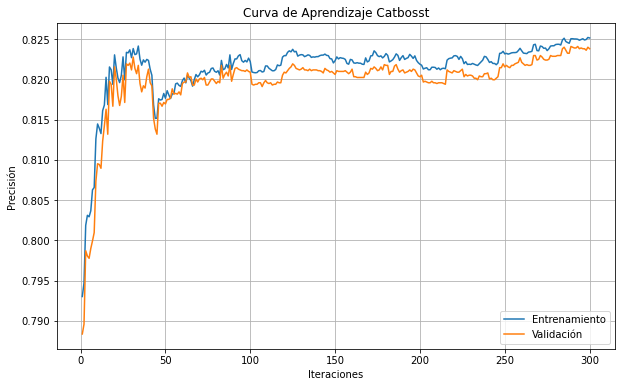

In [255]:
# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(range(1, params['iterations'] + 1), train_metrics, label='Entrenamiento')
plt.plot(range(1, params['iterations'] + 1), val_metrics, label='Validación')
plt.xlabel('Iteraciones')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje Catbosst')
plt.legend()
plt.grid(True)
plt.show()

In [257]:
# Realizar predicciones y evaluar el modelo
y_pred = model.predict(test_data_mod)

In [258]:
print(classification_report(y_test_mod, y_pred))
print(confusion_matrix(y_test_mod, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      4291
           1       0.83      0.89      0.86      6340

    accuracy                           0.82     10631
   macro avg       0.82      0.81      0.81     10631
weighted avg       0.82      0.82      0.82     10631

[[3100 1191]
 [ 682 5658]]


In [259]:
a_CatBoost = accuracy_score(y_test, y_pred)
print('Accuracy del modelo:')
print(a_CatBoost)

Accuracy del modelo:
0.8238171385570502


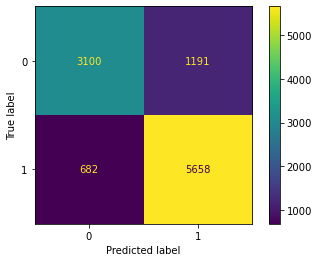

In [261]:
predictions_CatBoost = model.predict(X_test)
cm_CatBoost = confusion_matrix(y_test, predictions_CatBoost, labels=model.classes_)
disp_CatBoost = ConfusionMatrixDisplay(confusion_matrix=cm_CatBoost,display_labels=model.classes_)
disp_CatBoost.plot()

plt.show()

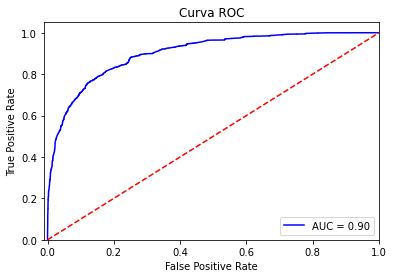

In [263]:
Y_predic_prob=model.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = roc_curve(y_test, Y_predic_prob, pos_label=0)
AUC_CatBoost=auc(fpr, tpr)
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_CatBoost)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [264]:
from sklearn.metrics import f1_score

# Calcula el F1 score
f1_CatBoost = f1_score(y_test, y_pred)

# Imprime el F1 score
print('F1 Score del modelo:')
print(f1_CatBoost)

F1 Score del modelo:
0.8579877170369247


<a id="section6"></a>
## <font color="#004D7F"><h3>**6. Prediccion sobre base de vigentes actual y comparativo**</font></h3>
***


In [271]:
X_prueba=pd.read_excel("X_prueba.xlsx")


In [313]:
rentabilidad=pd.read_excel("rentabilidad_pru.xlsx")

In [272]:
# Definir una función para modificar las categorías
def modificar_categorias(categoria):
    if categoria in ['F1', 'NF1']:
        return 'F'
    else:
        return 'I'

# Aplicar la función a la columna 'NOMBRE_PRODUCTO'
X_prueba['NOMBRE_PRODUCTO'] = X_prueba['NOMBRE_PRODUCTO'].apply(lambda x: modificar_categorias(x))

# Verificar los cambios
print("Categorías modificadas de NOMBRE_PRODUCTO:")
print(X_prueba['NOMBRE_PRODUCTO'].unique())

Categorías modificadas de NOMBRE_PRODUCTO:
['F' 'I']


In [273]:
# Eliminar la variable 'COMISION'
X_prueba = X_prueba.drop('COMISION', axis=1)

In [275]:
# Eliminar la variable 'MARCA_SINIESTROS'
X_prueba = X_prueba.drop('MARCA_SINIESTROS', axis=1)

In [276]:
# Definir las categorías que se mantendrán y las que se cambiarán
categorias_mantener = ['10% Minimo 1 SMMLV', '950000', '1 SMMLV']
categorias_cambiar = set(X_prueba['DEDUCIBLE FINAL']) - set(categorias_mantener)

# Modificar la columna 'DEDUCIBLE FINAL'
X_prueba['DEDUCIBLE FINAL'] = X_prueba['DEDUCIBLE FINAL'].map(
    lambda x: x if x in categorias_mantener else 'OTRAS'
)

# Verificar los cambios
print("Categorías después de la modificación:")
print(X_prueba['DEDUCIBLE FINAL'].unique())

Categorías después de la modificación:
['10% Minimo 1 SMMLV' '950000' '1 SMMLV' 'OTRAS']


In [277]:
# Definir las categorías que se mantendrán y las que se cambiarán
categorias_mantener = ['Agencia', 'Franquicias']
categorias_cambiar = set(X_prueba['TIPO_SUCURSAL']) - set(categorias_mantener)

# Modificar la columna 'TIPO_SUCURSALL'
X_prueba['TIPO_SUCURSAL'] = X_prueba['TIPO_SUCURSAL'].map(
    lambda x: x if x in categorias_mantener else 'OTRAS'
)

# Verificar los cambios
print("Categorías después de la modificación:")
print(X_prueba['TIPO_SUCURSAL'].unique())

Categorías después de la modificación:
['Agencia' 'Franquicias' 'OTRAS']


In [278]:
# Eliminar la variable 'MARCA_FINAL'
X_prueba = X_prueba.drop('MARCA_FINAL', axis=1)

In [279]:
pool_prueba = catboost.Pool(data=X_prueba, cat_features=cat_features)

In [379]:
# Realizar predicciones
predicciones = model.predict(pool_prueba)

In [380]:
predicciones_df=pd.DataFrame(predicciones)

In [381]:
# Tomar la columna '1' de predicciones
columna_prediccion = predicciones_df  # Ajusta el nombre de la columna si es diferente
# Concatenar con el DataFrame X_prueba
resultado_final = pd.concat([X_prueba, columna_prediccion], axis=1)

# Renombrar la columna '1' a 'Probabilidad Renovacion'
resultado_final = resultado_final.rename(columns={0: 'Estado_Renovacion'})
resultado_final

NOMBRE_PRODUCTO DESCRIPCION_FORMA_PAGO  VALOR_ASEGURADO  MODELO  \
0                   F     Mensual Anticipado         16700000    2008   
1                   F     Mensual Anticipado         45900000    2008   
2                   F     Mensual Anticipado         11700000    2009   
3                   I                Contado         44900000    2020   
4                   F     Mensual Anticipado         24700000    2007   
...               ...                    ...              ...     ...   
60437               F     Mensual Anticipado         26600000    2015   
60438               I                Contado         27700000    2014   
60439               F     Mensual Anticipado         27700000    2014   
60440               F     Mensual Anticipado         43700000    2014   
60441               I           Financiación         29700000    2014   

       CANTIDAD_RENOVACION GENERO FINAL  EDAD FINAL     DEDUCIBLE FINAL  \
0                        3     Femenino          69  10% Minimo 1 SMMLV   
1                        0     Femenino          49              950000   
2                        0    Masculino          47             1 SMMLV   
3                        1    Masculino          46              950000   
4                        1    Masculino          48             1 SMMLV   
...                    ...          ...         ...                 ...   
60437                    0     Femenino          53             1 SMMLV   
60438                    2     Femenino          48              950000   
60439                    0    Masculino          57               OTRAS   
60440                    0    Masculino          67              950000   
60441                    1    Masculino          33              950000   

            BONUS MALUS FINAL  SCORE    Prima  Incremento TIPO_SUCURSAL  \
0           -1- CON SINIESTRO    236  1322669   -0.026593       Agencia   
1        4- CUATRO AÑOS O MÁS    226  1590414    0.121808       Agencia   
2        4- CUATRO AÑOS O MÁS    218  1130632   -0.036781       Agencia   
3       2- DOS AÑOS CONTINUOS    210  1085006    0.082899       Agencia   
4      3- TRES AÑOS CONTINUOS    219  1545161    0.116470       Agencia   
...                       ...    ...      ...         ...           ...   
60437       -1- CON SINIESTRO    211  1304264   -0.038541       Agencia   
60438  3- TRES AÑOS CONTINUOS    205   883013    0.099222   Franquicias   
60439     0- SIN EXPERIENCIA     207  1455680    0.035073       Agencia   
60440    4- CUATRO AÑOS O MÁS    238   932384    0.101911       Agencia   
60441    4- CUATRO AÑOS O MÁS    212  1058660    0.274167   Franquicias   

      DEPARTAMENTO_FINAL  Estado_Renovacion  
0              ANTIOQUIA                  1  
1              ANTIOQUIA                  1  
2              ANTIOQUIA                  1  
3                 BOYACA                  0  
4              ANTIOQUIA                  0  
...                  ...                ...  
60437        BOGOTA D.C.                  1  
60438        BOGOTA D.C.                  1  
60439        BOGOTA D.C.                  0  
60440       CUNDINAMARCA                  0  
60441        BOGOTA D.C.                  1  

[60442 rows x 15 columns]

In [382]:
probabilidades_predichas = model.predict_proba(pool_prueba)


In [383]:
prob_df=pd.DataFrame(probabilidades_predichas)
prob_df.head()

0         1
0  0.373505  0.626495
1  0.497702  0.502298
2  0.313597  0.686403
3  0.528311  0.471689
4  0.569316  0.430684

In [384]:
# Tomar la columna '1' de predicciones
columna_pr = prob_df[1]

# Concatenar con el DataFrame X_prueba
resultado_final = pd.concat([resultado_final, columna_pr], axis=1)

# Renombrar la columna '1' a 'Probabilidad Renovacion'
resultado_final = resultado_final.rename(columns={1: 'Probabilidad_Renovacion'})

# Mostrar el DataFrame resultado_final
resultado_final


NOMBRE_PRODUCTO DESCRIPCION_FORMA_PAGO  VALOR_ASEGURADO  MODELO  \
0                   F     Mensual Anticipado         16700000    2008   
1                   F     Mensual Anticipado         45900000    2008   
2                   F     Mensual Anticipado         11700000    2009   
3                   I                Contado         44900000    2020   
4                   F     Mensual Anticipado         24700000    2007   
...               ...                    ...              ...     ...   
60437               F     Mensual Anticipado         26600000    2015   
60438               I                Contado         27700000    2014   
60439               F     Mensual Anticipado         27700000    2014   
60440               F     Mensual Anticipado         43700000    2014   
60441               I           Financiación         29700000    2014   

       CANTIDAD_RENOVACION GENERO FINAL  EDAD FINAL     DEDUCIBLE FINAL  \
0                        3     Femenino          69  10% Minimo 1 SMMLV   
1                        0     Femenino          49              950000   
2                        0    Masculino          47             1 SMMLV   
3                        1    Masculino          46              950000   
4                        1    Masculino          48             1 SMMLV   
...                    ...          ...         ...                 ...   
60437                    0     Femenino          53             1 SMMLV   
60438                    2     Femenino          48              950000   
60439                    0    Masculino          57               OTRAS   
60440                    0    Masculino          67              950000   
60441                    1    Masculino          33              950000   

            BONUS MALUS FINAL  SCORE    Prima  Incremento TIPO_SUCURSAL  \
0           -1- CON SINIESTRO    236  1322669   -0.026593       Agencia   
1        4- CUATRO AÑOS O MÁS    226  1590414    0.121808       Agencia   
2        4- CUATRO AÑOS O MÁS    218  1130632   -0.036781       Agencia   
3       2- DOS AÑOS CONTINUOS    210  1085006    0.082899       Agencia   
4      3- TRES AÑOS CONTINUOS    219  1545161    0.116470       Agencia   
...                       ...    ...      ...         ...           ...   
60437       -1- CON SINIESTRO    211  1304264   -0.038541       Agencia   
60438  3- TRES AÑOS CONTINUOS    205   883013    0.099222   Franquicias   
60439     0- SIN EXPERIENCIA     207  1455680    0.035073       Agencia   
60440    4- CUATRO AÑOS O MÁS    238   932384    0.101911       Agencia   
60441    4- CUATRO AÑOS O MÁS    212  1058660    0.274167   Franquicias   

      DEPARTAMENTO_FINAL  Estado_Renovacion  Probabilidad_Renovacion  
0              ANTIOQUIA                  1                 0.626495  
1              ANTIOQUIA                  1                 0.502298  
2              ANTIOQUIA                  1                 0.686403  
3                 BOYACA                  0                 0.471689  
4              ANTIOQUIA                  0                 0.430684  
...                  ...                ...                      ...  
60437        BOGOTA D.C.                  1                 0.698801  
60438        BOGOTA D.C.                  1                 0.578628  
60439        BOGOTA D.C.                  0                 0.479347  
60440       CUNDINAMARCA                  0                 0.398825  
60441        BOGOTA D.C.                  1                 0.605962  

[60442 rows x 16 columns]

In [385]:
# Definir las categorías que se mantendrán y las que se cambiarán
categorias_mantener = [0, 1]
categorias_cambiar = set(rentabilidad['MARCA RENTABILIDAD']) - set(categorias_mantener)

# Modificar la columna 'DEDUCIBLE FINAL'
rentabilidad['MARCA RENTABILIDAD'] = rentabilidad['MARCA RENTABILIDAD'].map(
    lambda x: x if x in categorias_mantener else 0
)

# Verificar los cambios
print("Categorías después de la modificación:")
print(rentabilidad['MARCA RENTABILIDAD'].unique())

Categorías después de la modificación:
[0 1]


In [386]:
prediccion_vigentes=pd.concat([resultado_final, rentabilidad], axis=1)

In [387]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(prediccion_vigentes['Estado_Renovacion'], prediccion_vigentes['MARCA RENTABILIDAD'])
contingency_table

MARCA RENTABILIDAD      0      1
Estado_Renovacion               
0                    6810   2682
1                   32471  18479

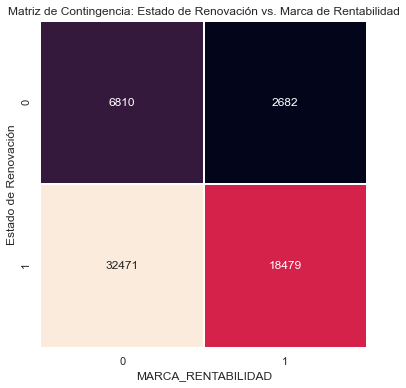

In [388]:
# Configurar el estilo de seaborn para mejorar la apariencia
sns.set(style="whitegrid")

# Graficar un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cbar=False, fmt="d", linewidths=.5, square=True)

# Configuraciones adicionales para mejorar la visualización
plt.title('Matriz de Contingencia: Estado de Renovación vs. Marca de Rentabilidad')
plt.xlabel('MARCA_RENTABILIDAD')
plt.ylabel('Estado de Renovación')

# Mostrar el gráfico
plt.show()

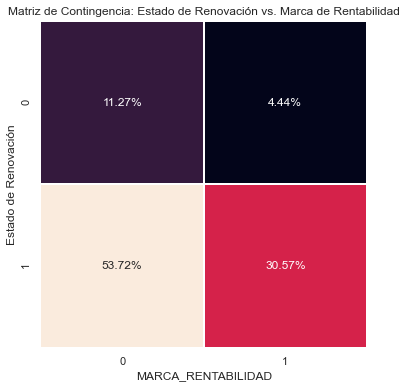

In [409]:
# Configurar el estilo de seaborn para mejorar la apariencia
sns.set(style="whitegrid")

# Calcular la proporción del total en la tabla de contingencia
contingency_table_proportion = contingency_table / contingency_table.sum().sum()

# Graficar un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_proportion, annot=True, fmt=".2%", cbar=False, linewidths=.5, square=True)

# Configuraciones adicionales para mejorar la visualización
plt.title('Matriz de Contingencia: Estado de Renovación vs. Marca de Rentabilidad')
plt.xlabel('MARCA_RENTABILIDAD')
plt.ylabel('Estado de Renovación')

# Mostrar el gráfico
plt.show()

<a id="section7"></a>
## <font color="#004D7F"><h3>**7.Elección de variables para herramienta**</font></h3>
***

In [290]:
importancia = permutation_importance(
                estimator    = model,
                X            = X_train_mod,
                y            = y_train_mod,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

importances_mean  importances_std                 feature
11          0.125215         0.001761              Incremento
4           0.088664         0.000758     CANTIDAD_RENOVACION
1           0.056140         0.000760  DESCRIPCION_FORMA_PAGO
13          0.055451         0.001353      DEPARTAMENTO_FINAL
0           0.031626         0.001115         NOMBRE_PRODUCTO
8           0.014876         0.000415       BONUS MALUS FINAL
5           0.008904         0.000374            GENERO FINAL
10          0.002609         0.000188                   Prima
7           0.001870         0.000404         DEDUCIBLE FINAL
3           0.000000         0.000000                  MODELO
6           0.000000         0.000000              EDAD FINAL
9           0.000000         0.000000                   SCORE
12          0.000000         0.000000           TIPO_SUCURSAL
2          -0.000037         0.000034         VALOR_ASEGURADO

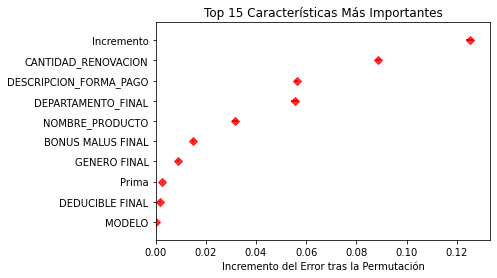

In [291]:
# Selecciona las 15 características más importantes
top_10_features = df_importancia.nlargest(10, 'importances_mean')

# Crea un gráfico solo con las 15 características más importantes
fig, ax = plt.subplots(figsize=(6, 4))
top_10_features = top_10_features.sort_values('importances_mean', ascending=True)
ax.barh(
    top_10_features['feature'],
    top_10_features['importances_mean'],
    xerr=top_10_features['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    top_10_features['importances_mean'],
    top_10_features['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Top 15 Características Más Importantes')
ax.set_xlabel('Incremento del Error tras la Permutación')
plt.show()

In [293]:
# Obtener las probabilidades de las predicciones en los datos de entrenamiento
probabilidades_predichas = model.predict_proba(X_train_mod)

In [297]:
# Crear un DataFrame con las probabilidades y las características originales
probabilidades_train = pd.DataFrame(probabilidades_predichas, columns=['Probabilidad_Clase_0', 'Probabilidad_Clase_1'])
probabilidades_train = pd.concat([X_train_mod.reset_index(drop=True), resultados], axis=1)
probabilidades_train

NOMBRE_PRODUCTO DESCRIPCION_FORMA_PAGO  VALOR_ASEGURADO  MODELO  \
0                   F     Mensual Anticipado         20400000    2013   
1                   I                Contado         49600000    2017   
2                   F     Mensual Anticipado         17100000    2010   
3                   I                Contado         20800000    2012   
4                   I                Contado         23300000    2012   
...               ...                    ...              ...     ...   
31886               F     Mensual Anticipado         13200000    2011   
31887               I                Contado         33900000    2020   
31888               F     Mensual Anticipado         23500000    2014   
31889               I                Contado         32000000    2017   
31890               I                Contado         37900000    2020   

       CANTIDAD_RENOVACION GENERO FINAL  EDAD FINAL     DEDUCIBLE FINAL  \
0                        4     Femenino          67             1 SMMLV   
1                        4     Femenino          56  10% Minimo 1 SMMLV   
2                        2    Masculino          33             1 SMMLV   
3                        2    Masculino          43  10% Minimo 1 SMMLV   
4                        0    Masculino          48  10% Minimo 1 SMMLV   
...                    ...          ...         ...                 ...   
31886                    4     Femenino          42             1 SMMLV   
31887                    1    Masculino          55  10% Minimo 1 SMMLV   
31888                    3    Masculino          50             1 SMMLV   
31889                    4    Masculino          57              950000   
31890                    1    Masculino          59              950000   

          BONUS MALUS FINAL SCORE  ...  EDAD FINAL     DEDUCIBLE FINAL  \
0         -1- CON SINIESTRO   205  ...          67             1 SMMLV   
1      4- CUATRO AÑOS O MÁS   188  ...          56  10% Minimo 1 SMMLV   
2       0- SIN EXPERIENCIA    219  ...          33             1 SMMLV   
3         -1- CON SINIESTRO   192  ...          43  10% Minimo 1 SMMLV   
4      4- CUATRO AÑOS O MÁS   220  ...          48  10% Minimo 1 SMMLV   
...                     ...   ...  ...         ...                 ...   
31886     -1- CON SINIESTRO   224  ...          42             1 SMMLV   
31887  4- CUATRO AÑOS O MÁS   222  ...          55  10% Minimo 1 SMMLV   
31888     -1- CON SINIESTRO   208  ...          50             1 SMMLV   
31889  4- CUATRO AÑOS O MÁS   228  ...          57              950000   
31890     -1- CON SINIESTRO   224  ...          59              950000   

          BONUS MALUS FINAL SCORE    Prima Incremento  TIPO_SUCURSAL  \
0         -1- CON SINIESTRO   205  1035267     0.0690        Agencia   
1      4- CUATRO AÑOS O MÁS   188  1195959     0.0000    Franquicias   
2       0- SIN EXPERIENCIA    219  1525228     0.0350        Agencia   
3         -1- CON SINIESTRO   192  1000695     0.0700        Agencia   
4      4- CUATRO AÑOS O MÁS   220  1034464     0.0700        Agencia   
...                     ...   ...      ...        ...            ...   
31886     -1- CON SINIESTRO   224  1104709     0.0000        Agencia   
31887  4- CUATRO AÑOS O MÁS   222   954664     0.0486    Franquicias   
31888     -1- CON SINIESTRO   208  1642637     0.0880        Agencia   
31889  4- CUATRO AÑOS O MÁS   228  1015545    -0.0496        Agencia   
31890     -1- CON SINIESTRO   224  1056037     0.0700        Agencia   

       DEPARTAMENTO_FINAL  Probabilidad_Clase_0 Probabilidad_Clase_1  
0             BOGOTA D.C.              0.397176             0.602824  
1               ATLANTICO              0.401035             0.598965  
2               ANTIOQUIA              0.336950             0.663050  
3               ATLANTICO              0.515256             0.484744  
4               ANTIOQUIA              0.584921             0.415079  
...                   ...                   ... 

In [298]:
# Exportar los resultados a un archivo Excel
probabilidades_train.to_excel('probabilidades_train.xlsx', index=False)

<a id="section8"></a>
## <font color="#004D7F"><h3>**8.Descriptivo Resultados Finales**</font></h3>
***

In [283]:
base_entrenamiento_mod=pd.concat([X_mod, y_mod], axis=1)
base_entrenamiento_mod.columns

Index(['NOMBRE_PRODUCTO', 'DESCRIPCION_FORMA_PAGO', 'VALOR_ASEGURADO',
       'MODELO', 'CANTIDAD_RENOVACION', 'GENERO FINAL', 'EDAD FINAL',
       'DEDUCIBLE FINAL', 'BONUS MALUS FINAL', 'SCORE', 'Prima', 'Incremento',
       'TIPO_SUCURSAL', 'DEPARTAMENTO_FINAL', 'Estado_Renovacion'],
      dtype='object')

In [289]:
y_test_mod.mean()

0.5963691092089173

In [284]:
print('El porcentaje de renovación de la base de entrenamiento es',base_entrenamiento_mod['Estado_Renovacion'].mean())
print('El porcentaje de renovación de la base de vigentes es',resultado_final['Estado_Renovacion'].mean())

El porcentaje de renovación de la base de entrenamiento es 0.592987159587978
El porcentaje de renovación de la base de vigentes es 0.8429568842857615


#### NOMBRE_PRODUCTO

In [320]:
# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('NOMBRE_PRODUCTO')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('NOMBRE_PRODUCTO')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['NOMBRE_PRODUCTO'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['NOMBRE_PRODUCTO'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base_mod = tabla_contingencia_base_mod.rename(columns={"Cantidad": "Cantidad_Base_Mod", "Porcentaje": "Porcentaje_Base_Mod", "Proporcion_Renovacion": "Proporcion_Renovacion_Base_Mod"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base_mod, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base_Mod', 'Proporcion_Renovacion_Base_Mod', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0            Porcentaje_Base_Mod  Proporcion_Renovacion_Base_Mod  \
NOMBRE_PRODUCTO                                                        
F                          41.594939                        0.661729   
I                          58.405061                        0.544031   

col_0            Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
NOMBRE_PRODUCTO                                                         
F                           39.631382                         0.808466  
I                           60.368618                         0.865600

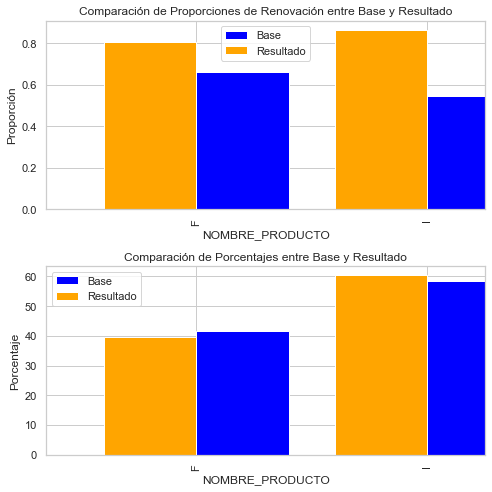

In [321]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base_Mod'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('NOMBRE_PRODUCTO')
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base_Mod'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('NOMBRE_PRODUCTO')
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()


In [325]:
# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('NOMBRE_PRODUCTO')['Estado_Renovacion'].mean()


# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['NOMBRE_PRODUCTO'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_base_mod

col_0            Cantidad  Porcentaje  Proporcion_Renovacion
NOMBRE_PRODUCTO                                             
F                   17687   41.594939               0.661729
I                   24835   58.405061               0.544031

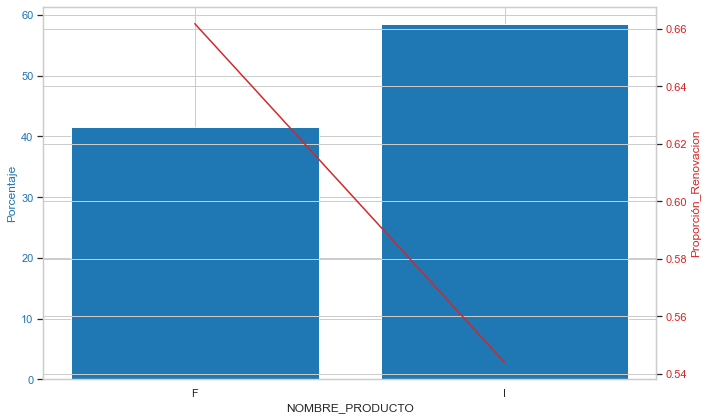

In [328]:
# Crear subgráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra para el porcentaje
color = 'tab:blue'
ax1.set_xlabel('NOMBRE_PRODUCTO')
ax1.set_ylabel('Porcentaje', color=color)
ax1.bar(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Porcentaje'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Línea para la proporción
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proporción_Renovacion', color=color)
ax2.plot(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Proporcion_Renovacion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar diseño y mostrar
fig.tight_layout()
plt.show()

#### DESCRIPCION_FORMA_PAGO

In [329]:
# Calcular la proporción de '1' por cada categoría de 'DESCRIPCION_FORMA_PAGO' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base = base_entrenamiento_mod.groupby('DESCRIPCION_FORMA_PAGO')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'DESCRIPCION_FORMA_PAGO' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('DESCRIPCION_FORMA_PAGO')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base = pd.crosstab(index=base_entrenamiento_mod['DESCRIPCION_FORMA_PAGO'], columns="Cantidad")
tabla_contingencia_base['Porcentaje'] = (tabla_contingencia_base['Cantidad'] / tabla_contingencia_base['Cantidad'].sum()) * 100
tabla_contingencia_base['Proporcion_Renovacion'] = proporcion_renovacion_base

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['DESCRIPCION_FORMA_PAGO'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base = tabla_contingencia_base.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0                   Porcentaje_Base  Proporcion_Renovacion_Base  \
DESCRIPCION_FORMA_PAGO                                                
Contado                       45.084897                    0.482187   
Financiación                  14.312591                    0.701117   
Mensual Anticipado            40.602512                    0.677903   

col_0                   Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
DESCRIPCION_FORMA_PAGO                                                         
Contado                            41.757387                         0.844289  
Financiación                       18.611231                         0.913415  
Mensual Anticipado                 39.631382                         0.808466

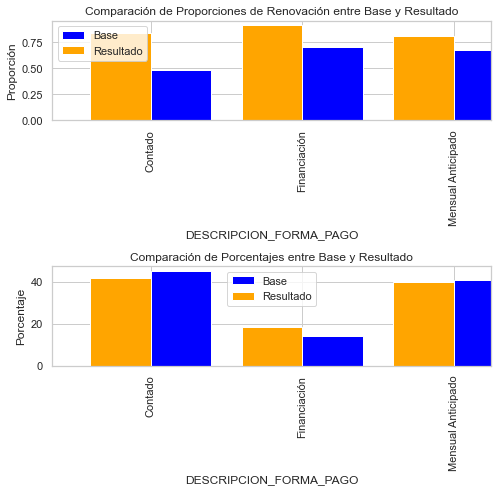

In [330]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('DESCRIPCION_FORMA_PAGO')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('DESCRIPCION_FORMA_PAGO')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()

In [332]:
# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('DESCRIPCION_FORMA_PAGO')['Estado_Renovacion'].mean()


# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['DESCRIPCION_FORMA_PAGO'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_base_mod

col_0                   Cantidad  Porcentaje  Proporcion_Renovacion
DESCRIPCION_FORMA_PAGO                                             
Contado                    19171   45.084897               0.482187
Financiación                6086   14.312591               0.701117
Mensual Anticipado         17265   40.602512               0.677903

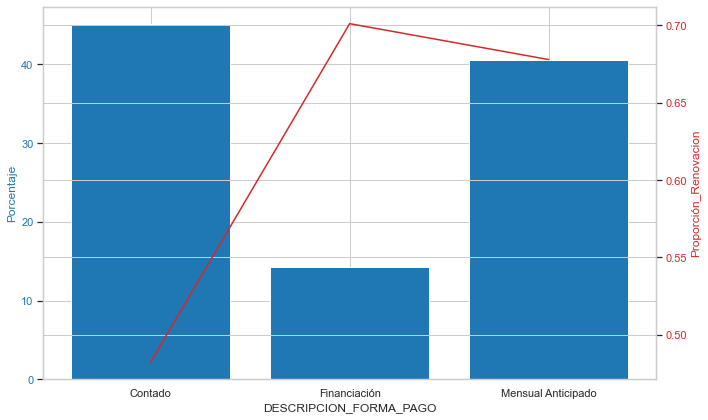

In [333]:
# Crear subgráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra para el porcentaje
color = 'tab:blue'
ax1.set_xlabel('DESCRIPCION_FORMA_PAGO')
ax1.set_ylabel('Porcentaje', color=color)
ax1.bar(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Porcentaje'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Línea para la proporción
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proporción_Renovacion', color=color)
ax2.plot(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Proporcion_Renovacion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar diseño y mostrar
fig.tight_layout()
plt.show()

#### GENERO FINAL

In [336]:
# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('GENERO FINAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('GENERO FINAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['GENERO FINAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['GENERO FINAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base_mod = tabla_contingencia_base_mod.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base_mod, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0         Porcentaje_Base  Proporcion_Renovacion_Base  \
GENERO FINAL                                                
Femenino            51.460420                    0.619459   
Masculino           46.510042                    0.589574   
SIN GENERO           2.029538                    0.000000   

col_0         Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
GENERO FINAL                                                         
Femenino                 49.612852                         0.843499  
Masculino                50.387148                         0.842423  
SIN GENERO                     NaN                              NaN

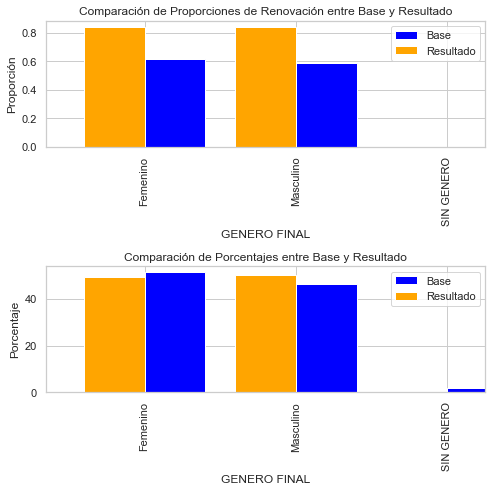

In [337]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('GENERO FINAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('GENERO FINAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()

In [340]:
# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('GENERO FINAL')['Estado_Renovacion'].mean()


# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['GENERO FINAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_base_mod

col_0         Cantidad  Porcentaje  Proporcion_Renovacion
GENERO FINAL                                             
Femenino         21882   51.460420               0.619459
Masculino        19777   46.510042               0.589574
SIN GENERO         863    2.029538               0.000000

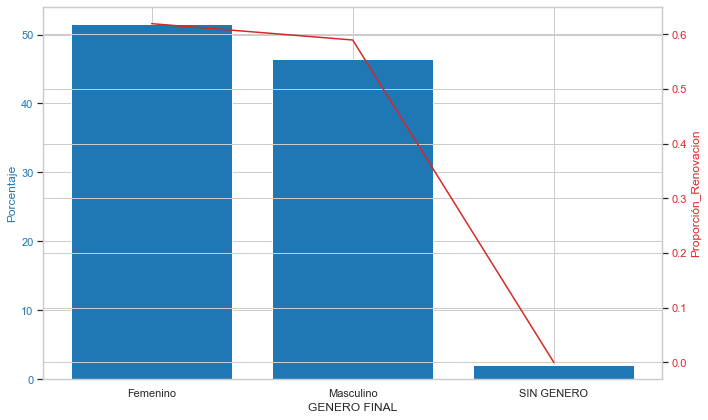

In [341]:
# Crear subgráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra para el porcentaje
color = 'tab:blue'
ax1.set_xlabel('GENERO FINAL')
ax1.set_ylabel('Porcentaje', color=color)
ax1.bar(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Porcentaje'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Línea para la proporción
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proporción_Renovacion', color=color)
ax2.plot(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Proporcion_Renovacion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar diseño y mostrar
fig.tight_layout()
plt.show()

#### DEDUCIBLE FINAL

In [343]:
# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('DEDUCIBLE FINAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('DEDUCIBLE FINAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['DEDUCIBLE FINAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['DEDUCIBLE FINAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base_mod = tabla_contingencia_base_mod.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base_mod, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0               Porcentaje_Base  Proporcion_Renovacion_Base  \
DEDUCIBLE FINAL                                                   
1 SMMLV                   37.345374                    0.654471   
10% Minimo 1 SMMLV        24.425004                    0.566147   
950000                    37.813367                    0.550594   
OTRAS                      0.416255                    0.502825   

col_0               Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
DEDUCIBLE FINAL                                                            
1 SMMLV                        22.586943                         0.798857  
10% Minimo 1 SMMLV             12.779193                         0.953651  
950000                         63.295391                         0.840866  
OTRAS                           1.338473                         0.629172

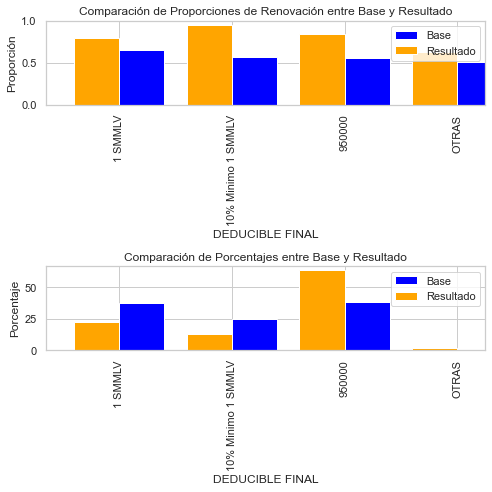

In [344]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('DEDUCIBLE FINAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('DEDUCIBLE FINAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()

In [345]:
# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('DEDUCIBLE FINAL')['Estado_Renovacion'].mean()


# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['DEDUCIBLE FINAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_base_mod

col_0               Cantidad  Porcentaje  Proporcion_Renovacion
DEDUCIBLE FINAL                                                
1 SMMLV                15880   37.345374               0.654471
10% Minimo 1 SMMLV     10386   24.425004               0.566147
950000                 16079   37.813367               0.550594
OTRAS                    177    0.416255               0.502825

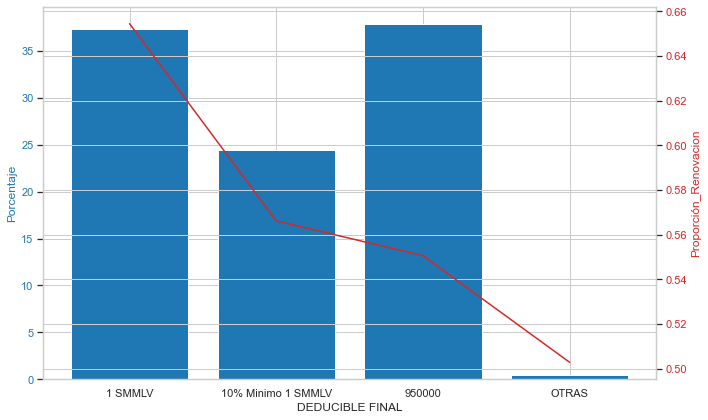

In [346]:
# Crear subgráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra para el porcentaje
color = 'tab:blue'
ax1.set_xlabel('DEDUCIBLE FINAL')
ax1.set_ylabel('Porcentaje', color=color)
ax1.bar(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Porcentaje'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Línea para la proporción
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proporción_Renovacion', color=color)
ax2.plot(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Proporcion_Renovacion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar diseño y mostrar
fig.tight_layout()
plt.show()

#### BONUS MALUS FINAL

In [347]:
# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('BONUS MALUS FINAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('BONUS MALUS FINAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['BONUS MALUS FINAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['BONUS MALUS FINAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base_mod = tabla_contingencia_base_mod.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base_mod, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0                   Porcentaje_Base  Proporcion_Renovacion_Base  \
BONUS MALUS FINAL                                                     
-1- CON SINIESTRO             37.549974                    0.620780   
0- SIN EXPERIENCIA            11.887964                    0.417606   
1- UN AÑO CONTINUO            13.903391                    0.595399   
2- DOS AÑOS CONTINUOS         11.086026                    0.573186   
3- TRES AÑOS CONTINUOS         8.633178                    0.625987   
4- CUATRO AÑOS O MÁS          16.939467                    0.648619   

col_0                   Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
BONUS MALUS FINAL                                                              
-1- CON SINIESTRO                  23.867509                         0.922085  
0- SIN EXPERIENCIA                 12.385427                         0.441491  
1- UN AÑO CONTINUO                 12.216671                         0.882719  
2- DOS AÑOS CONTINUOS              10.621753                         0.869626  
3- TRES AÑOS CONTINUOS              9.625757                         0.910107  
4- CUATRO AÑOS O MÁS               31.282883                         0.896287

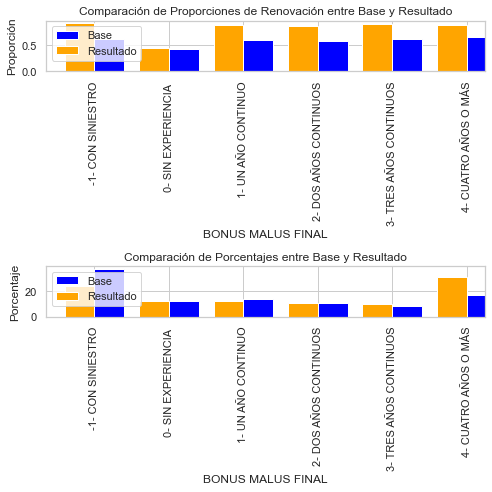

In [348]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('BONUS MALUS FINAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('BONUS MALUS FINAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()

In [349]:
# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('BONUS MALUS FINAL')['Estado_Renovacion'].mean()


# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['BONUS MALUS FINAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_base_mod

col_0                   Cantidad  Porcentaje  Proporcion_Renovacion
BONUS MALUS FINAL                                                  
-1- CON SINIESTRO          15967   37.549974               0.620780
0- SIN EXPERIENCIA          5055   11.887964               0.417606
1- UN AÑO CONTINUO          5912   13.903391               0.595399
2- DOS AÑOS CONTINUOS       4714   11.086026               0.573186
3- TRES AÑOS CONTINUOS      3671    8.633178               0.625987
4- CUATRO AÑOS O MÁS        7203   16.939467               0.648619

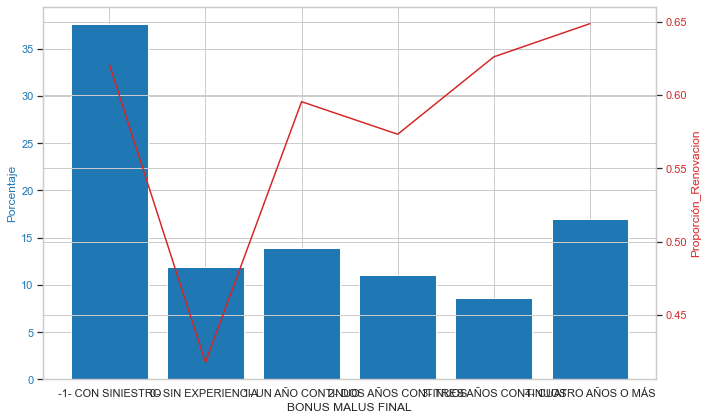

In [350]:
# Crear subgráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra para el porcentaje
color = 'tab:blue'
ax1.set_xlabel('BONUS MALUS FINAL')
ax1.set_ylabel('Porcentaje', color=color)
ax1.bar(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Porcentaje'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Línea para la proporción
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proporción_Renovacion', color=color)
ax2.plot(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Proporcion_Renovacion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar diseño y mostrar
fig.tight_layout()
plt.show()

#### TIPO_SUCURSAL

In [351]:
# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('TIPO_SUCURSAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('TIPO_SUCURSAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['TIPO_SUCURSAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['TIPO_SUCURSAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base_mod = tabla_contingencia_base_mod.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base_mod, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0          Porcentaje_Base  Proporcion_Renovacion_Base  \
TIPO_SUCURSAL                                                
Agencia              79.062603                    0.609120   
Franquicias          15.798881                    0.560881   
OTRAS                 5.138517                    0.443478   

col_0          Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
TIPO_SUCURSAL                                                         
Agencia                   79.752490                         0.839391  
Franquicias               15.720856                         0.880130  
OTRAS                      4.526654                         0.776681

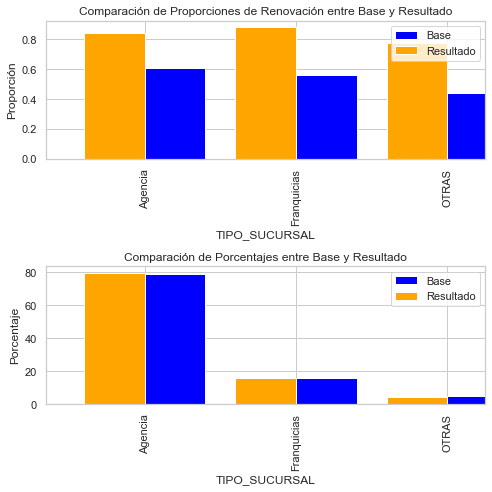

In [352]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('TIPO_SUCURSAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('TIPO_SUCURSAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()

In [353]:
# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('TIPO_SUCURSAL')['Estado_Renovacion'].mean()


# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['TIPO_SUCURSAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_base_mod

col_0          Cantidad  Porcentaje  Proporcion_Renovacion
TIPO_SUCURSAL                                             
Agencia           33619   79.062603               0.609120
Franquicias        6718   15.798881               0.560881
OTRAS              2185    5.138517               0.443478

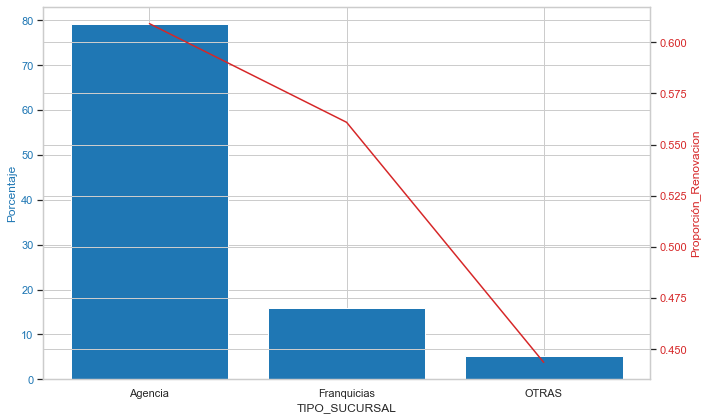

In [354]:
# Crear subgráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra para el porcentaje
color = 'tab:blue'
ax1.set_xlabel('TIPO_SUCURSAL')
ax1.set_ylabel('Porcentaje', color=color)
ax1.bar(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Porcentaje'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Línea para la proporción
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proporción_Renovacion', color=color)
ax2.plot(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Proporcion_Renovacion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar diseño y mostrar
fig.tight_layout()
plt.show()

#### DEPARTAMENTO_FINAL

In [355]:
# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('DEPARTAMENTO_FINAL')['Estado_Renovacion'].mean()

# Calcular la proporción de '1' por cada categoría de 'GENERO FINAL' en el dataframe resultado_final
proporcion_renovacion_resultado = resultado_final.groupby('DEPARTAMENTO_FINAL')['Estado_Renovacion'].mean()

# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['DEPARTAMENTO_FINAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_resultado = pd.crosstab(index=resultado_final['DEPARTAMENTO_FINAL'], columns="Cantidad")
tabla_contingencia_resultado['Porcentaje'] = (tabla_contingencia_resultado['Cantidad'] / tabla_contingencia_resultado['Cantidad'].sum()) * 100
tabla_contingencia_resultado['Proporcion_Renovacion'] = proporcion_renovacion_resultado

# Renombrar columnas para distinguir entre los dos dataframes
tabla_contingencia_base_mod = tabla_contingencia_base_mod.rename(columns={"Cantidad": "Cantidad_Base", "Porcentaje": "Porcentaje_Base", "Proporcion_Renovacion": "Proporcion_Renovacion_Base"})
tabla_contingencia_resultado = tabla_contingencia_resultado.rename(columns={"Cantidad": "Cantidad_Resultado", "Porcentaje": "Porcentaje_Resultado", "Proporcion_Renovacion": "Proporcion_Renovacion_Resultado"})

# Combinar ambas tablas en una sola
tabla_contingencia_combinada = pd.concat([tabla_contingencia_base_mod, tabla_contingencia_resultado], axis=1)

# Mostrar la tabla de contingencia combinada
tabla_contingencia_combinada[['Porcentaje_Base', 'Proporcion_Renovacion_Base', 'Porcentaje_Resultado', 'Proporcion_Renovacion_Resultado']]


col_0               Porcentaje_Base  Proporcion_Renovacion_Base  \
DEPARTAMENTO_FINAL                                                
ANTIOQUIA                 16.309205                    0.605624   
ATLANTICO                  5.517144                    0.647485   
BOGOTA D.C.               24.081652                    0.749219   
BOYACA                     1.451014                    0.560778   
COSTA                      4.228399                    0.649611   
CUNDINAMARCA               9.961902                    0.148253   
EJE                        6.563661                    0.533501   
GRAN_TOLIMA                3.515827                    0.573913   
META                       2.457551                    0.602871   
NORTE SANTANDER            1.768496                    0.591755   
OTROS                      1.093552                    0.533333   
SANTANDER                  5.686468                    0.555004   
SUROCCIDENTE               1.568600                    0.581709   
VALLE                     15.796529                    0.637487   

col_0               Porcentaje_Resultado  Proporcion_Renovacion_Resultado  
DEPARTAMENTO_FINAL                                                         
ANTIOQUIA                      11.675656                         0.825563  
ATLANTICO                       4.841005                         0.918660  
BOGOTA D.C.                    33.632242                         0.910419  
BOYACA                          3.795374                         0.699651  
COSTA                           3.457860                         0.879426  
CUNDINAMARCA                    3.499222                         0.184870  
EJE                             5.832037                         0.868936  
GRAN_TOLIMA                     4.986599                         0.807233  
META                            4.824460                         0.762346  
NORTE SANTANDER                 2.082989                         0.861795  
OTROS                           1.490685                         0.798002  
SANTANDER                       5.580557                         0.851764  
SUROCCIDENTE                    1.350055                         0.906863  
VALLE                          12.951259                         0.888988

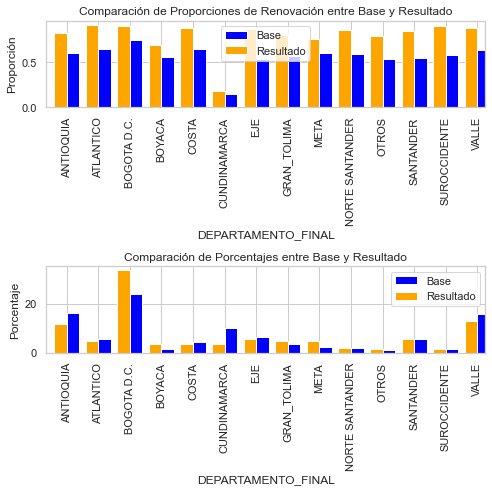

In [356]:
# Graficar Proporciones
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

tabla_contingencia_combinada['Proporcion_Renovacion_Base'].plot(kind='bar', ax=axes[0], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Proporcion_Renovacion_Resultado'].plot(kind='bar', ax=axes[0], color='orange', position=1, width=0.4, label='Resultado')

axes[0].set_title('Comparación de Proporciones de Renovación entre Base y Resultado')
axes[0].set_xlabel('DEPARTAMENTO_FINAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[0].set_ylabel('Proporción')
axes[0].legend()

# Graficar Porcentajes
tabla_contingencia_combinada['Porcentaje_Base'].plot(kind='bar', ax=axes[1], color='blue', position=0, width=0.4, label='Base')
tabla_contingencia_combinada['Porcentaje_Resultado'].plot(kind='bar', ax=axes[1], color='orange', position=1, width=0.4, label='Resultado')

axes[1].set_title('Comparación de Porcentajes entre Base y Resultado')
axes[1].set_xlabel('DEPARTAMENTO_FINAL')  # Cambiado de 'COMISION' a 'DESCRIPCION_FORMA_PAGO'
axes[1].set_ylabel('Porcentaje')
axes[1].legend()

plt.tight_layout()
plt.show()

In [357]:
# Calcular la proporción de '1' por cada categoría de 'NOMBRE_PRODUCTO' en el dataframe base_entrenamiento_mod
proporcion_renovacion_base_mod = base_entrenamiento_mod.groupby('DEPARTAMENTO_FINAL')['Estado_Renovacion'].mean()


# Crear tablas de contingencia para cada dataframe
tabla_contingencia_base_mod = pd.crosstab(index=base_entrenamiento_mod['DEPARTAMENTO_FINAL'], columns="Cantidad")
tabla_contingencia_base_mod['Porcentaje'] = (tabla_contingencia_base_mod['Cantidad'] / tabla_contingencia_base_mod['Cantidad'].sum()) * 100
tabla_contingencia_base_mod['Proporcion_Renovacion'] = proporcion_renovacion_base_mod

tabla_contingencia_base_mod

col_0               Cantidad  Porcentaje  Proporcion_Renovacion
DEPARTAMENTO_FINAL                                             
ANTIOQUIA               6935   16.309205               0.605624
ATLANTICO               2346    5.517144               0.647485
BOGOTA D.C.            10240   24.081652               0.749219
BOYACA                   617    1.451014               0.560778
COSTA                   1798    4.228399               0.649611
CUNDINAMARCA            4236    9.961902               0.148253
EJE                     2791    6.563661               0.533501
GRAN_TOLIMA             1495    3.515827               0.573913
META                    1045    2.457551               0.602871
NORTE SANTANDER          752    1.768496               0.591755
OTROS                    465    1.093552               0.533333
SANTANDER               2418    5.686468               0.555004
SUROCCIDENTE             667    1.568600               0.581709
VALLE                   6717   15.796529               0.637487

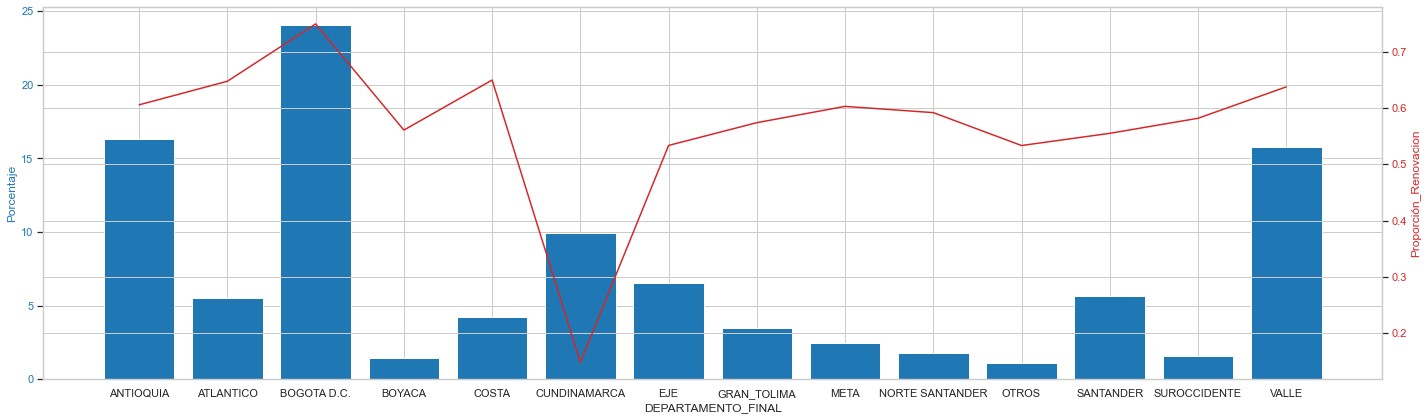

In [360]:
# Crear subgráficos
fig, ax1 = plt.subplots(figsize=(20, 6))

# Barra para el porcentaje
color = 'tab:blue'
ax1.set_xlabel('DEPARTAMENTO_FINAL')
ax1.set_ylabel('Porcentaje', color=color)
ax1.bar(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Porcentaje'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Línea para la proporción
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proporción_Renovacion', color=color)
ax2.plot(tabla_contingencia_base_mod.index, tabla_contingencia_base_mod['Proporcion_Renovacion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar diseño y mostrar
fig.tight_layout()
plt.xticks(rotation=45)

plt.show()

#### VALOR_ASEGURADO

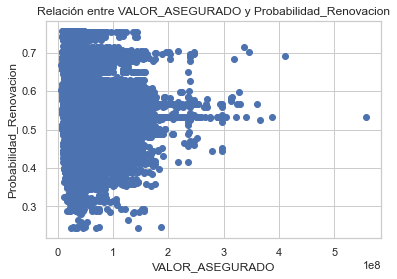

In [389]:
# Graficar dispersión
plt.scatter(resultado_final['VALOR_ASEGURADO'], resultado_final['Probabilidad_Renovacion'])
plt.title('Relación entre VALOR_ASEGURADO y Probabilidad_Renovacion')
plt.xlabel('VALOR_ASEGURADO')
plt.ylabel('Probabilidad_Renovacion')
plt.show()

In [390]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'VALOR_ASEGURADO' y 'Estado_Renovacion'
correlation_pearson = resultado_final['VALOR_ASEGURADO'].corr(resultado_final['Probabilidad_Renovacion'], method='pearson')
correlation_spearman = resultado_final['VALOR_ASEGURADO'].corr(resultado_final['Probabilidad_Renovacion'], method='spearman')
correlation_kendall = resultado_final['VALOR_ASEGURADO'].corr(resultado_final['Probabilidad_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')

Correlación de Pearson para el modelo: -0.15677217734735496
Correlación de Spearman para el modelo: -0.19221608623863976
Correlación de Kendall para el modelo: -0.129578576091191


#### MODELO

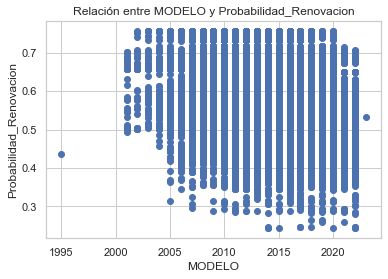

In [391]:
# Graficar dispersión
plt.scatter(resultado_final['MODELO'], resultado_final['Probabilidad_Renovacion'])
plt.title('Relación entre MODELO y Probabilidad_Renovacion')
plt.xlabel('MODELO')
plt.ylabel('Probabilidad_Renovacion')
plt.show()

In [392]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'VALOR_ASEGURADO' y 'Estado_Renovacion'
correlation_pearson = resultado_final['MODELO'].corr(resultado_final['Probabilidad_Renovacion'], method='pearson')
correlation_spearman = resultado_final['MODELO'].corr(resultado_final['Probabilidad_Renovacion'], method='spearman')
correlation_kendall = resultado_final['MODELO'].corr(resultado_final['Probabilidad_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')

Correlación de Pearson para el modelo: -0.21037804561459428
Correlación de Spearman para el modelo: -0.1930531849461327
Correlación de Kendall para el modelo: -0.13485543525075724


#### CANTIDAD_RENOVACION

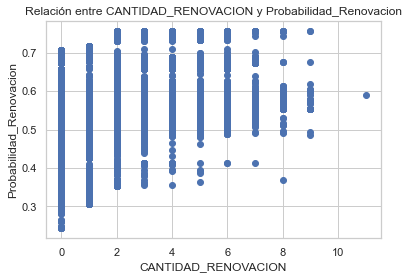

In [394]:
# Graficar dispersión
plt.scatter(resultado_final['CANTIDAD_RENOVACION'], resultado_final['Probabilidad_Renovacion'])
plt.title('Relación entre CANTIDAD_RENOVACION y Probabilidad_Renovacion')
plt.xlabel('CANTIDAD_RENOVACION')
plt.ylabel('Probabilidad_Renovacion')
plt.show()

In [395]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'VALOR_ASEGURADO' y 'Estado_Renovacion'
correlation_pearson = resultado_final['CANTIDAD_RENOVACION'].corr(resultado_final['Probabilidad_Renovacion'], method='pearson')
correlation_spearman = resultado_final['CANTIDAD_RENOVACION'].corr(resultado_final['Probabilidad_Renovacion'], method='spearman')
correlation_kendall = resultado_final['CANTIDAD_RENOVACION'].corr(resultado_final['Probabilidad_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')

Correlación de Pearson para el modelo: 0.2859628906707343
Correlación de Spearman para el modelo: 0.3153904516414607
Correlación de Kendall para el modelo: 0.23738708108282422


#### EDAD FINAL

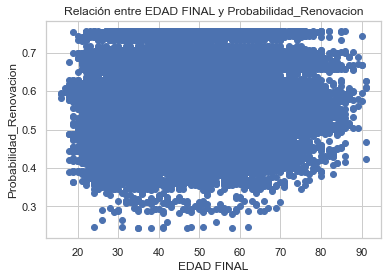

In [396]:
# Graficar dispersión
plt.scatter(resultado_final['EDAD FINAL'], resultado_final['Probabilidad_Renovacion'])
plt.title('Relación entre EDAD FINAL y Probabilidad_Renovacion')
plt.xlabel('EDAD FINAL')
plt.ylabel('Probabilidad_Renovacion')
plt.show()

In [397]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'VALOR_ASEGURADO' y 'Estado_Renovacion'
correlation_pearson = resultado_final['EDAD FINAL'].corr(resultado_final['Probabilidad_Renovacion'], method='pearson')
correlation_spearman = resultado_final['EDAD FINAL'].corr(resultado_final['Probabilidad_Renovacion'], method='spearman')
correlation_kendall = resultado_final['EDAD FINAL'].corr(resultado_final['Probabilidad_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')

Correlación de Pearson para el modelo: 0.07311997432895542
Correlación de Spearman para el modelo: 0.06055123521787307
Correlación de Kendall para el modelo: 0.04093169014261695


#### SCORE

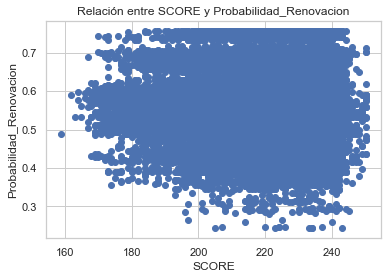

In [398]:
# Graficar dispersión
plt.scatter(resultado_final['SCORE'], resultado_final['Probabilidad_Renovacion'])
plt.title('Relación entre SCORE y Probabilidad_Renovacion')
plt.xlabel('SCORE')
plt.ylabel('Probabilidad_Renovacion')
plt.show()

In [399]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'VALOR_ASEGURADO' y 'Estado_Renovacion'
correlation_pearson = resultado_final['SCORE'].corr(resultado_final['Probabilidad_Renovacion'], method='pearson')
correlation_spearman = resultado_final['SCORE'].corr(resultado_final['Probabilidad_Renovacion'], method='spearman')
correlation_kendall = resultado_final['SCORE'].corr(resultado_final['Probabilidad_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')

Correlación de Pearson para el modelo: 0.027260204177126338
Correlación de Spearman para el modelo: 0.005945827112976826
Correlación de Kendall para el modelo: 0.004173443170605452


#### Prima

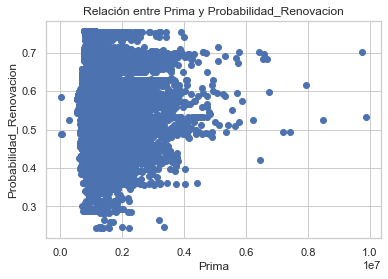

In [400]:
# Graficar dispersión
plt.scatter(resultado_final['Prima'], resultado_final['Probabilidad_Renovacion'])
plt.title('Relación entre Prima y Probabilidad_Renovacion')
plt.xlabel('Prima')
plt.ylabel('Probabilidad_Renovacion')
plt.show()

In [401]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'VALOR_ASEGURADO' y 'Estado_Renovacion'
correlation_pearson = resultado_final['Prima'].corr(resultado_final['Probabilidad_Renovacion'], method='pearson')
correlation_spearman = resultado_final['Prima'].corr(resultado_final['Probabilidad_Renovacion'], method='spearman')
correlation_kendall = resultado_final['Prima'].corr(resultado_final['Probabilidad_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')

Correlación de Pearson para el modelo: -0.040339929806009735
Correlación de Spearman para el modelo: -0.05725066297255744
Correlación de Kendall para el modelo: -0.03632629944107349


#### Incremento

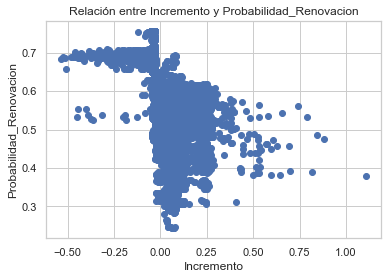

In [403]:
# Graficar dispersión
plt.scatter(resultado_final['Incremento'], resultado_final['Probabilidad_Renovacion'])
plt.title('Relación entre Incremento y Probabilidad_Renovacion')
plt.xlabel('Incremento')
plt.ylabel('Probabilidad_Renovacion')
plt.show()

In [402]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'VALOR_ASEGURADO' y 'Estado_Renovacion'
correlation_pearson = resultado_final['Incremento'].corr(resultado_final['Probabilidad_Renovacion'], method='pearson')
correlation_spearman = resultado_final['Incremento'].corr(resultado_final['Probabilidad_Renovacion'], method='spearman')
correlation_kendall = resultado_final['Incremento'].corr(resultado_final['Probabilidad_Renovacion'], method='kendall')

print(f'Correlación de Pearson para el modelo: {correlation_pearson}')
print(f'Correlación de Spearman para el modelo: {correlation_spearman}')
print(f'Correlación de Kendall para el modelo: {correlation_kendall}')

Correlación de Pearson para el modelo: -0.5318970570873996
Correlación de Spearman para el modelo: -0.4414489754498609
Correlación de Kendall para el modelo: -0.294278837263682


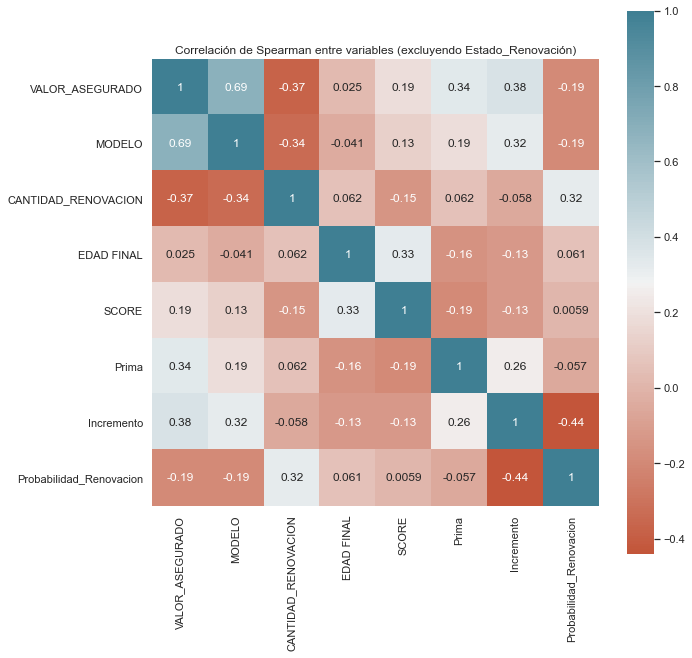

In [408]:
# Omitir la variable 'Estado_Renovación' al calcular la matriz de correlación
correlation_matrix = resultado_final.drop('Estado_Renovacion', axis=1).corr(method='spearman')

# Establecer tamaño de la figura
plt.rcParams['figure.figsize'] = 10, 10

# Crear un mapa de calor
sns.heatmap(correlation_matrix, cmap=sns.diverging_palette(20, 220, n=200), annot=True, square=True)

# Agregar título al mapa de calor
plt.title('Correlación de Spearman entre variables (excluyendo Estado_Renovación)')

# Mostrar el mapa de calor
plt.show()